In [267]:
import pandas as pd
import numpy as np

In [7]:
logs = pd.read_csv("Log", delimiter="\t")

In [24]:
logs.head()

,timestamp,datetime,device,numdoc,region,request,urls
0,1520974800,2018-03-14 00:00,desktop,317731505,6,https://yandex.ru/search/?text=порно видео сек...,http://porno-sex-video.com/eroticheskie-filmy-...
1,1520974800,2018-03-14 00:00,desktop,277053268,191,https://yandex.ru/search/?text=sad story скача...,http://mp3party.net/music/8507899;http://muz-c...
2,1520974800,2018-03-14 00:00,touch,19987730,2,https://yandex.ru/search/?text=ольгино баня&fl...,http://www.bani.spb.ru/olgino.html;https://sau...
3,1520974800,2018-03-14 00:00,touch,196215754,26955,https://yandex.ru/search/?text=фирменный магаз...,http://www.marko.by/actions/;https://marko.vit...
4,1520974800,2018-03-14 00:00,desktop,3909882795,101704,https://yandex.ru/search/?text=порно&rl=313,http://porno365.xxx/;https://prostoporno.sex/c...


Выберите запросы, связанные с просмотром телевидения. 
Оцените долю этих запросов в общем потоке. 
Предложите свою классификацию запросов, связанных с просмотром телевидения: выделите основные группы запросов и оцените долю каждой группы в общем объеме этих запросов.

In [74]:
def separate_request_and_metadata(raw_request):
    request = ""
    metadata = ""
    final_index = len(raw_request)
    if ("&" in raw_request):
        final_index = raw_request.index("&")
        metadata = raw_request[final_index:]
    request = raw_request[31:final_index]
    return (request, metadata)

In [284]:
indices = []

In [75]:
requests = [separate_request_and_metadata(req) for req in logs["request"]]

In [285]:
# metrics
c_channel = 0
c_tv_prog1 = 0
c_tv_prog2 = 0
c_live = 0
c_channel_1 = 0
c_tv_prog3 = 0
c_tv_online = 0
c_tnt = 0
c_sts = 0
c_ros_1 = 0
c_ntv = 0
c_dom_2 = 0
c_pust_govor = 0
c_kvn = 0

for i in range(len(requests)):
    if ("канале" in requests[i][0]  and "моч" not in requests[i][0] and "вод" not in requests[i][0] and "youtube" not in requests[i][0] and "ютуб" not in requests[i][0]) or "телеканал" in requests[i][0]:
        c_channel += 1
        indices.append(i)
    elif "телепрограмма" in requests[i][0] or "телепрограмме" in requests[i][0] or "телепрограммы" in requests[i][0] or "телепрограмму" in requests[i][0] or "телепро" in requests[i][0] or "телепередача" in requests[i][0]:
        c_tv_prog1 += 1
        indices.append(i)
    elif "программа передач" in requests[i][0] or ("канал" in requests[i][0] and "программа" in requests[i][0]):
        c_tv_prog2 += 1
        indices.append(i)
    elif "прямой эфир" in requests[i][0] or "прямом эфире" in requests[i][0] or "прямая трансляция" in requests[i][0] or "трансляция" in requests[i][0]:
        c_live += 1
        indices.append(i)
    elif ("1" in requests[i][0] and "канал" in requests[i][0]) or ("первый" in requests[i][0] and "канал" in requests[i][0]):
        c_channel_1 += 1
        indices.append(i)
    elif ("тв" in requests[i][0] and "программа" in requests[i][0]):
        c_tv_prog3 += 1
        indices.append(i)
    elif ("телевидение" in requests[i][0] and "онлайн" in requests[i][0]):
        c_tv_online += 1
        indices.append(i)
    elif " тнт " in requests[i][0] or " тнт" in requests[i][0] or "тнт " in requests[i][0]:
        c_tnt += 1
        indices.append(i)
    elif "стс " in requests[i][0] or " стс" in requests[i][0] or " стс " in requests[i][0]:
        c_sts += 1
        indices.append(i)
    elif "россия 1" in requests[i][0]:
        c_ros_1 += 1
        indices.append(i)
    elif "нтв " in requests[i][0] or " нтв" in requests[i][0] or " нтв " in requests[i][0]: 
        c_ntv += 1
        indices.append(i)
    elif "дом 2" in requests[i][0]:
        c_dom_2 += 1
        indices.append(i)
    elif "пусть говорят" in requests[i][0]:
        c_pust_govor += 1
        indices.append(i)
    elif " квн " in requests[i][0] or "квн " in requests[i][0] or " квн" in requests[i][0]:
        c_kvn += 1
        indices.append(i)
        

In [279]:
print("Количество запросов, содержащих (на)'канале': " + str(c_channel))
print("Количество запросов, содержащих 'телепрограмма' в каком-либо падеже: " + str(c_tv_prog1))
print("Количество запросов, содержащих 'программа передач' или 'канал+программа': " + str(c_tv_prog2))
print("Количество запросов, содержащих 'прямой эфир'/'прямом эфире'/'прямая трансляция': " + str(c_live))
print("Количество запросов, содержащих 'тв программа': " + str(c_tv_prog3))
print("Количество запросов, содержащих 'телевидение онлайн': " + str(c_tv_online))
print()
print("первый канал: " + str(c_channel_1))
print("тнт: " + str(c_tnt))
print("стс: " + str(c_sts))
print("россия 1: " + str(c_ros_1)) 
print("нтв: " + str(c_ntv))
print()
print("КВН: " + str(c_kvn) + "\nПусть говорят: " + str(c_pust_govor) + "\nДом 2: " + str(c_dom_2))

print("\nSUM: " + str(c_channel + c_tv_prog1 + c_tv_prog2 + c_tv_prog3 + c_live + c_tv_online + c_channel_1 + c_tnt + c_sts + c_ros_1 + c_ntv + c_pust_govor + c_dom_2 + c_kvn))



Количество запросов, содержащих (на)'канале': 483
Количество запросов, содержащих 'телепрограмма' в каком-либо падеже: 626
Количество запросов, содержащих 'программа передач' или 'канал+программа': 748
Количество запросов, содержащих 'прямой эфир'/'прямом эфире'/'прямая трансляция': 2281
Количество запросов, содержащих 'тв программа': 302
Количество запросов, содержащих 'телевидение онлайн': 30

первый канал: 670
тнт: 652
стс: 184
россия 1: 226
нтв: 248

КВН: 184
Пусть говорят: 163
Дом 2: 1416

SUM: 8213


In [300]:
# working with urls
urls = np.array([str(log) for log in logs["urls"]])

In [349]:
# to compare indices further on
url_indices = []
# to count the number of occurences
count_tvs = 0
for i in range(len(urls)):
    if (".tv" in urls[i] or "tv." in urls[i]) and ("twitch" not in urls[i]) and ("porn" not in urls[i]) and ("sex" not in urls[i]) and ("hentai" not in urls[i]) and ("seria" not in urls[i]) and ("mature" not in urls[i]) and ("adult" not in urls[i]) and ("kino" not in urls[i]) and ("cinema" not in urls[i]) and ("film" not in urls[i]) and ("hdtv" not in urls[i]):
        count_tvs += 1
        url_indices.append(i)
        print(urls[i])

http://see-me.ru/online-tv/football-1.html;http://lion-tv.com/54-futbol-1.html;http://ok-tv.org/channels/61-futbol-1.html
https://www.1tv.ru/doc/pro-politiku/donbass-v-ogne;https://www.youtube.com/playlist?list=PLM9IbzO92NhV48ajOObCFnCfOwKBXbEgj;http://portall.zp.ua/?c=video&q=%D1%84%D0%B8%D0%BB%D1%8C%D0%BC%20%D0%BF%D1%80%D0%BE%20%D0%B2%D0%BE%D0%B9%D0%BD%D1%83%20%D0%BD%D0%B0%20%D0%94%D0%BE%D0%BD%D0%B1%D0%B0%D1%81%D1%81%D0%B5
http://pokazz.net/405-match-futbol-1.html;http://onlines.tv/match-futbol-1;http://sport24tv.net/channel/91305/
https://ru.wikipedia.org/wiki/%D0%9F%D0%BE%D0%BB%D0%BE%D1%82%D0%B5%D0%BD%D1%87%D0%B8%D0%BA_(%D0%AE%D0%B6%D0%BD%D1%8B%D0%B9_%D0%9F%D0%B0%D1%80%D0%BA);http://southpark.cc-fan.tv/series.php?id=508;http://www.sp-fan.ru/episode/508/
https://punkt-a.info/news/novosti-kratko/astrakhanets-nabrosil-s-nozhom-na-politseyskogo;http://7plustv.ru/News/2018/02/17/29370;https://www.youtube.com/watch?v=QF5VIYIieVY
https://bitva-ex.ru/ekstrasensy-vedut-rassledovanie/7-sezon

http://www.xvideos.com/?k=Playboy+lesbian;http://www.xnxx.com/search/lesbian+playboy;http://alexpix.tv/ru/found?str=%D0%BF%D0%BB%D0%B5%D0%B9%D0%B1%D0%BE%D0%B9%20%D0%BB%D0%B5%D1%81%D0%B1%D0%B8&s=rating&n=1
http://doramy.club/4319-bezumnyj-azart.html;http://dextv.net/bezumny-azart-dorama-vse-serii;http://animelend.info/10306-Bezumnyj-azart-dorama-Kakegurui.html
http://doramatv.ru/the_great_seducer;http://doramy.club/5018-igra-v-lyubov-velikoe-soblaznenie.html;https://asiapoisk.com/doramas/Love_Game_The_Great_Seduction/
http://livetv.sx/ua/;https://www.youtube.com/channel/UC4R8DWoMoI7CAwX8_LjQHig;http://smotrisport.tv/event
http://fb.ru/article/321028/pochemu-sergey-netievskiy-ushel-iz-uralskih-pelmeney-sergey-netievskiy-biografiya-tvorchestvo;https://ru.wikipedia.org/wiki/%D0%9D%D0%B5%D1%82%D0%B8%D0%B5%D0%B2%D1%81%D0%BA%D0%B8%D0%B9,_%D0%A1%D0%B5%D1%80%D0%B3%D0%B5%D0%B9_%D0%90%D0%BB%D0%B5%D0%BA%D1%81%D0%B0%D0%BD%D0%B4%D1%80%D0%BE%D0%B2%D0%B8%D1%87;http://zvezdytv.ru/yumornye-shou/sergej-n

http://canli.macburda.tv/;https://canlimacizle.site/;http://futbolmacizle2.com/
https://www.atv.com.tr/;https://www.atv.com.tr/webtv/canli-yayin;https://www.ecanlitvizle.live/atv-canli/
http://livetv.sx/allupcomingsports/1/;http://gooool.org/?z;http://smotrisport.tv/event/Football
http://www.viprutv.com/a/?block=33363;https://sovet.kidstaff.com.ua/question-249979-3143;https://saili34.ru/search/pesni-geleny-velikanovoy-skachat
http://animevost.org/tip/tv/1659-re-zero-kara-hajimeru-isekai-seikatsu.html;https://online.anidub.com/anime/full/9711-s-nulya-posobie-po-vyzhivaniyu-v-alternativnom-mire-rezero-kara-hajimeru-isekai-seikatsu-01-iz-25.html;https://www.anilibria.tv/release/re-zero-kara-hajimeru-isekai-seikatsu.html
https://matchtv.ru/;https://matchtv.ru/on-air;https://twitter.com/matchtv
http://animevost.org/tip/tv/611-trigun-tv.html;http://online.animedia.tv/anime/trigan;https://yummyanime.com/catalog/item/trigan
http://live.russia.tv/;http://rus24.tv/rossiya1.html;http://www.ontvti

http://onlines.tv/belarus-5;https://www.tvr.by/televidenie/belarus-5/;http://viks.tv/430-belarus-2.html
http://live.russia.tv/;http://ontvtime.online/rossiya1;http://www.ontvtime.ru/live/russia1.html
https://www.atv.com.tr/webtv/eskiya-dunyaya-hukumdar-olmaz/bolum;http://www.hddizifullizle.com/SonBolum/eskiya-dunyaya-hukumdar-olmaz-son-bolum-izle/;http://www.ddizi1.com/diziler/1601/goo.gl/JJRScA
http://www.tvoison.ru/looking.shtml;http://kiev.cleaning/blog/osobennosti-uhoda-za-podushkoy-v-zavisimosti-ot-napolnitelya.html;http://miladoma.ru/statji/kak-ukhazhivat-za-podushkami/
https://ctc.ru/online/;https://www.glaz.tv/online-tv/sts;http://fan-tv.ru/channels/6-sts.html
http://www.ontvtime.ru/live/russia1.html;http://live.russia.tv/;http://rus24.tv/rossiya1.html
https://osbez-cctv.ru/upload/iblock/47e/47e6201cd25c44bc09bcce8249bea652.pdf;http://www.dssl.ru/support/tech/faq/;http://www.vabez.ru/post/115/dssl-transsir.html
https://www.youtube.com/playlist?list=PLA8Qr5sFMaN5jZNBM4vE-A3DuI9O

http://comedyclub.tnt-online.ru/;https://rutube.ru/metainfo/tv/10/;https://borodachtv.ru/comedy-club-online.html
https://puhutv.com/;https://puhutv.com/fi-detay;https://www.youtube.com/channel/UCLy4nZhqX8UTlM0hTeqQXbw
https://na-samom-dele.ru/;https://www.1tv.ru/shows/na-samom-dele;http://sudba-cheloveka.ru/na-samom-dele-online.html
https://mirtesen.sputnik.ru/blog/43738903665/Zavtra-Zemlyu-nakroet-magnitnaya-burya:-Ekspertyi-rasskazali-ob-;http://maxpark.com/community/5652/content/6251925;https://fakty.ictv.ua/ru/lifestyle/20180313-kalendar-magnitnyh-bur-na-2018-rik-infografika/
https://www.youtube.com/playlist?list=PLSgy-gJ-dkS9KGmySidWwCHs2MxnizF1s;http://www.ntv.ru/%D0%9C%D0%B5%D1%81%D1%82%D0%BE%D0%92%D1%81%D1%82%D1%80%D0%B5%D1%87%D0%B8;http://www.ntv.ru/peredacha/Mesto_vstrechi/m52562/o490296/video/
http://doramatv.ru/my_mr__mermaid;http://doramy.club/1635-volna-za-volnoj.html;http://vsedoramy.ru/112-volna-za-volnoy-2017.html
https://www.youtube.com/playlist?list=PLSgy-gJ-dkS-klFp

http://tizam.tv/fil_my_dlya_vzroslyh/s_russkim_perevodom/;http://eroboom.biz/katalog/s_russkim_perevodom/;http://www.xvideos.com/?k=ASA+akira
https://www.izlesene.com/muzik/ozcan-deniz/tum-sarkilar;http://sarkilarlistesi.net/dinle/ozcan-deniz/;http://muzikdinle.tv.tr/ozcan-deniz-sarkilari
http://mundo-latino.ru/2837-druqaya-semya-2014.html;http://ekranka.tv/video/velikolepnyi-vek;https://ru.wikipedia.org/wiki/%D0%92%D0%B5%D0%BB%D0%B8%D0%BA%D0%BE%D0%BB%D0%B5%D0%BF%D0%BD%D1%8B%D0%B9_%D0%B2%D0%B5%D0%BA
http://sci-hub.tv/;https://ru.wikipedia.org/wiki/Sci-Hub;https://vk.com/sci_hub
https://ru.wikipedia.org/wiki/%D0%95%D1%80%D1%91%D0%BC%D0%B8%D0%BD,_%D0%91%D0%BE%D1%80%D0%B8%D1%81_%D0%9B%D1%8C%D0%B2%D0%BE%D0%B2%D0%B8%D1%87;http://chgk.wikia.com/wiki/%D0%91%D0%BE%D1%80%D0%B8%D1%81_%D0%9B%D1%8C%D0%B2%D0%BE%D0%B2%D0%B8%D1%87_%D0%95%D1%80%D1%91%D0%BC%D0%B8%D0%BD;http://chgk.tvigra.ru/znatoki/?eremin
https://borodachtv.ru/comedy-club-online.html;https://rutube.ru/video/2b87e92e25946f7aa0a8fd6e449

https://www.youtube.com/playlist?list=PLAe6Au-aKEc9TYn9Gdyqn3aivM4qMwAaE;https://www.1tv.ru/shows/vremya-pokazhet;http://dextv.net/vremya-pokazhet-vse-vypuski
https://www.omegle.com/;https://www.freeomegle.com/;https://www.omegletv.net/
https://borodachtv.ru/comedy-club-online.html;https://rutube.ru/video/86d910d5ee1b77bbf4fe40a7acf2d622/;http://allcc.ru/comedy-club/video/
http://www.icegaytube.tv/ru/;http://www.xvideos.com/gay;http://www.xnxx.com/search/gay
https://www.youtube.com/watch?v=9mbUAQ37m3E;http://www.tveda.ru/recepty/rassolnik/;http://attuale.ru/rassolnik-s-perlovkoj-i-solenymi-ogurtsami-9-retseptov/
http://www.piranya.com/video-russia.php?from=rossiya12;http://peers.tv/;https://www.pro-tv.net/
https://vk.com/chp_74rus;https://www.1obl.ru/news/proisshestviya/;https://31tv.ru/programmy/agentstvo-chrezvychajnyh-novostej/releases
http://holostyak.tnt-online.ru/;https://www.instagram.com/holostyak.official/;http://www.holostyak-natv.info/smotret
http://live.russia.tv/;http://on

https://tv.mail.ru/;https://tv.yandex.ru/;http://www.s-tv.ru/tv/
https://www.hibiny.com/news/archive/154535/;http://murman.tv/news/6430-v-poselke-alakurtti-nachalis-remont-i-stroitelstvo-municipalnyh-obektov.html;http://vertoletciki.ru/viewtopic.php?id=283
https://tv.yandex.ru/213/channels/ren-tv-18;http://ren.tv/tv-programma;https://tv.mail.ru/krym/channel/1148/
https://www.youtube.com/channel/UCl9OVZzpQG9-5B2P8EidoUg;https://fishki.net/tag/prikoly/;https://pressa.tv/prikolnoe/
https://vikistars.com/alesya-kafel-nikova-pokazala-grud/10743/;https://fishki.net/2163402-dochy-evgenija-kafelynikova-snjalasy-toples-dlja-britanskogo-gljanca.html;https://pressa.tv/znamenitosti/60587-izyaschnaya-alesya-kafelnikova-obnazhila-grud-8-foto.html
https://www.spb.kp.ru/online/news/3018027/;https://topspb.tv/news/2018/02/10/video-massovoj-draki-s-pogonej-na-dumskoj-ulice/;http://ren.tv/novosti/2018-02-10/ochevidcy-zasnyali-massovuyu-draku-s-pogoney-v-peterburge
http://www.lg.com/ru/support/support-pro

https://www.youtube.com/playlist?list=PL39l9SxO4ZYtx9t-x3EimpZo3-dG4B9hY;https://na-samom-dele.ru/;https://liveam.tv/na-samom-dele.html
https://matchtv.ru/football/ucl/matchtvvideo_NI825585_translation_Liga_chempionov_1_8_finala_Sevilja___Manchester_Junajted_1_j_match;http://soccer365.ru/live/match-sevilya-manchester-yunayted-smotret-onlayn/&tab=stats_games;https://news.sportbox.ru/Vidy_sporta/Futbol/Liga_Chempionov/stats/turnir_13679/game_1380648663
https://www.1tv.ru/shows/modnyy-prigovor/vypuski;https://modnyj-prigovor.ru/;https://www.youtube.com/playlist?list=PLpoPBvWvvEHhq_a50rOoMp_-OH1ctCJD-
https://vprognoze.ru/forecast/newbie/fcufootball/5837225-nyu-york-tihuana.html;http://astro-penza.ru/cat4-95444-prognoz-na-match-nyu-york-red-bulls-tihuana-ot-eksperta-14-03-18/;http://smotrisport.tv/prognoz/101888-nyu-york-ryed-bulls-tikhuana-prognoz-na-match.html
https://www.1tv.ru/-/azplp;https://vringe.com/video/110917-video-boya-sergey-kovalyev-igor-mikhalkin.htm;https://prognozist.ru/ne

https://xn--b1agj9af.xn--80aswg/video/rossija-24/interesnye-fakty-iz-zhizni-generala-karb.html;https://www.youtube.com/watch?v=8KbGRXT8LiU;http://russia.tv/video/show/brand_id/5206/episode_id/1558670/video_id/1691537/
https://24smi.org/celebrity/1695-aleksandr-ptashenchuk.html;http://fb.ru/article/332208/aleksandr-ptashenchuk-biografiya-i-tvorchestvo;https://www.vokrug.tv/person/show/aleksandr_ptashenchuk/
http://sweethd.tv/seks-na-rabote;https://annamilk.com/golye-zhenshhiny-na-rabote.html;http://ero-piks.com/na-rabochem-meste/
https://www.dni.ru/showbiz/2016/10/25/351727.html;http://www.ntv.ru/novosti/1728278/;http://novayagazeta-ug.ru/news/u4949/2017/06/11/140997
http://www.vesti.ru/ONAIR;http://www.ontvtime.ru/live/russia24.html;https://www.glaz.tv/online-tv/rossiya-24
http://xn--80aa2azak.xn--p1aadc.xn--p1ai/rtrs/node/3091;http://www.tvsural.ru/category_753.html;http://dvbpro.ru/%D0%B3%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%B2%D0%B5%D1%89%D0%B0%D0%BD%D0%B8%D1%8F-%D1%86%D0%B8%D1%84%D1%8

http://pereborom.ru/akkordy-dlya-nachinayushhih/;http://gitaristtv.ru/akkordy-dlya-nachinayushhix;http://www.guitarmusic.ru/chords.htm
https://mir24.tv/news/16294653/v-tadzhikistane-vybrali-luchshuyu-avtoledi;https://www.youtube.com/watch?v=JfeZiVceMGc;https://strategnews.ru/2018/03/11/v-tadzhikistane-vybrali-luchshuyu-avtoledi/
https://www.youtube.com/watch?v=L7fxv0Z6_Sk;http://www.vlive.tv/video/32341;http://doramatv.ru/nct_on_v_app/series35
http://animevost.org/tip/tv/930-bishoujo-senshi-sailor-moon-s.html;http://video.sibnet.ru/video2885958-Sailor_Moon_S_091___Seylor_Mun_3_sezon_091/;http://anitokyo.tv/anime/1266-krasavica-voin-seylor-mun-es-tv-3-sailor-moon-s.html
https://www.youtube.com/playlist?list=PLSgy-gJ-dkS9KGmySidWwCHs2MxnizF1s;http://www.ntv.ru/%D0%9C%D0%B5%D1%81%D1%82%D0%BE%D0%92%D1%81%D1%82%D1%80%D0%B5%D1%87%D0%B8;http://dextv.net/mesto-vstrechi-vse-vypuski
http://sport5online.com/translation/hockey/nhl/;http://hockey4.me/news/nhl;http://smotrisport.tv/event/hockey/khok

https://www.1tv.ru/shows/na-samom-dele/vypuski-i-dramatichnye-momenty/privorot-dlya-vitaliny-istoriya-lyubvi-na-detektore-na-samom-dele-vypusk-ot-18-12-2017;https://www.youtube.com/watch?v=KxLZSFeOLEE;https://na-samom-dele.ru/na-samom-dele-vypusk-ot-18-12-2017-privorot-dlya-vitaliny.html
http://ovego.tv/index/86-1247-5-3;http://www.interntv.ru/index.php?name=View&idtv=2599;http://tvru.club/history
https://matchtv.ru/summer/matchtvvideo_NI709249_clip_Kanal_Match_Igra;http://sport24tv.net/channel/91303/;http://pokazz.net/404-match-igra.html
https://muzhskoe-zhenskoe.su/;https://www.1tv.ru/shows/muzhskoezhenskoe/vypuski;http://muzhskoe-zhenskoe.ru/
https://www.itkm.ru/tv.html;https://ivstar.net/kabelnoe-televidenie-v-ivanteevke/;http://iks-online.net/
http://www.ntv.ru/novosti/1991462/;http://mynnm.ru/blogs/sepet716/novichok-i-ego-izobretatel/;http://www.vokrugnovostei.ru/Proisshestviya/Rossii-predyavili-Novichok/
https://www.vokrug.tv/person/show/oksana_lavrenteva/;https://www.instagram.

http://www.gitaristu.ru/accords/letter/m/manson_marilyn/sweet_dreams_%28tabulatura%29;https://akkordam.ru/rify/marilyn-manson-sweet-dreams;http://gitaristtv.ru/kak-igrat-marilyn-manson-sweet-dreams-na-gitare-video-urok.html
https://matchtv.ru/on-air;https://tvmatch-tv.online/tv-online;https://ntvplus.tv/channel/match-hd-336
http://russa.narod.ru/books/polanskiy/020.htm;http://nowportal.ru/portal/novosti-dnya/item/4471-dvoryanskaya-usadba-vymelkinyh-v-staroy-russe-vzyata-pod-ohranu-kak-ob'ekt-kulturnogo-naslediya.html;https://pantv.livejournal.com/1707385.html
https://tv.yandex.ru/47;https://tv.mail.ru/nizhnij_novgorod/general/;http://www.s-tv.ru/tv/
https://www.glaz.tv/online-tv/;http://fanat.tv/channels;http://viks.tv/
https://www.1tv.ru/shows/pust-govoryat;https://www.youtube.com/channel/UCD9jSZLsftoOACtkrDNZlsg;https://pust-govoriyat.ru/pust-govoriat-vse-vypuski/
https://megalektsii.ru/s13777t8.html;http://energ2010.ru/Bilet_el_bezop/3-gruppa-ehlektrobezopasnosti-voprosy-i-otvety/os

https://korrespondent.net/ukraine/;https://riafan.ru/category/ukraina;https://24tv.ua/ru/ukraina_tag1119/
http://www.manualsdir.ru/manuals/15444/samsung-tv.html?page=54;http://dvbpro.ru/obzor-dvb-t2-resivera-pantesat-hd-2258-t2-s-internet-funkciyami-2-chast/;http://dvbpro.ru/obzor-dvb-t2-resivera-pantesat-hd-2258-t2-s-internet-funkciyami/
http://pspiso.tv/ps3-games/page/11/;http://game-torrento.org/load/igry/ps_2/21-7;http://www.psjailbreak.ru/2012/11/07/ustanovka-cfw-421-na-lyuboy-versii-ps3-s-flesherom.html
http://animevost.org/tip/tv/1441-to-love-ru-trouble-darkness-2.html;http://yandere.tv/anime/3294-to-love-ru-trouble-darkness-2nd.html;http://animeyoy.com/anime/657-lyubov-i-snova-tma-nepriyatnostey.html
http://shop.islamtv.ru/;http://islamicstore.ru/;https://islam-store.ru/
http://aivis.tv/online/vysokie_stavki_2_sezon_1_24_serija_2018/2018-03-09-4025;http://kogdavyydet.ru/vysokie-stavki-2-sezon-data-vyhoda.html;http://www.qvaka.com/load/vysokie_stavki_2_sezon/10-1-0-2185
http://t

https://www.1tv.ru/live;http://www.ontvtime.ru/general/ort-3.html;http://rus24.tv/perviy_kanal.html
http://www.vse-dni.ru/2018/01/Perevod-chasov-2018-kogda-perevodim-vremja-v-2018-godu.html;http://year2018.net/perevod-chasov-na-letnee-vremya-2018/;https://fakty.ictv.ua/ru/ukraine/20180313-koly-perevodyat-godynnyky-na-litnij-chas-u-2018/
https://www.1tv.ru/;https://www.1tv.ru/live;https://www.youtube.com/channel/UCX9-cJy8dZWDI8hCnmahuLA
http://ren.tv/;http://ren.tv/proekti;http://ren.tv/live
http://gov.spb.ru/gov/otrasl/blago/gosuslugi/vydacha-propuskov-na-dvizhenie-gruzovyh-transportnyh-sredstvrazreshenn/;https://studopedia.su/10_127999_poryadok-propuska-transportnih-sredstv.html;https://studopedia.ru/13_93266_poryadok-vidachi-dokumentov-dayushchih-osnovanie-dlya-prohoda-proezda-na-oti-v-zoni-transportnoy-bezopasnosti-i-na-kriticheskie-elementi.html
https://www.1tv.ru/;https://www.1tv.ru/shows;https://www.1tv.ru/live
https://www.youtube.com/channel/UCPkDvaKV6u6FgM650A0pdCA;http://russi

https://uroki.tv/uprazhnenie-204-russkij-yazyk-3-klass-kanakina-goreckij-chast-1/;http://razviwaika.ru/kanakina-3-klass-uchebnik-1-upr-204-s-108/;https://egdz.ru/reshebniki/3-klass/russkiy-yazyk/kanakina/e:0-t:0-a:203
https://www.youtube.com/watch?v=OANKznNYNZM;https://tsargrad.tv/heroes/57;https://www.youtube.com/watch?v=UEUGgozL3AE
http://kuban24.tv/tv/;http://only-tv.org/kuban-24.html;https://www.youtube.com/channel/UCOzIO5dGMYDWlcZ0yULEsKA
https://24scores.org/ice_hockey/match/125633-arizona-la-kings;http://onhockey.win/livestream/11889/nhl/14-03-2018/arizona-vs-los-andzheles/;http://livetv.sx/betinfo/3785335_los_angeles_arizona/
https://www.1tv.ru/-/azplp;https://www.youtube.com/watch?v=uwyTCvks4xg;https://ironbets.ru/prognozy/kovalev-mikhalkin/
https://www.tvoyaapteka.ru/;https://www.tvoyaapteka.ru/catalog/;http://www.test.tvoyaapteka.ru/
http://www.tvermedcollege.ru/index.php/abiturientam;https://www.ucheba.ru/uz/22750/programs;https://vk.com/topic-19899283_32984004
https://www.

https://003ms.ru/catalog/lekarstvennye-sredstva/nervnaya-sistema/rankof;https://www.poisklekarstv.com/rankof/moskva;https://www.medcentre24.ru/rankof-price/moskva
http://soccer365.ru/live/match-shahter-roma-smotret-onlayn/&tab=video;http://sporthd.online/1256-shahter-doneck-roma.html;http://livetv.sx/eventinfo/604020_shakhtar_dn_roma/
http://zlattv.ru/projects/messenger;https://www.youtube.com/playlist?list=PLKZkKlJNTs3eYIuJtp51TD3BQR6eK-20o;https://www.youtube.com/channel/UC7pP6Cso8rKbZobffnRucOw
https://www.glaz.tv/online-tv/;http://ok-tv.org/;http://fanat.tv/channels
http://test.tv-soyuz.ru/tvprogramma;https://vk.com/tvsoyuz_ru;http://test.tv-soyuz.ru/
https://www.youtube.com/watch?v=yPncnYlsGjA;https://www.vladimir.kp.ru/daily/26804.5/3838767/;https://www.vokrug.tv/article/show/nyusha_zavtrak_pobeditelnitsy_41658/
https://tv.yandex.ru/2/channels/match-futbol-1-664;https://matchtv.ru/tvguide;https://pda.tv.yandex.ru/channels/664
http://rosregistr.ru/raznoe/104433l.html;https://www.v

http://www.mk.ru/social/2018/03/13/aeroflot-reshil-privlech-k-ugolovnoy-otvetstvennosti-dvukh-passazhirokdeboshirok.html;https://www.tver.kp.ru/daily/26805/3840517/;http://www.interfax.ru/pressreleases/603373
https://teleprogramma.pro/tele/227635/;https://www.youtube.com/watch?v=PdqCO07DDd4;http://russia.tv/video/show/brand_id/62146/episode_id/1543321/
http://nk.life/;http://nk-tv.com/;https://novokuznetsk.su/
http://dom2-tv.com/smotret-online/;http://dom2.love/svejiye-serii/;http://dom2hd.su/
http://www.moven.ru/;https://www.youtube.com/watch?v=5TmHexsG2YY;http://www.crimerussia.tv/?newsid=169
https://www.youtube.com/channel/UCr7lK8BYb5oM0aeJ0C337Dw;http://newsvideo.su/latest/j.mp/postskriptum;http://1doma.tv/news/postskriptum/2018-03-06-9674
http://info-4all.ru/puteshestviya-i-turizm/goroda-i-strani/kak-doehat-do-noginska-iz-moskvi/;http://natutu.ru/kak-dobratsya-do-noginska-iz-moskvy/;https://dobrodel.tv/topic/102360-%D0%BC%D0%B0%D1%80%D1%88%D1%80%D1%83%D1%82-322-%D0%BD%D0%BE%D0%B3%

http://www.medcentre.com.ua/medikamenty/turbiotik-koja.html;https://www.poisklekarstv.com/turbiotik-kozha/instruction;http://turbiotic.com/ru/
https://tv.yandex.ru/193;https://tv.mail.ru/voronezh/;http://www.yaom.ru/tv-programm/
https://news.sportbox.ru/Vidy_sporta/Futbol/Liga_Chempionov/spbvideo_NI825120_translation_Liga_chempionov_1_8_finala_Sevilja___Manchester_Junajted_1_j_match;http://football-plyus.net/4723-manchester-yunayted-sevilya-1-8-finala-liga-chempionov-2017-2018-otvetnyy-match.html;https://matchtv.ru/football/ucl/matchtvvideo_NI825585_translation_Liga_chempionov_1_8_finala_Sevilja___Manchester_Junajted_1_j_match
http://hdmego.net/2178-geroi-envella-1-13-14-15-seriya-mult-smotret-onlayn.html;https://vk.com/envellheroes;http://1doma.tv/news/geroi_ehnvella_13_14_serija_vse_serii/2018-02-04-19783
http://www.gramota.tv/spravka/letters?id=73;http://director63.ru/statyi/v-gorode-moskva-ili-moskve-kak-pravilno;http://fb.ru/article/371652/goroda-moskvyi-ili-goroda-moskva---kak-pr

http://www.pravda-tv.ru/novosti-ukrainy;https://www.pravda.com.ua/rus/;https://www.pravda.ru/news/world/10-03-2018/1374893-krym-0/
https://www.1tv.ru/live;https://www.glaz.tv/online-tv/pervyi-kanal;http://rus24.tv/perviy_kanal.html
http://n5vs44tv.cmle.ru/;http://cameleo.xyz/;http://pingway.ru/
http://doramatv.ru/;http://doramatv.ru/list?;https://vk.com/doramatv_ru
http://dojkihd.com/;http://www.dojki.com/;http://dojki.tv/
http://sportgol3.org/match;https://matchtv.ru/on-air;https://tvmatch-tv.online/tv-online
https://news.sportbox.ru/sport/Pramoj_efir_telekanala_Match_TV;https://matchtv.ru/on-air;https://tvmatch-tv.online/tv-online
http://prettynu.tv/ru/result?what=%D1%87%D0%B5%D1%88%D1%81%D0%BA%D0%BE%D0%B5%20%D0%BC%D0%B0%D1%81%D1%81%D0%B0%D0%B6&sortby=ctr&nmb=1;http://condomfishhd.com/ru/collection?q=%D1%87%D0%B5%D1%88%D1%81%D0%BA%D0%B8%D0%B9%20%D0%BC%D0%B0%D1%81%D1%81%D0%B0%D0%B6%20%D0%B0%D0%BD%D0%B0%D0%BB&sort=ctr&p=1;https://vk.com/video-108115433_171787880
https://tv.mail.ru/mosk

http://live.russia.tv/;https://www.glaz.tv/online-tv/rossiya-1;http://rus24.tv/rossiya1.html
https://www.1tv.ru/shows/muzhskoezhenskoe/vypuski;https://muzhskoe-zhenskoe.su/;https://vk.com/muzskoejenskoe
https://www.youtube.com/playlist?list=PLSgy-gJ-dkS_2K9puicpy5ZK556FDR_va;https://www.youtube.com/watch?v=7BWNtXBNYRo;https://liveam.tv/sekret-na-million.html
https://wfc.tv/;https://vk.com/wfchannel;https://www.instagram.com/worldfashionchannel/
https://m.championat.com/stat/sport/football/ucl/2218/match/671197/;https://matchtv.ru/football/ucl/matchtvvideo_NI825585_translation_Liga_chempionov_1_8_finala_Sevilja___Manchester_Junajted_1_j_match;https://apostrophe.ua/news/sport/2018-03-14/sevilya-sensatsionno-vyibila-manchester-yunayted-iz-ligi-chempionov-videoobzor/124076
https://my.mail.ru/;https://dic.academic.ru/dic.nsf/dmitriev/2347/%D0%BC%D0%B8%D1%80;http://kz.mir24.tv/
https://matchtv.ru/football/ucl/matchtvvideo_NI833407_clip_Manchester_Junajted___Sevilja___12_Goly_i_luchshije_mome

https://tv.yandex.ru/213/channels/tnt4-1649;https://tv.mail.ru/moskva/channel/2100/;http://www.s-tv.ru/tv/tnt_4
https://www.ecanlitvizle.live/;https://www.canlitv.plus/;http://www.canlitvlive.io/
http://www.g8ozd.ru/karla-hacinto/;http://ren.tv/novosti/2016-09-10/odnoklassnica-15-letney-uchastnicy-seks-vpiski-ona-byla-poryadochnoy-devushkoy;http://www.kurer-sreda.ru/2015/10/02/201076-solevaya-3-pyanuyu-17-letnyuyu-studentku-neskolko-chelovek-iznasilovali-v-tualete
https://www.instagram.com/holostyak.kreed.tnt.official/;http://zvezdytv.ru/bachelor/egor-krid-sleduschiy-holostyak.html;http://hd720.biz/peredachi_tv_show/8460-smotret-online-holostyak-6-sezon-1-vypusk-11-marta-2018.html
http://shownewstv.ru/site/single/25459.html;http://newsvideo.su/video/1532478;http://hmongbuy.net/video/i_VfZnzZ1KU
https://brazzers.club/;https://brazzers-hdx.club/;http://brazzers-tv.com/
http://onlines.tv/belarus-1;https://www.tvr.by/;http://viks.tv/389-belarus-1.html
http://doramatv.ru/;http://doramy.su/;

https://businessman.ru/kakie-est-normyi-rashoda-moyuschih-sredstv.html;http://fb.ru/article/290490/normyi-rashoda-moyuschih-sredstv-dlya-uborki-pomescheniy;http://docs.cntd.ru/document/902172942
https://www.mos.ru/pgu/ru/services/link/1132;https://uslugi.mosreg.ru/obr/;https://wentv.jimdo.com/%D1%80%D0%BE%D0%B4%D0%B8%D1%82%D0%B5%D0%BB%D1%8F%D0%BC/%D1%8D%D0%BB%D0%B5%D0%BA%D1%82%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D0%B9-%D0%B4%D0%BD%D0%B5%D0%B2%D0%BD%D0%B8%D0%BA/
http://tnt-online.ru/?n=wh;https://tv.yandex.ru/5/channels/tnt-bars-106;https://www.youtube.com/channel/UCyxifPm6ErHW08oXMpzqATw
https://pandoraopen.ru/2018-03-14/sankcii-srabotali-rossiya-nachala-produktovuyu-ekspansiyu/;https://business.tsargrad.tv/news/evrosojuz-prodlil-na-polgoda-sankcii-protiv-150-grazhdan-i-38-kompanij-rossii_116892;http://www.yaplakal.com/forum7/topic1753885.html
http://news.liga.net/;https://liveam.tv/news.html;https://www.segodnya.ua/ukraine.html
http://2multivarki.ru/recepty-marta;http://recepty-multivarki.r

https://www.youtube.com/channel/UCPX53dr-NSKoXspKmXanbCw;https://minecraftvideo.tv/videos?c=28;http://tv-only.org/202-id-xtra.html
http://elquanta.ru/antenna/cifrovye-kanaly-cherez-antennu.html;http://dvbt2info.ru/kanaly-cifrovogo-televideniya-multipleksy/;https://mtsdtv.ru/spisok-kanalov/
https://tv.yandex.ru/146;http://mediafm.tv/schedule/;https://tv.mail.ru/
http://kesintisiz.tv/canlifoxtvizle;http://canlitv.help/fox-tv-izle;https://www.ecanlitvizle.live/fox-tv-canli-izle/
https://www.youtube.com/watch?v=GaPIyFSoIns;https://www.tumblr.com/search/korean%20gay;http://doramatv.ru/gayok_bangkok
http://ikona-i-molitva.info/molitva-posle-aborta/;https://100molitv.ru/pravoslavnye-molitvy/molitva-posle-aborta.html;https://ozagovorah.ru/otnosheniya/molitva-posle-aborta.html
https://otlgdz.com/8-klass/literatura-8/gdz-po-literature-8-klass-korovina.html;http://videogdz.net/gdz-literatura-8-klass-korovina-v-ya;https://uroki.tv/reshebnik-literatura-8-klass-korovina-v-ya/
http://prozvezd.info/sh

http://urgantshow.ru/;https://www.1tv.ru/shows/vecherniy-urgant;https://www.youtube.com/channel/UCzlzGhKI5Y1LIeDJI53cWjQ
https://sitv.ru/arhiv/news/incidents/45389/;https://vk.com/id33348678;https://ok.ru/profile/474221017223
https://www.youtube.com/watch?v=f0wv89CdksM;https://liveam.tv/vdud-13-03-2018.html;http://dekabrist.net/59055-aleksey-venediktov-rasskazal-vdud-o-putine-i-zarabotkah-video.html
https://zvooq.online/collections/radio/30-%D1%82%D0%BE%D0%BF-%D0%BA%D1%80%D1%83%D1%82%D1%8F%D0%BA-%D0%BD%D0%B5%D0%B4%D0%B5%D0%BB%D0%B8;http://muz-tv.ru/news/press-zavtrak-sostoalsya-v-moskve/;https://zvuk.top/collections/radio/%D0%BC%D1%83%D0%B7-%D1%82%D0%B2
https://www.youtube.com/watch?v=m1SIKQBEoZg;http://www.fassen.net/video/m1SIKQBEoZg/;http://fanat.tv/channels/zdorovoe-tv
http://www.xvideos.com/gay/1/;http://www.icegaytube.tv/ru/;http://gayvideos.tv/
http://zagorodny.tv/shows/vam-podarok;https://vk.com/id267495770;http://www.yegupets.ru/
https://www.poisklekarstv.com/kontraktubeks/eka

https://www.otkazniki.ru/events/histories/vera-drobinskaya-moi-deti-vse-smogut-esli-im-ne-meshat/?PAGEN_3=3&;https://ru.wikihow.com/%D1%81%D1%82%D0%B0%D1%82%D1%8C-%D0%B4%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%80%D0%BE%D0%B2%D1%89%D0%B8%D0%BA%D0%BE%D0%BC-%D0%B4%D0%B5%D0%BB%D1%8C%D1%84%D0%B8%D0%BD%D0%BE%D0%B2;https://www.5-tv.ru/utro/broadcasts/509459/1025600/
https://www.youtube.com/watch?v=VGvy_Eb0EyU;https://www.youtube.com/watch?v=nCVBEiN4sXg;https://www.1tv.ru/-/vlsfu
https://ru.wikipedia.org/wiki/%D0%A2%D0%B5%D1%80%D1%80%D0%BE%D1%80%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B5_%D0%B0%D0%BA%D1%82%D1%8B_11_%D1%81%D0%B5%D0%BD%D1%82%D1%8F%D0%B1%D1%80%D1%8F_2001_%D0%B3%D0%BE%D0%B4%D0%B0;https://www.service.kp.ru/daily/26066/2973867/;https://tsargrad.tv/articles/kto-i-zachem-organizoval-terakty-11-sentjabrja_84716
http://hdtennis.ru/translations/translyacii-tennisa/;http://smotrisport.tv/event/tennis/;https://check-live.ru/sport_online/tennis
https://matchtv.ru/on-air;https://tv

http://www.tvc.ru/news/show/id/130065;http://www.garagebiz.ru/view/rasporyadok_dnya_vladimira_putina/lead;https://ria.ru/politics/20171214/1510885286.html
https://tv.yandex.ru/63/channels/match-1593;https://tv.mail.ru/irkutsk/channel/2060/;http://xn--h1aeawgfg.xn-----6kcabofibag8dqarfelguc4ag84a.xn--p1ai/%D0%BC%D0%B0%D1%82%D1%87-%D1%82%D0%B2/
https://www.xn--80aaeake1bkqgbux7l.xn--p1ai/abonentam/pokazaniya-schetchikov/vvod-pokazanij-schetchika-ot-fizlits;https://www.xn--80aaeake1bkqgbux7l.xn--p1ai/;https://www.tvervodokanal.ru/
http://galamosaic.ru/ru/mediateka/detail.php?id=421;http://www.tvorchistvo.ru/vidy-ornamenta/;https://www.liveinternet.ru/users/4330695/post200425735/
https://www.ecanlitvizle.live/;http://www.canlitvlive.io/;https://www.canlitv.plus/
http://be5.biz/pravo/a017/12.html;http://isfic.info/aprav2/;https://studopedia.ru/5_106252_administrativniy-protsess-ponyatie-i-soderzhanie-osobennosti-printsipi-i-vidi-proizvodstv.html
https://www.ntv.com.tr/canli-yayin/ntv;https:

http://hdvideoonline.ru/luchshie-samodelki-2017-goda-6/;http://funer.ru/tag/%D0%A1%D0%B0%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%BA%D0%B8%202017;http://krivoruky.ru/tv.php?c=1TSgL0aWwUw
https://www.startv.com.tr/dizi/ufak-tefek-cinayetler;https://www.startv.com.tr/dizi/ufak-tefek-cinayetler/bolumler;https://www.youtube.com/channel/UCYpbJJdypj-c8uqUqKg3euw
http://www.ntv.ru/peredacha/sledstvie/;https://www.youtube.com/playlist?list=PLXiCUOwYss7QHcJQ83avJwAky1X5r9LGR;http://sledstvie-veli.net/spisok-seriy.html
https://360tv.ru/news/tekst/keti-perri/;http://varlamov.ru/2685770.html;https://tjournal.ru/63130-nyu-yorkskaya-studiya-razreshila-lepit-chto-ugodno-na-skulpturu-keti-perri-tam-poyavilsya-russkiy-mat
http://www.france24.com/fr/tv-en-direct-chaine-live;https://www.youtube.com/channel/UCCCPCZNChQdGa9EkATeye4g;http://www.centraltv.fr/france-television/france-24-francais
http://be5.biz/pravo/k011/6.html;https://studopedia.su/18_26418_formi-primeneniya-tehniko-kriminalisticheskih-sredstv.html;

http://doramatv.ru/;http://doramatv.ru/list?;https://vk.com/doramatv_ru
http://www.showtv.com.tr/dizi/tanitim/cukur/2076;https://puhutv.com/cukur-detay;http://www.ddizi1.com/diziler/1654/cukur...
https://www.youtube.com/channel/UCfCVlxInB4VuaDFLGqEQqaA;http://newsvideo.su/latest/kvartal95.com;https://liveam.tv/kvartal-95.html
http://olympteka.ru/sport/biathlon/calendar/1/16;http://www.pravda-tv.ru/2018/03/07/333489/biatlon-kalendar-raspisanie-sostav-sbornoj-rossii-na-kubok-mira-2017-2018-rezulta;http://www.hockeyreview.ru/biathlon/26728-biathlon-2018.html
http://russia.tv/;http://live.russia.tv/;https://ok.ru/russiatv
https://www.youtube.com/watch?v=1yBDZRIuZ5E;https://www.youtube.com/playlist?list=PLdvOG8yUfO-Mm8j-Q7INS1Smrvffgby1h;http://klizmatv.ru/kaha/kaha4-4.html
http://doramy.club/1028-tri-zhizni-tri-mira-desyat-mil-persikovyx-cvetkov.html;http://doramatv.ru/three_lives_three_worlds__ten_miles_of_peach_blossom;http://doramatv.ru/the_legendary_school__three_lives_three_worlds_tao

http://stuki-druki.com/authors/Tretjakov-Ivan-figurist.php;https://www.vokrug.tv/article/show/44letnyaya_irina_lobacheva_sobiraetsya_rodit_doch_molodomu_figuristu_ivanu_tretyakovu_64858/;https://www.instagram.com/tretyakovdj/
http://www.xnxx.com/search/gay;http://www.xvideos.com/gay/1;http://www.icegaytube.tv/ru/
http://www.yaom.ru/tv-programm/spas-tv/20180313.html;http://www.tamby.info/tv-programma-2018/march-13/spas-tv.htm;https://tvbesedka.com.ua/channel/spas/2018/03/13
https://www.1tv.ru/live;http://www.ontvtime.ru/general/ort-3.html;https://www.glaz.tv/online-tv/pervyi-kanal
http://ren.tv/novosti/2018-03-06/chto-izvestno-ob-otravlenii-shpiona-skripalya-v-velikobritanii;https://www.gazeta.ru/social/2018/03/05/11672269.shtml;http://www.fontanka.ru/2018/03/06/047/
http://anshlag.tv/yumoristy/;http://fb.ru/article/236141/yumoristyi-anshlaga-spisok-vnutrennyaya-atmosfera-kollektiva-sobyitiya-vokrug-peredachi;https://ru.wikipedia.org/wiki/%D0%90%D0%BD%D1%88%D0%BB%D0%B0%D0%B3_(%D1%82%D0%

https://business.tsargrad.tv/news/cbne-smog-dokazat-zakonnost-vvedenija-vremennoj-administracii-v-bank-jugra_80350;https://vk.com/club150873952?w=wall-150873952_43692;http://glavk.info/articles/37093-agent_nemedlennyj._delo_sergeja_skripalja
http://dextv.net/pryamoy-efir/31-01-2018;https://liveam.tv/pryamoj-efir-31-01-2018.html;http://dochronika.ru/load/tok_shou/prjamoj_ehfir_31_01_2018/14-1-0-33271
http://telekomtv.ru/kakoj-tarif-vybrat-na-megafon-obzor/;http://tarifkin.ru/megafon/kakoy-samyy-deshevyy-tarif-na-megafone;http://fb.ru/article/204237/megafon-vyigodnyie-tarifyi-kakie-tarifyi-samyie-vyigodnyie
https://tv.mail.ru/;https://tv.yandex.ru/213;http://www.tele.ru/programma/moskva/
https://neurofob.com/therapeutic-measures/another-therapy/psixotropnye-preparaty-spisok-lekarstv.html;https://stopvsd.net/preparaty/spisok-psihotropnyh-lekarstv/;http://dovosm.ru/psikhotropnye-preparaty/
https://aptekamos.ru/;https://www.medlux.ru/;http://poisklekarstv.ru/spravka/
https://www.youtube.com

https://www.pharmindex.ru/sankt-peterburg/panangin.html;https://www.poisklekarstv.com/panangin/spb;http://www.acmespb.ru/drug/panangin
https://www.1tv.ru/live;http://www.ontvtime.ru/general/ort-3.html;http://ontvtime.online/perviy_kanal
http://mobile-review.com/articles/2018/samsung-tv.shtml;https://www.hi-fi.ru/news/active/detail/novye-qledtelevizory-samsung-predstavleny-v-nyuyorke/;https://www.youtube.com/watch?v=TZCF3ZwVMYk
https://tv.yandex.ru/213/channels/tnt4-1649;http://www.s-tv.ru/tv/tnt_4;https://tv.mail.ru/moskva/channel/2100/
https://sam.mirtesen.ru/blog/43099865261/Deshevyie-analogi-dorogih-lekarstv.-Tablitsa-so-spiskom-dzheneri;http://s.chervach.com/zamena-dorogih-lekarstv-analogami-ekonomiya-v-2000/;http://instrukciya-po-primeneniyu.com/analogi-lekarstv-2017/
https://cheb.ru/keys-kabtv.html;http://asktel.ru/cheboksary/kabelnoe_televidenie/;http://cheboksary.tvoyaspravka.ru/words/televidenie
http://www.bolshoyvopros.ru/questions/2362489-kak-pishetsja-v-pomeschenii-ili-v-po

http://www.yaom.ru/tv-programm/;https://tv.mail.ru/;https://tv.yandex.ru/213
http://www.gramota.tv/spravka/buro/search-answer?s=%D0%BE%D1%82%D0%B5%D1%86;https://orfogrammka.ru/%D0%BF%D1%80%D0%B0%D0%B2%D0%B8%D0%BB%D0%B0_%D1%80%D1%83%D1%81%D1%81%D0%BA%D0%BE%D0%B9_%D0%BE%D1%80%D1%84%D0%BE%D0%B3%D1%80%D0%B0%D1%84%D0%B8%D0%B8_%D0%B8_%D0%BF%D1%83%D0%BD%D0%BA%D1%82%D1%83%D0%B0%D1%86%D0%B8%D0%B8_%D0%BB%D0%BE%D0%BF%D0%B0%D1%82%D0%B8%D0%BD/%D1%82%D0%B8%D1%80%D0%B5_%D0%BC%D0%B5%D0%B6%D0%B4%D1%83_%D1%87%D0%BB%D0%B5%D0%BD%D0%B0%D0%BC%D0%B8_%D0%BF%D1%80%D0%B5%D0%B4%D0%BB%D0%BE%D0%B6%D0%B5%D0%BD%D0%B8%D1%8F/;http://textis.ru/onlayn-proverka-punktuatsii/
http://smotrisport.tv/event/tennis/;https://livesport.overbetting.net/tennis/;http://tennisportal.ru/content/article/21
https://www.vokrug.tv/article/show/iosif_kobzon_zayavil_chto_valentin_gaft_i_oleg_tabakov_serezno_bolny_63563/;https://www.anews.com/p/81553423-kobzon-rasskazal-o-tyazheloj-bolezni-tabakova-i-gafta/;http://muz-color.ru/?s=%D0%9B%D0%B

https://m.ok.ru/video/2356939316;http://video.meta.ua/7684959.video?pav=1;http://pressa.tv/video/27413-vse-napokaz-otkroveniya-v-videoreklame-foto-6-video.html
https://www.piluli.ru/product775949/product_info.html;https://www.poisklekarstv.com/celekoksib-200/moskva;https://003ms.ru/catalog/lekarstvennye-sredstva/kostno-myshechnaya-sistema/celekoksib
http://www.ntv.ru/novosti/1986650/;https://www.youtube.com/watch?v=zfui1L2z3kE;https://www.awaragroup.com/ru/blog/putin-the-pontiff-bridge-maker/
https://tv.mail.ru/volgograd/;https://tv.yandex.ru/38;https://www.comboplayer.ru/tv-guide/today
http://www.bangedtranny.com/ru/758/shemale_and_girl/;http://www.icetranny.com/ru/category/shemale-on-female;http://www.trannytube.tv/ru/category/shemale-on-female
http://dokonlin.ru/video/rubrics/ohotniki-za-nedvizhimostyu-71-sezon.html;http://videobox.tv/v/5taJ1un5u9W1i7H76Iie9nnmxqj1Yr_1gseh_Zj7pu2_9p35uvec9IbZg8-djKD1FeLPqeOD5Lf-md7l4eXCmO2H6YTbtLK36bP0cy09EkMQFUgJIzQYXAxf/;https://www.youtube.com/wa

http://www.vesti.ru/onair;https://www.youtube.com/feed/UC_IEcnNeHc_bwd92Ber-lew;http://rus24.tv/rossiya24.html
https://www.vokrug.tv/article/show/umer_82letnii_oleg_tabakov_65336/;https://vesti-ukr.com/kultura/275483-oleh-tabakov-chem-zapomnilsja-akter;https://zakulisi.ru/biografii/umer-oleg-tabakov/
https://www.jacquieetmicheltv.net/;https://www.instagram.com/jacquieetmichelelite/;https://www.facebook.com/JacquieetMichelElite
https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%BE%D0%BA_(%D1%82%D0%B5%D0%BB%D0%B5%D0%BF%D0%B5%D1%80%D0%B5%D0%B4%D0%B0%D1%87%D0%B0);https://www.youtube.com/channel/UCjjf4jZvq5K1sRzLJXu46MQ;http://russia.tv/brand/show/brand_id/3965
http://surnameonline.ru/surname.html;http://rus.omgpu.ru/2016/09/22/%D1%81%D0%BA%D0%BB%D0%BE%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5-%D1%84%D0%B0%D0%BC%D0%B8%D0%BB%D0%B8%D0%B9/;http://www.gramota.tv/spravka/letters/71
http://enseigner.tv5monde.com/download/4973/2506;https://www.le-francais.ru/lecons_b2/season_2/lecon-130/;http://c

https://www.tvn24.pl/;https://www.tvn24.pl/pomorze,42/gdansk-cofajac-wpadla-pod-kola-swojego-samochodu,820674.html;https://www.youtube.com/watch?v=ANQe2h1sGPw
https://ok.ru/video/598512372337;https://www.youtube.com/watch?v=ZIqCTHETqKk;https://bax.tv/az/video/8273/cemiyyet/bu-gun-deyerli-senetkarimiz-xalq-artisti-gulsen-qurbanovanin-dogum-gunudur-allah-rehmet-elesin.html
http://kriminal.tv/;https://www.segodnya.ua/criminal.html;https://24tv.ua/ru/kriminal_tag179/
https://apteka.ru/tyumen/preparation/paratsetamol/;https://www.poisklekarstv.com/paracetamol/tyumen;https://tyumen.003ms.ru/catalog/lekarstvennye-sredstva/nervnaya-sistema/paracetamol
https://multiurok.ru/files/mietodichieskiie-riekomiendatsii-po-formirovaniiu-fonda-otsienochnykh-sriedstv.html;http://docplayer.ru/30068017-Fond-ocenochnyh-sredstv.html;http://www.enin.tpu.ru/attachments/article/692/fos.pdf
https://www.obozrevatel.com/abroad/nauchnaya-fantastika-putina-pojmali-na-lzhi-o-yadernoj-rakete-sarmat.htm;https://ria.ru/d

http://video-dom2.ru/onlinetv/tv_rec.php;http://dom2-tv.com/smotret-online/;http://nash-dom2.su/efiry/
http://oktyabrsky.stv.sudrf.ru/;http://oktyabrsky.stv.sudrf.ru/modules.php?name=usd;http://xn----gtbmba8anefap3i.xn--p1ai/suds/view/1866
https://matchtv.ru/winter/matchtvnews_NI830257_20_letnaja_rossijanka_vyigrala_zoloto_na_etape_KM_po_snoubordu;https://rusbiathlon.ru/news/snowboard/id103746/;http://w-future.ru/28220320-letnyaya-rossiyanka-vyigrala-zoloto-na-etape-km-po-snoubordu-822170/
http://tnt-online.ru/;https://vk.com/tnt;http://rus24.tv/tnt.html
https://tv.mail.ru/;https://tv.yandex.ru/;http://www.s-tv.ru/tv/
https://propensiu.ru/novosti-o-pensii/pribavkanerabotaushim;http://www.tver-portal.ru/noyabr-2017/19848-pensii-v-2018-godu-poslednie-novosti-rabotayushchim-i-nerabotayushchim-pensioneram.html;https://casp-news.ru/2018/03/14/povyshenie-pensii-v-2018-godu-pensioneram-po-starosti-poslednie-novosti.html
https://www.1tv.ru/shows/kontrolnaya-zakupka;https://zakupka.tv/telecast_

https://www.youtube.com/playlist?list=PLSgy-gJ-dkS9KGmySidWwCHs2MxnizF1s;http://dextv.net/mesto-vstrechi-vse-vypuski;http://www.ntv.ru/%D0%9C%D0%B5%D1%81%D1%82%D0%BE%D0%92%D1%81%D1%82%D1%80%D0%B5%D1%87%D0%B8
http://nashdermatolog.ru/lechenie/preparaty/maz-ot-papillom.html;http://kozhnyi.ru/papillomy/maz-ot-papillom.html;http://limelady.ru/kakuyu-maz-ot-papillom-vybrat-spisok-luchshix-sredstv.html
http://rus.auto24.ee/kasutatud/nimekiri.php?b=25&bw=109;http://wroom.ru/cars/kia/sportage/history;http://ru.latauto.tvnet.lv/objavlenija/b-u-avtomobili/kia/sportage
http://russia.tv/;http://www.ontvtime.ru/live/russia1.html;https://www.glaz.tv/online-tv/rossiya-1
https://www.poisklekarstv.com/klotrimazol/ekaterinburg;http://zhivika.ru/Lekarstva_i_BAD/Kozha/Protivogribkovye_preparaty_naruzhnye/1331800_klotrimazol_krem_1_20g_tuba_kl;http://medside.ru/klotrimazol
http://www.pravda-tv.ru/2018/03/14/349067/novosti-sirii-segodnya-14-marta-2018;https://riafan.ru/1034813-siriya-novosti-14-marta-07-00-

https://video-tv-cast.com/;https://prosmarttv.ru/prilozhenija/tv-cast.html;https://www.youtube.com/channel/UCjLsscHr35CeAjlXdAaiWSw
https://www.bigo.tv/pc.html;https://www.bigolivepc.com/;http://www.bigoliveforpcdownload.com/2017/02/03/download-bigo-live-pc-windows-7-8-10-xp-free/
https://mt.eg.ru/blog/43708230470/%ABPoslednyaya-lyubov-Tabakova%BB:-Kak-akter-zhil-v-brake-s-molodoy-;https://rustars.tv/family/zhena-tabakova.html;https://www.eg.ru/culture/483774/
http://nlo-mir.ru/chelovek/34841-10-interesnyh-faktov-o-stivene-hokinge-11-foto.html;https://24smi.org/celebrity/228-stiven-hoking.html;https://pressa.tv/znamenitosti/54507-stiven-hoking-samye-interesnye-fakty-16-foto.html
https://www.youtube.com/channel/UCPkDvaKV6u6FgM650A0pdCA;https://vecher-s-solovevym.su/;http://russia.tv/brand/show/brand_id/21385
https://tvbesedka.com.ua/;http://www.vsetv.com/schedule.html;https://tv.yandex.ua/
http://www.xvideos.com/;http://www.xnxx.com/tags/xvideos;https://ru-xvideos.tv/categories/
http://

http://lbooks.ru/15116-gruming.-polnoe-rukovodstvo-po-ukhodu-za-170.html;http://zhmak.info/1151524619-gison-a-gruming-polnoe-rukovodstvo-po-uxodu-za.html;https://grooming-gtv.livejournal.com/4744.html
https://tv.mail.ru/;https://tv.yandex.ru/;http://www.s-tv.ru/tv/
https://infourok.ru/meropriyatiy-po-zaschite-prav-i-interesov-socialno-ne-zaschischennih-obuchayuschihsya-1291683.html;http://oo877.edu22.info/data/documents/Poryadok-informirovaniya-obuchayushchihsya-i-ih-roditeley.pdf;http://meget-school.ucoz.ru/lokaln-akti/LOK-AKT-1/porjadok_informirovanija_roditelej_o_pravakh_i_otv.pdf
https://rostov.003ms.ru/catalog/lekarstvennye-sredstva/pishhevaritelnyj-trakt-i-obmen-veshhestv/pantovigar;https://rostov.piluli.ru/product/Pantovigar;https://www.poisklekarstv.com/pantovigar-90/rostov-na-donu
http://www.onlinecanliradyo.gen.tr/yabanci-radyopop.html;http://www.canliradyodinletv.com/reklamsiz-radyo/;https://www.egradyo.com/
https://tv.yandex.ru/online;https://www.youtube.com/playlist?list=P

https://www.tricolor.tv/help/payment/;https://vash-master.tv/oplata-tricolor-tv;https://tricolor-tv.online/
https://www.1tv.ru/shows/muzhskoezhenskoe/vypuski;https://www.1tv.ru/shows/muzhskoezhenskoe;https://muzhskoe-zhenskoe.su/
https://www.youtube.com/watch?v=mMefs0zzbqs;http://shownewstv.ru/site/single/30081.html;https://ok.ru/video/84863421062
https://www.pscp.tv/4SnWyxgoz8UsIEF/1mrGmePBPWgGy;https://iomediax.ru/%D0%BA%D1%80%D0%B5%D0%BC%D0%B0%D1%82%D0%BE%D1%80%D0%B8%D0%B8/%D1%82%D0%B0%D0%BD%D1%8F_%D1%86%D0%B5%D0%BD%D0%B7%D1%83%D1%80%D0%B0/;http://www.spletnik.ru/blogs/govoryat_chto/153610_predystoriya-tragicheskogo-ubiystva-tatyany-strakhovoy
https://www.1tv.ru/live;https://www.1tv.ru/;http://www.ontvtime.ru/general/ort-3.html
https://www.poisklekarstv.com/fiziotenz/moskva;https://www.piluli.ru/product/Fiziotenz;https://003ms.ru/catalog/lekarstvennye-sredstva/serdechno-sosudistaya-sistema/fiziotenz
https://matchtv.ru/on-air;https://tvmatch-tv.online/tv-online;https://ntvplus.tv/cha

https://kimdir.tv/cagri-citanak/;https://twitter.com/ctnkcgri;https://tr-tr.facebook.com/cagricitanakfan
http://ren.tv/novosti/2016-09-10/odnoklassnica-15-letney-uchastnicy-seks-vpiski-ona-byla-poryadochnoy-devushkoy;https://www.kp.ru/daily/26439/3310156/;http://emunto.com/paren-uvidel-kak-15-letnyuyu-devushku-okruzhili-muzhiki-i-sdelal-neozhidannoe/
https://www.glaz.tv/online-tv/;http://fanat.tv/channels;http://www.ontvtime.ru/
http://dom2hd.su/;http://dom2-tv.com/smotret-online/;http://nash-dom2.su/efiry/
https://life.ru/;http://ovego.tv/index/86-1217-5-3;https://twitter.com/lifenews_ru
https://www.1tv.ru/projects/putin;https://www.youtube.com/watch?v=3RK2xmLVkDI;http://www.ng.ru/politics/2018-03-13/2_7188_cik.html
https://www.hltv.org/;https://vk.com/hltvorg;https://twitter.com/hltvorg
https://prodoctorov.ru/tver/lpu/12938-oblastnoy-psihonevrologicheskiy-dispanser/;https://okpnd.tver.medobl.ru/;https://med-otzyv.ru/clinics/9-russia/52-tverskaya/5764-oblastnoy-klinicheskiy-psihonevro

https://tv.mail.ru/krym/channel/929/;https://tv.yandex.ru/47/channels/nastoyashhee-strashnoe-televidenie-518;https://www.glaz.tv/program/nst
https://tele2-tarify.ru/internet-dlya-ustrojstv-tele2-opisanie-perehod-stoimost/;http://otele2.ru/internet-dlya-ustrojstv.html;https://msk.tele2.ru/tariff/idu
https://matchtv.ru/;https://matchtv.ru/on-air;https://vk.com/matchtv
http://www.ntv.ru/%D0%9C%D0%B5%D1%81%D1%82%D0%BE%D0%92%D1%81%D1%82%D1%80%D0%B5%D1%87%D0%B8;https://www.youtube.com/playlist?list=PLSgy-gJ-dkS9KGmySidWwCHs2MxnizF1s;http://dextv.net/mesto-vstrechi-vse-vypuski
http://programma-peredach.com/kanal_russkij-detektiv/na_segodnya/;https://tv.yandex.ru/213/channels/russkij-detektiv-1570;https://tv.mail.ru/vladimir/channel/1794/
https://tv.mail.ru/;https://tv.yandex.ru/;http://www.s-tv.ru/tv/
https://www.tricolor.tv/channelpackages/services/nochnoy/;https://protricolortv.ru/tarify/paket-nochnoj.html;http://tricolor-oplata.ru/oplata_nochnoi_m.html
https://glazov.003ms.ru/catalog/lekar

https://www.tricolor.tv/;https://www.tricolor.tv/help/lk/;https://ok.ru/tricolor.tv
https://www.vokrug.tv/person/show/yarilov_znoi/;https://vk.com/yarilovznoi;http://russia.tv/person/show/person_id/110223
https://sanstv.ru/codes/code-7474;http://www.microshemca.ru/7474/;http://wiki-numbers.ru/russia/operator/474
http://fan-tv.net/channels/40-pyatnitsa.html;http://fanat.tv/channels/pyatnitsa;http://tvin.su/view-tv-online/pyatnica
https://www.youtube.com/playlist?list=PLeZ1UwOZuZcokO8Z6RJ0KT40_Pcy28ULD;https://www.1tv.ru/shows/luchshie-deti-strany-obedinyaytes;https://liveam.tv/luchshe-vseh.html
http://moz.gov.ua/;http://moz.gov.ua/novini;https://24tv.ua/ministerstvo_ohoroni_zdorovya_tag1374/
https://hobbyits.com/kak-smotret-iptv-na-kompyutere-ustanovka-i-nastrojka-pleera/;http://nastroyvse.ru/tv/prosmotr-iptv-na-kompyutere.html;https://prosmarttv.ru/iptv/nastrojka-na-android.html
https://progorodnn.ru/news/34885;http://gorky.tv/posts/7108-pamyatnik-andreyu-saharovu-otkryli-v-nizhnem-nov

https://ok.ru/video/676254780021;http://ren.tv/novosti/2018-03-10/ochevidcy-zasnyali-na-video-kak-sotrudniki-pochty-rossii-obrashchayutsya-s;http://www.vesti.ru/doc.html?id=2994106&cid=680
https://tv.mail.ru/perm/channel/;http://khabarovsk-tv.ru/televidenie-perm1/;https://www.glaz.tv/online-tv/all-russia-permskiy-kray
https://tverigrad.ru/;https://www.tv-impulse.ru/news/releases/news-2018-03-13/;https://lookatnews.info/timeline/tver
http://www.tricolortv.info/resivery/76-resiver-gs-8304.html;http://televopros.ru/provajdery/trikolor/gs-8304.html;http://otzovik.com/reviews/sputnikoviy_resiver_general_satellite_gs-8304_trikolor_tv/
https://news.sputnik.ru/proisshestviya/25fdad4548d5f97da2c38c64c2dbb848679d6574;https://chinadailyasia.com/articles/208/141/83/1521009705986.html;https://www.ntv.com.tr/galeri/teknoloji/fotograflarla-stephen-hawkingin-hayati-stephen-hawking-kimdir,DgJl4c3gXk6BP0Tr6wJ2YA/KcBawpbwbEqkapyZbq8_Ww
https://esquire.ru/editorial/34822-esquire-perezapustil-sayt-i-podeli

http://tolstushki.net/cat/anal/;http://grannypatty.tv/ru/flds/1023-box-fat%20anal/rating/;https://www.24video.top/tag/view/1510_66973839
http://www.pravda-tv.ru/2016/03/31/219587/cb-razreshil-bankam-ne-otdavat-dengi-klientam-so-schetov-esli-neponyaten-istochnik-doxoda;http://legalacts.ru/doc/polozhenie-ob-identifikatsii-kreditnymi-organizatsijami-klientov-predstavitelei/;http://www.garant.ru/products/ipo/prime/doc/71177312/
http://www.pravda-tv.ru/2018/02/02/341733/kakaya-yavka-budet-na-prezidentskih-vyborah-v-rossii;https://asjust.ru/politika/kakaya-yavka-budet-na-prezidentskix-vyborax-v-rossii.html;http://www.bolshoyvopros.ru/questions/2783648-skolko-procentov-izbiratelej-dolzhny-ne-prijti-na-vybory-chtoby-oni-sm.html
https://46tv.ru/?nbsp;https://vk.com/46tvru;https://twitter.com/46tv1
https://tv.yandex.ru/54;https://tv.mail.ru/ekaterinburg/;http://www.e1.ru/afisha/tv/
http://auto-cargo.com/article/37-normativnye-dokumenty/95-prostoy-transportnyh-sredstv.html;http://www.brokert.ru/m

https://www.piluli.ru/product/kombilipen_tabletki;https://www.poisklekarstv.com/kombilipen-tabletki/moskva;http://medside.ru/kombilipen
https://ok.ru/tstcher/topic/67874053961112;http://nts-tv.ru/newsline/20180312;https://vk.com/wall137492800_502
http://fb.ru/article/186041/ekaterina-odintsova-rost-ves-biografiya-semya-foto;https://slimin.ru/ekaterina-odintsova/;https://www.vokrug.tv/person/show/ekaterina_odintsova/
http://soccer365.ru/online/;https://www.myscore.ru/;http://smotrisport.tv/event/Football
http://clubdom2.com/;http://dom2hd.su/;http://dom2-tv.com/smotret-online/
https://tv.yandex.ru/54;https://tv.mail.ru/ekaterinburg/;http://www.e1.ru/afisha/tv/
http://www.ontvtime.ru/records/ntv.html;http://www.ntv.ru/arxiv;https://www.youtube.com/channel/UCsA_vkmuyIRlYYXeJueyIJQ
https://www.1tv.ru/shows/muzhskoezhenskoe/vypuski;https://www.youtube.com/watch?v=HiPifBQepCs;https://muzhskoe-zhenskoe.su/
https://matchtv.ru/tvguide;https://tv.yandex.ru/213/channels/1593?date;https://tv.mail.

https://tv.mail.ru/tula/;https://tv.yandex.ru/15;http://www.ontvtime.ru/tv
https://www.karusel-tv.ru/;https://www.youtube.com/channel/UC_hWFpVOeZzsdDUa0pc4W3w;http://www.ontvtime.ru/live/karusel-2.html
http://5464572fsdgdfgd.beon.ru/tag/%CF%F0%E8%EA%EE%EB%FB/;https://plclip.com/rev/%D1%80%D0%B5%D0%B1%D0%BE%D1%80%D0%BD+%D0%B2%D0%B0%D1%80%D0%B8%D1%8F+%D0%BF%D1%80%D0%B8%D0%BA%D0%BE%D0%BB%D1%8B/;http://videobox.tv/v/5-iI5un2uum0trH-GOLxn9nmyaj_ktGZ6aP6/
https://www.youtube.com/playlist?list=PLwZhl1zHLbXdBlCojI8O-QuY8hKNEqpco;https://ekstrasens.stb.ua/ua/;http://1doma.tv/news/sledstvie_vedut_ehkstrasensy_2018_stb_ot_04_03_2018_novyj_vypusk_slidstvo_vedut_ekstrasensi/2018-03-09-20390
https://tv.mail.ru/moskva/channel/2060/;https://tv.yandex.ru/213/channels/1593?date;https://matchtv.ru/tvguide
https://otvet.mail.ru/question/183533868;https://vash-master.tv/chastoty-tricolor;http://tricolor.x-tk.ru/viewtopic.php?f=2&t=879
https://www.poisklekarstv.com/originalniy-bolshoy-balzam-bittnera/moskva

http://peers.tv/;http://peers.tv/hot/;http://peers.tv/tnt/
http://a-bolshakov.ru/index/0-211;https://www.drive2.ru/c/2708892/;https://www.funnydog.tv/video/podkljuchenie-i-nastroika-nrf24l01-k-arduino-modul%D1%8C-besprovodnoi/ACVtKDJVXS4
https://ru.wikihow.com/%D0%BD%D0%B0%D0%B9%D1%82%D0%B8-%D1%81%D0%BE%D0%BF%D1%80%D0%BE%D1%82%D0%B8%D0%B2%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5-%D0%BF%D0%BE%D1%81%D0%BB%D0%B5%D0%B4%D0%BE%D0%B2%D0%B0%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D0%BE%D0%B9-%D0%B8-%D0%BF%D0%B0%D1%80%D0%B0%D0%BB%D0%BB%D0%B5%D0%BB%D1%8C%D0%BD%D0%BE%D0%B9-%D1%86%D0%B5%D0%BF%D0%B5%D0%B9;https://znanija.com/task/21965911;http://radio-stv.ru/nachinayushhim-radiolyubitelyam/10-formul
http://www.ntv.ru/;https://www.youtube.com/channel/UCsA_vkmuyIRlYYXeJueyIJQ;http://www.ntv.ru/tema
https://www.1tv.ru/shows/modnyy-prigovor/vypuski;http://modnyprigovor.ru/;https://modnyj-prigovor.ru/
http://teleprograma.com.ua/nextweek/channels/1489/;http://kanaly.tv/inter-teleprogramma-week;https://tv.yandex.ua/143/channe

https://www.1tv.ru/;https://www.1tv.ru/live;https://vk.com/1tv
http://www.ntv.ru/;http://only-tv.org/ntv.html;http://ontvtime.online/ntv
https://lek-info.ru/;https://www.poisklekarstv.com/tyumen;https://apteka.ru/tyumen/
https://ortus-global.com/tv-online/nash-futbol-hd;http://fan-tv.ru/channels/10-nash-futbol.html;http://catalogof.ru/nashfoot
https://kemerovo.003ms.ru/catalog/lekarstvennye-sredstva/kostno-myshechnaya-sistema/ameloteks;https://kemerovo.splar.ru/lekarstva/ameloteks-tabletki/;https://www.poisklekarstv.com/ameloteks/kemerovo
https://ru.wikipedia.org/wiki/%D0%9C%D0%B0%D0%BB%D0%B8%D0%BA%D0%BE%D0%B2,_%D0%94%D0%BC%D0%B8%D1%82%D1%80%D0%B8%D0%B9_%D0%AE%D1%80%D1%8C%D0%B5%D0%B2%D0%B8%D1%87;https://www.vokrug.tv/article/show/malikovy_do_poslednego_skryvali_ot_docheri_chto_u_nee_poyavitsya_brat_65311/;https://www.instagram.com/dmitriy_malikov/
https://www.youtube.com/watch?v=goJlWoX0Hus;http://www.yesasia.ru/article/218686;http://doramatv.ru/collection/doramy_s_grustnym_koncom__iu_

https://tv.mail.ru/sankt_peterburg/;https://tv.yandex.ru/2;https://www.comboplayer.ru/tv-guide/today
http://doramatv.ru/amazing_got7_world_2nd_fan_meeting/series7;http://www.bolshoyvopros.ru/questions/2118550-igra-94-my-eto-delaem-na-amerikanskih-gorkah-chto.html;http://fb.ru/post/culture/2017/2/19/10284
http://grandtour.tv/grand-tour/;http://itop-gear.ru/the-grand-tour/;http://grandtour-online.ru/
https://www.mvideo.ru/products/televizor-samsung-ue24h4070au-10006755/specification;http://moskva-televizor.ru/tv.php?buy=Samsung-UE24H4070;http://partprice.ru/product/pid/10995286/Samsung-UE24H4070
https://www.telekarta.tv/connect/buy/bashkortostan_resp/beloreck_g.html;http://beloretsk.jsprav.ru/gipermarketyi/telesputnik5788.html;https://ruscatalog.org/beloreck/166906-buj/
http://1tv.kz/pryamoy-efir1/;https://kalaulym.kz/;https://www.youtube.com/channel/UC7Zw5uGmHbbBZ7HMWST38Sw
https://www.vokrug.tv/article/show/zabrosivshaya_akterskuyu_kareru_olga_budina_rasskazala_o_tom_chem_zanimalas_pos

https://batsa.me/categories;http://vkisku.com/;http://brazzme.tv/
http://toropec.tverlib.ru/prezentaciya-sbornika-stihov-raisy-makkar;http://www.bibliotroika.ru/publ/prezentacija_sbornika_quot_zdes_ljubimykh_mest_nemalo_quot/1-1-0-18;http://bmyrtacbs.ucoz.ru/news/prezentacija_sbornikov_stikhov_nachinajushhikh_poehtov/2015-08-26-236
http://football-plyus.net/football/;http://smotrisport.tv/video/event/football;http://smotri-football.ru/category/polniye-matchi-v-zapisi-povtory
http://sweethd.tv/;http://www.gamemodding.net/ru/gta-san-andreas/gta-sa-skins/46590-sweet-hd.html;https://ok.ru/video/83107252743
https://maykop.003ms.ru/catalog/lekarstvennye-sredstva/pishhevaritelnyj-trakt-i-obmen-veshhestv/drotaverin;https://apteka.ru/preparation/drotaverin/;https://www.poisklekarstv.com/drotaverin/maykop
http://nikatv.ru/tv/programs/novosti;https://www.youtube.com/watch?v=lK3pteoXnY0;https://vk.com/videos-87357465?section=all
http://www.karimrashid.com/;https://ru.wikipedia.org/wiki/%D0%A0%D0%B

https://www.vokrug.tv/article/show/stali_izvestny_poslednie_slova_dmitriya_maryanova_pered_smertyu_63317/;http://glamurmedia.ru/poslednie-slova-dmitriya-maryanova-pered-smertyu/;https://ura.news/news/1052326843
http://anitokyo.tv/anime/5190-sem-nebesnyh-dobrodeteley-nanatsu-no-bitoku.html;http://animelend.info/10216-Sem-nebesnyx-dobrodetelej-Nanatsu-no-Bitoku.html;http://animedub.ru/anime/komedija/722-sem-nebesnyh-dobrodeteley-nanatsu-no-bitoku-2018.html
http://krasnodar.bezformata.ru/listnews/propavshej-v-sochi-5-letnej-devochki/65519289/;https://news.sputnik.ru/proisshestviya/01d4e0c13937fbe32a197c658ddc904a57fe3ffe;http://ren.tv/novosti/2018-03-14/volontery-opublikovali-foto-propavshey-v-sochi-5-letney-devochki
https://www.instagram.com/marta_timofeeva_actor_new/;http://stuki-druki.com/authors/Tymofeeva-Marta.php;https://www.vokrug.tv/person/show/marta_timofeeva/
https://aktirovki.ru/;https://sitv.ru/actirovka/;https://vk.com/club34233602
http://www.vesti.ru/ONAIR;http://online-red.

http://medside.ru/holina-alfostserat;http://fb.ru/article/146408/holina-alfostserat-instruktsiya-po-primeneniyu-otzyivyi-i-analogi;https://www.analogi-lekarstv.ru/?s=Holina+al_foscerat
http://kyzylordatv.kz/kz/online;http://kyzylordatv.kz/;http://kyzylordatv.kz/ru
http://www.minfin.gov.by/upload/accounting/komm/raz_290316.pdf;https://diplomov.by/uploads/files/uchet-i-audit-denezhn-sredstv.doc;https://www.gb.by/izdaniya/glavnyi-bukhgalter/anishchenko-n-uchet-denezhnykh-dokumento_0000000
http://animevost.org/tip/tv/2010-koi-wa-ameagari-no-you-ni.html;https://shikimori.org/animes/34984-koi-wa-ameagari-no-you-ni;https://www.anilibria.tv/release/koi-wa-ameagari-no-you-ni.html
http://sosh7.eduustkut.ru/;http://ust-kut.narod.ru/monument.htm;http://test.7ka.tv/news/68001/%D0%92%20%D0%A3%D1%81%D1%82%D1%8C-%D0%9A%D1%83%D1%82%D0%B5%20%D1%83%D1%81%D1%82%D0%B0%D0%BD%D0%BE%D0%B2%D0%B8%D0%BB%D0%B8%20%D0%BF%D0%B0%D0%BC%D1%8F%D1%82%D0%BD%D0%B8%D0%BA%20%D0%93%D0%B5%D1%80%D0%BE%D1%8E%20%D0%A0%D0%BE%D1%81

https://pressa.tv/tags/%EA%E0%F0%F2%E8%ED%EA%E8+%F1+%ED%E0%E4%EF%E8%F1%FF%EC%E8/;https://ru.123rf.com/%D0%A4%D0%BE%D1%82%D0%BE-%D1%81%D0%BE-%D1%81%D1%82%D0%BE%D0%BA%D0%B0/press_tv_media.html;https://ru.123rf.com/%D0%A4%D0%BE%D1%82%D0%BE-%D1%81%D0%BE-%D1%81%D1%82%D0%BE%D0%BA%D0%B0/%D0%BF%D1%80%D0%B5%D1%81%D1%81.html
https://www.onlinetrade.ru/catalogue/wi_fi_routery_marshrutizatory_i_tochki_dostupa-c162/;https://mitino-tv.ru/usilenie_internet_signala/setevoe_oborudovanie_wi_fi/routery.html;http://magazilla.ru/kata/248/pr-1399/
https://how-to-all.com/%D0%BC%D0%BE%D1%80%D1%84%D0%BE%D0%BB%D0%BE%D0%B3%D0%B8%D1%8F:%D1%80%D0%B0%D1%81%D0%BA%D0%B5;http://podborslova.ru/s/%D1%80%D0%B0%D1%81%D0%BA%D0%B5;https://sanstv.ru/find_words/word-%D1%80%D0%B0%D1%81%D0%BA%D0%B5
https://www.youtube.com/watch?v=1gSmdE_Ir8U;https://www.funnydog.tv/video/kak-proverit%D1%8C-dudku-pnevmo-signal/1gSmdE_Ir8U;https://www.drive2.com/l/9364178/
https://112.ua/;http://ukrstream.tv/ru/stream/112_ukraine_live;https://www

http://www.redov.ru/jazykoznanie/pravila_russkoi_orfografii_i_punktuacii/p1.php;https://text.ru/spelling;http://www.gramota.tv/spravka/rules
http://doramatv.ru/the_great_seducer;https://asiapoisk.com/doramas/Love_Game_The_Great_Seduction/;http://vsedoramy.ru/257-igra-v-lyubov-2018.html
https://www.glaz.tv/;https://www.glaz.tv/online-tv/;https://www.glaz.tv/android
https://www.vokrug.tv/person/show/syuzanna_abdulla/;https://ru.wikipedia.org/wiki/%D0%92%D0%B5%D0%B3%D0%B0,_%D0%A1%D1%8E%D0%B7%D0%B0%D0%BD%D0%BD%D0%B0;http://www.bolshoyvopros.ru/questions/1213884-kto-takaja-sjuzanna-abdulla-skolko-let-otkuda-kakova-muzykalnaja-karera.html
http://bigbangtv.space/;https://zagonka.ru/2183-4_teoriya-bolshogo-vzryva-online.html;https://ru.wikipedia.org/wiki/%D0%A2%D0%B5%D0%BE%D1%80%D0%B8%D1%8F_%D0%B1%D0%BE%D0%BB%D1%8C%D1%88%D0%BE%D0%B3%D0%BE_%D0%B2%D0%B7%D1%80%D1%8B%D0%B2%D0%B0_(%D1%82%D0%B5%D0%BB%D0%B5%D1%81%D0%B5%D1%80%D0%B8%D0%B0%D0%BB)
https://www.poisklekarstv.com/vessel-due-f/moskva;https:/

http://www.ntvspor.net/canli-yayin;https://www.ecanlitvizle.live/ntv-spor-hd-izle/;https://www.canlitv.plus/ntv-spor-canli-izle
http://www.kapsklad.ru/catalog/spareparts/zapchasti_dlya_bytovoy_tekhniki/vi_televizor/b_sony/;https://vnoutbuke.ru/matricy/proizvoditel-sony/;http://www.sos-tv.ru/modules/Sony_modules.shtml
https://pryamoj-efir.su/;http://sudba-cheloveka.ru/pryamoy-efir-online.html;https://borodachtv.ru/pryamoy-efir-online.html
https://tv.yandex.ru/;https://tv.mail.ru/moskva/general/;http://www.ontvtime.ru/tv
https://www.youtube.com/channel/UCX9-cJy8dZWDI8hCnmahuLA;https://www.1tv.ru/live;http://www.ontvtime.ru/general/ort-3.html
http://fb.ru/article/333163/pal-ili-ntsc---chto-luchshe-v-chem-raznitsa-standartyi-televizionnogo-veschaniya;https://rem-tv.net/publ/4-1-0-42;https://otvet.mail.ru/question/29541896
http://www.debilizator.tv/;http://www.ontvtime.ru/;http://www.interntv.ru/
https://www.poisklekarstv.com/montelukast/moskva;https://aptekamos.ru/apteka/price.html?id=8013

http://www.pravda-tv.ru/2018/03/14/331207/oleg-tabakov-umer-poslednie-novosti-o-bolezni-aktera-poslednie-dni-zhizni-soboleznovani;https://vesti-ukr.com/kultura/275483-oleh-tabakov-chem-zapomnilsja-akter;https://ru.wikipedia.org/wiki/%D0%A2%D0%B0%D0%B1%D0%B0%D0%BA%D0%BE%D0%B2,_%D0%9E%D0%BB%D0%B5%D0%B3_%D0%9F%D0%B0%D0%B2%D0%BB%D0%BE%D0%B2%D0%B8%D1%87
https://www.1tv.ru/news/2018-03-06/341977-v_volgogradskoy_oblasti_nashli_zhivoy_i_zdorovoy_propavshuyu_11_letnyuyu_devochku;https://www.youtube.com/watch?v=kLqAqpMTZVU;http://www.ntv.ru/novosti/1988146/
https://uroki.tv/reshebnik-matematika-4-klass-moro-m-i-volkova-s-i-stepanova-s-v/;http://matem1234.ru/%D0%B3%D0%B4%D0%B7-%D1%83%D1%87%D0%B5%D0%B1%D0%BD%D0%B8%D0%BA-%D0%BC%D0%BE%D1%80%D0%BE-4-2/;https://gdzputina.ru/po-matematike/4-klass/moro
http://kuban24.tv/item/kondrat-ev-obsudil-problemy-tihoreckogo-rajona-s-mestnymi-zhitelyami-151765;http://kubnews.ru/obshchestvo/2016/01/15/musor-nastupaet-tikhoretskomu-rayonu-grozit-ekologicheskaya-kata

https://2gis.ru/syktyvkar/search/%D0%A0%D0%B5%D0%BC%D0%BE%D0%BD%D1%82%20%D0%B8%20%D1%80%D0%B5%D1%81%D1%82%D0%B0%D0%B2%D1%80%D0%B0%D1%86%D0%B8%D1%8F%20%D1%87%D0%B0%D1%81%D0%BE%D0%B2%20(%D1%87%D0%B0%D1%81%D0%BE%D0%B2%D1%8B%D0%B5%20%D0%BC%D0%B0%D1%81%D1%82%D0%B5%D1%80%D1%81%D0%BA%D0%B8%D0%B5)/rubricId/308;http://spravkainform.ru/russia/syktyvkar/chasovye-remontnye-masterskie;http://syktyvkar.tvoyaspravka.ru/categories/chasovye_masterskie
http://footballua.tv/;http://onlines.tv/match-futbol-1;http://ok-tv.org/channels/61-futbol-1.html
https://tv.yandex.ru/172/channels/bst-240;https://tv.mail.ru/ufa/channel/1123/;http://tv-rb.ru/teleprogramma/
https://studopedia.ru/8_164715_veshchestvennie-dokazatelstva-ponyatie-i-vidi-veshchestvennih-dokazatelstv-sobiranie-proverka-i-otsenka-veshchestvennih-dokazatelstv.html;https://studfiles.net/preview/5796961/page:29/;https://studopedia.org/8-211673.html
http://www.bbc.com/ukrainian/features-russian-43398033;https://news.mail.ru/society/32827735/;http:/

http://www.tvem.com.tr/Medya/Her%20%C5%9Eeyi%20Konu%C5%9Fal%C4%B1m/Her%20%C5%9Eeyi%20Konu%C5%9Fal%C4%B1m%2015.02.2017%20TVEM/1834;https://www.youtube.com/watch?v=u5g2dp6J2ro;https://www.youtube.com/watch?v=3cJf6pLfkU4
https://ru.wikipedia.org/wiki/%D0%9A%D0%B8%D0%BC_%D0%94%D0%B6%D0%BE%D0%BD%D1%85%D1%91%D0%BD;https://www.instagram.com/jonghyun.948/;http://doramatv.ru/list/person/kim_jong_hyun
https://vk.com/topic-169332_35893152;http://arena.fc-zenit.ru/;https://topspb.tv/arena/
https://matchtv.ru/tvguide;https://tv.yandex.ru/213/channels/1593?date;https://tv.mail.ru/moskva/channel/2060/
http://www.qvaka.com/load/ty_super_2_sezon_2018/11-1-0-2400;http://www.ntv.ru/peredacha/Super/team/68240;https://www.youtube.com/watch?v=VDUkrUB1s-4
https://rutube.ru/metainfo/tv/10/;https://rutube.ru/metainfo/tv/10/season10;https://borodachtv.ru/comedy-club-online.html
http://hdtennis.ru/translations/translyacii-tennisa/;https://www.myscore.ru/tennis/;http://smotrisport.tv/event/tennis/
https://www.gla

http://www.ontvtime.ru/general/ort-3.html;http://rus24.tv/perviy_kanal.html;https://www.1tv.ru/live
https://iris-lili.ru/index.php/component/content/category/2-uncategorised;https://forum.tvoysad.ru/viewtopic.php?t=8028&start=585;https://ok.ru/group900sortovi
http://doramy.club/4329-radio-romantika.html;http://doramatv.ru/radio_romance;http://vsedoramy.ru/228-radio-romantika-2018.html
http://your-happy-life.com/bodrost/;http://www.metapower.tv/school/blog/ArticleID/1477;http://todid.ru/zdorov/796-bodrost-na-ves-den.html
http://ultrahd.su/video/active-hdr.html;http://www.lg.com/ru/lgoled/02_HDR.jsp;http://www.vybortv.ru/forum-o-televizorax/viewtopic.php?t=2819
http://xn--b1adcacsqricyo3a4h0c.xn--p1ai/telefon.php?id=51;http://www.rline.tv/svobodnyj-korrespondent/kruglosutochnaya-goryachaya-liniya-minzdrava/;http://xn--80aeelexi0a.xn--p1ai/%D0%BA%D0%BE%D0%BD%D1%82%D0%B0%D0%BA%D1%82%D1%8B/%D0%B3%D0%BE%D1%80%D1%8F%D1%87%D0%B0%D1%8F-%D0%BB%D0%B8%D0%BD%D0%B8%D1%8F
https://www.youtube.com/watc

http://www.vybortv.ru/forum-o-televizorax/viewtopic.php?t=20&start=10;http://forum.ixbt.com/topic.cgi?id=62:21011-131;http://smart-tv-news.ru/forum/threads/kak-proverit-vremja-narabotki.2042/
http://online-red.com/tv/itv.html;http://fanat.tv/channels/itv;http://a-russia.ru/telekanal-itv-krym-online/
https://ru.wikipedia.org/wiki/%D0%9A%D0%B8%D0%BC_%D0%94%D0%B6%D0%BE%D0%BD%D1%85%D1%91%D0%BD;http://doramatv.ru/list/person/kim_jong_hyun;https://www.instagram.com/jonghyun.948/
http://dveplanety.ru/catalog/eroticheskoe-belyo/;http://sankt-peterburg.tvoyaspravka.ru/words/eroticheskoe_bele;http://erotic38.ru/
http://predgorny.stv.sudrf.ru/;http://predgorny.stv.sudrf.ru/modules.php?name=terr;http://sudact.ru/regular/court/7SFQPwKCeOJP/
https://www.youtube.com/playlist?list=PLAe6Au-aKEc9TYn9Gdyqn3aivM4qMwAaE;https://www.1tv.ru/shows/vremya-pokazhet;https://twitter.com/vremya_pokazhet
https://www.tvr.by/news/v_mire/sergey_lavrov_prokommentiroval_ultimatum_zayaviv_chto_obvinyaemaya_v_primenenii_k

https://ofigenno.com/vot-pochemu-heka-prodayut-bez-golovy;https://piter.tv/event/riba_hek_foto_kak_viglyadit_hek/;https://ibigdan.livejournal.com/20679805.html
https://www.1tv.ru/live;http://rus24.tv/perviy_kanal.html;http://www.ontvtime.ru/general/ort-3.html
http://howcarworks.ru/%D0%BB%D0%B0%D0%B9%D1%84%D1%85%D0%B0%D0%BA/%D1%81%D0%BF%D1%80%D1%8F%D1%87%D1%8C%D1%82%D0%B5-%D0%B7%D0%B0%D0%BF%D0%B0%D1%81%D0%BD%D0%BE%D0%B9-%D0%BA%D0%BB%D1%8E%D1%87-%D0%BE%D1%82-%D0%BC%D0%B0%D1%88%D0%B8%D0%BD%D1%8B-%D0%B2-%D1%81%D0%B0%D0%BC%D0%BE%D0%B9-%D0%BC%D0%B0%D1%88%D0%B8%D0%BD%D0%B5;https://immo-box.ru/stati/321-gde-v-mashine-spryatan-klyuch.html;https://auto.24tv.ua/ru/kak_ne_popast_na_kriuchok_avtomobylnkh_vorov_moshennycheskye_skhem_n226
https://ru.wikipedia.org/wiki/%D0%9B%D1%91%D0%BD%D1%8C%D0%BA%D0%B0_%D0%9F%D0%B0%D0%BD%D1%82%D0%B5%D0%BB%D0%B5%D0%B5%D0%B2;https://pantv.livejournal.com/744657.html;http://statehistory.ru/702/Delo-bandy-Lyenki-Panteleeva/
https://tvbesedka.com.ua/article/zolotaia_ord

https://www.planet-kob.ru/;https://ru-ru.facebook.com/planetakob;http://kobtv.narod.ru/
http://www.gramota.tv/spravka/letters/139;http://www.bolshoyvopros.ru/questions/2659157-s-kakoj-bukvy-pishetsja-nazvanie-ulicy-s-bolshoj-ili-malenkoj.html;http://www.bolshoyvopros.ru/questions/2589555-nazvanija-rajonov-pishutsja-s-bolshoj-bukvy-ili-malenkoj.html
https://1photo.tv/lesson/91;http://35awards.com/direct/327/;https://skladchik.biz/threads/sekrety-sozdanija-i-obrabotki-portreta-dmitrij-chursin.120321/
https://tv.yandex.ru/213/channels/tv1000-127;https://tv.mail.ru/moskva/channel/796/;http://www.yaom.ru/tv-programm/tv1000/
http://www.imsprice.ru/sat-tv-i-internet/60-sdelai-sam/285-prokladka-koaksialnogo-kabelya;http://montazhtv.ru/vybor_kabelya.php;http://www.avs-el.ru/blogs/blog/Kabel-dlya-sputnikovogo-televideniya
https://otvet.mail.ru/question/47941555;http://regionoperator.ru/499;https://sanstv.ru/codes/code-7499
https://www.1tv.ru/shows/muzhskoezhenskoe/vypuski;https://muzhskoe-zhensk

https://pust-govoriyat.ru/;https://www.youtube.com/channel/UCD9jSZLsftoOACtkrDNZlsg;https://www.1tv.ru/shows/pust-govoryat
https://www.periscope.tv/w/1vAxRRQWXrV;http://docs.sophos.com/nsg/sophos-firewall/v16052/Help/en-us/webhelp/onlinehelp/onlinehelp/LiveUserManage.html;https://www.youtube.com/user/liveuser
http://pressa.tv/interesnoe/14786-samye-vernye-gey-pary-11-foto.html;https://www.cosmo.ru/stars/krupnim-planom/raduzhnye-znamenitosti-samye-krepkie-zvezdnye-gey-pary/;https://www.molomo.ru/inquiry/known_gay.html
https://xmovix.tv/;https://whois.uanic.name/status/xmovix.tv/;http://xmovix.tv.websiteoutlook.com/
https://theins.ru/opinions/94389;https://www.eg.ru/politics/482001/;http://www.ntv.ru/novosti/1990121/
https://tv.mail.ru/perm/;https://tv.yandex.ru/50;https://tv.mail.ru/
https://www.ebalka.net/tags/sadomazo/;http://ebuxa.net/1789-uzhasy-bdsm-devushke-v-pisku-zasunuli-ostryy-perec-i-zalili-zhguchim-ketchupom.html;https://720video.tv/videos/114851/svyazannaya-krasotka-polucha

https://rutube.ru/metainfo/tv/1329/;https://tv3.ru/project/chelovek-nevidimka;http://dextv.net/chelovek-nevidimka/02-03-2018
https://www.youtube.com/watch?v=G-zOowy_2sE;http://fw-daily.com/v-chem-tantsevali-pobediteli-tantsev-so-zvezdami-2017/;https://24tv.ua/ru/pobediteli_tancy_so_zvezdami_2017_kto_pobedil_smotret_online_10_vypusk_29_10_2017_n881789
https://borodachtv.ru/ulica-28.html;https://rutube.ru/video/82fb85fac63303c5214c214a2704cd8f/;http://tnt-online.ru/ulica/s01e28
http://fanat.tv/channels/disney;https://www.glaz.tv/online-tv/disney-channel;http://only-tv.org/disney.html
https://kartaslov.ru/%D0%BF%D1%80%D0%BE%D1%81%D0%BA%D0%BB%D0%BE%D0%BD%D1%8F%D1%82%D1%8C-%D1%81%D1%83%D1%89%D0%B5%D1%81%D1%82%D0%B2%D0%B8%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5/%D0%BC%D0%B0%D1%80%D0%B6%D0%B0;http://www.gramota.tv/spravka/buro/search-answer;https://ru.wiktionary.org/wiki/%D0%BC%D0%B0%D1%80%D0%B6%D0%B0
https://matchtv.ru/;https://matchtv.ru/tvguide;https://matchtv.ru/on-air
http://video-dom2

https://www.poisklekarstv.com/sermion/moskva;https://003ms.ru/catalog/lekarstvennye-sredstva/serdechno-sosudistaya-sistema/sermion;http://pharmacevtika.ru/stock/sermion.html
http://tizam.tv/podborki/monashki/;http://eroboom.biz/kollekcii/monashki/;https://www.24video.top/tag/view/193697711
https://www.olx.ua/elektronika/tv-videotehnika/q-%D0%BA%D0%BE%D0%BB%D0%BE%D0%BD%D0%BA%D0%B8/;https://prom.ua/Multimedijnye-kolonki.html;http://ru.aliexpress.com/popular/speakers-for-tv.html
https://www.youtube.com/watch?v=ZnXFBpaZGyI;https://qostanay.tv/video/pohorony-dmitriya-maryanova-18102017;https://triboona.ru/incidents/19887-dusherazdirayuschee-proschanie-i-pohorony-dmitriya-maryanova-18102017-video-ceremoniya-zahoroneniya.html
http://tv-servis-tv.ru/le26b450c4w;http://tvrepair.ru/neispravnosti/samsung-le32b450c4w-vklyuchaetsya-bez-podsvetki.html;http://www.samsung.com/ua_ru/support/model/LE26B450C4WXUA
https://friday.ru/;https://vk.com/friday_ru;http://pyatnica.lapti.tv/
https://www.tricolor.t

http://doramatv.ru/that_man_oh_soo;https://asiapoisk.com/doramas/That_Man_Oh_Soo/;http://doramy.club/4984-etot-muzhchina-o-su.html
https://coinspot.io/beginners/chto-takoe-bitcoin/;https://ru.wikipedia.org/wiki/%D0%91%D0%B8%D1%82%D0%BA%D0%BE%D0%B9%D0%BD;http://novoseloff.tv/bitkoin-chto-eto-takoe-samymi-prostymi-slovami/
http://www.trt.tv/dirilis-ertugrul/bolumler/20196;http://www.hddizifullizle.com/SonBolum/dirilis-ertugrul-son-bolum-izle/;https://puhutv.com/dirilis-ertugrul-detay
http://luchshiy.com/lyudi-i-obschestvo/foto-20-veka-golaja-angela-merkel.html;https://pressa.tv/archive/14480-angela-merkel-molodaya-i-golaya-2-foto.html;http://zagony.ru/2013/04/05/golaja_angela_merkel_3_foto.html
http://master-tv.net/forum/lcd-tv/413-vkhod-v-servisnyj-rezhim-televizorov-firmy-bbk.html;http://monitor.net.ru/forum/bbk-lt1504s-info-296634.html;http://monitor.espec.ws/viewtopic.php?p=1915876
http://videobox.tv/v/VA14NFYoDncPWQktVktuOTxfA1gjNwMlchcBIjsgEwsc/page/5/;https://www.youtube.com/watch

http://www.dojki.com/;http://dojkihd.com/;http://dojki.tv/
http://nts-tv.com/;https://www.youtube.com/channel/UCMg8NbGK2p-20NovXOeVRpg;https://vk.com/ntssevastopol
http://www.arcelikservisi.tv/goztepe-arcelik-servisi/;http://arcelikbeko-servis.com/bagcilar/goztepe_mah_arcelik_servisi.html;http://www.ustatamirservisim.com/urunler/bagcilar-goztepe-mah-arcelik-servisi-bagcilar-goztepe-mah-arcelik-servisi
https://watcheng.tv/en/show/devious-maids/;http://www.watch-tvseries.net/series492/Devious-Maids/;http://www.watchfree.fr/watch-devious-maids-online/
http://mediabay.uz/;http://mediabay.tv/;http://mediabay.tv/uz
https://www.youtube.com/watch?v=327ywNegBrc;http://slawa.su/zdrava/pchelovodstvo/50-tajna-russkogo-meda.html;http://rideo.tv/video/916/
http://televizorus.com/index/rossija_1/0-28;http://live.russia.tv/;http://ontvtime.online/rossiya1
http://www.superhaber.tv/stephen-hawking-oldu-mu-neden-hayatini-kaybetti-116062-haber;https://www.biyografi.net.tr/stephen-hawking-kimdir/;http://ww

http://archive.espec.ws/section50/file33997.html;http://master-tv.net/forum/lcd-tv/1831-led-televizor-dns-m32dm8-kak-proshit-televizor-s-usb-porta.html;https://club.dns-shop.ru/expert/product-questions/260243ee-6c00-11e2-aee1-00155d030b1f/
https://www.kakprosto.ru/kak-902217-kakie-zhenskie-bolezni-mogut-poyavitsya-iz-za-otsutstviya-seksa;https://mir24.tv/news/15189918/pochemu-ne-hochetsya-seksa-i-chto-s-etim-delat;https://fishki.net/1649686-chem-grozit-dolgoe-vozderzhanie-ot-seksa.html
https://2x2tv.ru/series/trash/podozritelnaya-sova/;https://ru.wikipedia.org/wiki/%D0%9F%D0%BE%D0%B4%D0%BE%D0%B7%D1%80%D0%B8%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D1%81%D0%BE%D0%B2%D0%B0;https://rutube.ru/metainfo/tv/4438/
http://doramatv.ru/list/person/ASTRo;http://astro.com/;https://ru.wikipedia.org/wiki/Astro
https://www.1tv.ru/live;http://www.ontvtime.ru/general/ort-3.html;http://rus24.tv/perviy_kanal.html
http://fb.ru/article/41455/v-internet-marketinge-konversiya---eto-chto;https://www.syl.ru/a

http://tnt-online.ru/;http://www.ontvtime.ru/general/tnt.html;http://rus24.tv/tnt.html
https://www.1tv.ru/shows/muzhskoezhenskoe/vypuski;https://muzhskoe-zhenskoe.su/;http://dextv.net/muzhskoe-zhenskoe-vse-vypuski
http://anitokyo.tv/anime/ongoing/5026-vtorzhenie-gigantov-poteryannye-devushki-shingeki-no-kyojin-lost-girls.html;https://www.youtube.com/watch?v=lUzRLhCerYM;https://rutube.ru/video/24eb8bbbde6cb8620179fce33b828a76/
https://liveam.tv/privet-andrej.html;http://zaycev.net/pages/9185/918559.shtml;http://russia.tv/brand/show/brand_id/62417/
https://www.youtube.com/watch?v=gxPcVXQcxbA;https://ru.wikipedia.org/wiki/%D0%9F%D1%83%D0%B3%D0%B0%D1%87%D1%91%D0%B2%D0%B0,_%D0%90%D0%BB%D0%BB%D0%B0_%D0%91%D0%BE%D1%80%D0%B8%D1%81%D0%BE%D0%B2%D0%BD%D0%B0;https://www.vokrug.tv/article/show/11_muzhchin_ally_pugachevoi_42247/
https://www.timefry.ru/marine_products/mussel/;http://tvoi-povarenok.ru/kak-pozharit-midii-na-skovorode.html;https://www.tvcook.ru/qa/skolko-zharit-midii-zamorozhennye.html


http://russia.tv/brand/show/brand_id/60851;https://www.youtube.com/channel/UCR16nHT1nkmG7g9AkE9tGeQ;https://www.youtube.com/playlist?list=PLLHjKKyQ4OaTNAsBzZYNiJ3whlTLmyEyn
https://danunahui.net/devushki-s-ponizhennoj-socialnoj-otvetstvennostju/;https://pressa.tv/foto/59742-kitayskie-devushki-s-ponizhennoy-socialnoy-otvetstvennostyu-20-foto.html;https://medialeaks.ru/1801nastia-s-ponizhennoy-sotsialnoy-otvetstvennostyu-vladimir-putin-podaril-narodu-novyiy-mem/
http://www.ontvtime.ru/;http://only-tv.org/russia-channels.html;http://tivix.co/
https://zoon.ru/msk/medical/stomatologicheskaya_klinika_vtv_na_volokolamskom_shosse/reviews/;https://www.spr.ru/otzyvy/stomatologiya-vtv.html;http://www.clinicvtv.ru/otzyvy
https://www.1tv.ru/;https://www.1tv.ru/live;http://www.ontvtime.ru/general/ort-3.html
http://animevost.org/tip/tv/154-death-note.html;https://jut.su/death-note/;http://online.animedia.tv/anime/tetrad-smerti
https://www.youtube.com/watch?v=bEQSZYNcTd4;http://glavpurtv.ru/load/inter

http://www.ntv.ru/novosti/573957/;http://plasticinform.com/posle-plastiki/plastika-zvezd/lera-kudryavtseva-do-plastiki.html;http://star-faq.ru/lera-kudryavceva-do-i-posle-plastiki-foto
http://olympteka.ru/sport/biathlon/calendar/1/16;http://www.pravda-tv.ru/2018/03/07/333489/biatlon-kalendar-raspisanie-sostav-sbornoj-rossii-na-kubok-mira-2017-2018-rezulta;https://www.championat.com/other/_biathlon.html
https://www.youtube.com/channel/UCZfNT2V4CSPvJ1oiSoolwlQ;http://www.ntv.ru/peredacha/stavka/;https://www.kakprosto.ru/kak-880554-kak-prohodit-ochnaya-stavka-
http://library.ispu.ru:8001/history/1/06tema6/dati6.html;http://www.tverlib.ru/peter/peter01.htm;https://otvet.mail.ru/question/83750069
https://tv.mail.ru/;https://tv.yandex.ru/;http://www.s-tv.ru/tv/
https://ru.wikipedia.org/wiki/%D0%96%D0%B5%D0%BB%D0%B4%D0%B8%D0%BD,_%D0%9A%D0%BE%D0%BD%D1%81%D1%82%D0%B0%D0%BD%D1%82%D0%B8%D0%BD_%D0%91%D0%BE%D1%80%D0%B8%D1%81%D0%BE%D0%B2%D0%B8%D1%87;https://www.vokrug.tv/person/show/konstantin_zheld

https://punktuaciya.academic.ru/669/%D1%81%D0%BE%D0%BE%D1%82%D0%B2%D0%B5%D1%82%D1%81%D1%82%D0%B2%D0%B5%D0%BD%D0%BD%D0%BE;http://www.gramota.tv/spravka/punctum;http://russkiiyazyk.ru/punktuatsiya/slovo-sootvetstvenno-vyidelyaetsya-zapyatyimi.html
http://fuxy.tv/;http://fuxy.tv/comedy/;http://fuxy.tv/fantastic/
https://tv.yandex.ru/;https://tv.mail.ru/moskva/general/;http://www.s-tv.ru/tv/
https://sanstv.ru/codes/code-48729;https://avto-russia.ru/info/code.html;http://classinform.ru/bbk/48.72.html
http://ok-tv.org/;https://www.glaz.tv/online-tv/;http://fanat.tv/channels
http://russkiiyazyk.ru/sintaksis/soglasno-pismu-ili-pisma-kak-pravilno.html;http://www.bolshoyvopros.ru/questions/2339640-kak-pisat-soglasno-pisma-ili-soglasno-pismu.html;http://www.gramota.tv/spravka/buro/search-answer?s=%D0%B1%D0%B8%D0%BA%D0%B8%D0%BD
https://24hitech.ru/prilojenie-megafon-tv-dostypno-dlia-ystanovki-na-televizory-samsung-s-fynkciei-smart-tv.html;https://megafon.tv/help;https://gsmwiki.ru/megafon/podklyuc

http://namba.tv/show/%D0%BF%D0%B5%D0%BB%D0%B0%D0%B3%D0%B8%D1%8F-%D0%B8-%D1%87%D0%B5%D1%80%D0%BD%D1%8B%D0%B9-%D0%BC%D0%BE%D0%BD%D0%B0%D1%85-%D1%81%D0%B5%D1%80%D0%B8%D0%B0%D0%BB-%D1%81%D0%BC%D0%BE%D1%82%D1%80%D0%B5%D1%82%D1%8C-%D0%BE%D0%BD%D0%BB%D0%B0%D0%B9%D0%BD;https://my.mail.ru/mail/torri456/video/6099/4088.html;http://videopas.info/online/videopoisk-1144660-%D0%9F%D0%B5%D0%BB%D0%B0%D0%B3%D0%B8%D1%8F+%D0%B8+%D1%87%D1%91%D1%80%D0%BD%D1%8B%D0%B9+%D0%BC%D0%BE%D0%BD%D0%B0%D1%85.
https://www.youtube.com/playlist?list=PLSgy-gJ-dkS_YzHqW_ES5DPIWZzp83cWr;http://www.ntv.ru/peredacha/chp/;https://kinno.ru/online/45431
https://topspb.tv/programs/stories/465139/;https://www.spb.kp.ru/daily/26790.5/3824326;https://karpovka.com/2017/08/29/342766/
http://www.xvideos.com/tags/passionhd;https://batsa.me/passion-hd;http://passion-hd.tv/
http://hochu.tv/;https://hochu.ua/cat-hochu-tv/;https://hochu.ua/index.php?
https://vk.com/fakt1;https://pressa.tv/interesnoe/;http://drunkcow.net/interesnoe/
https://

http://rosregistr.ru/raznoe/103940.html;http://www.elentur.com.ua/paralimpijskie-igry-2018-medalnyj-zachet/;https://24tv.ua/ru/paralimpiyskie_igri_tag3375/newsfrom180/
https://ru.wikipedia.org/wiki/%D0%9C%D0%B0%D1%80%D0%BA%D0%B8%D0%B7%D0%B0_%D0%B4%D0%B5_%D0%9F%D0%BE%D0%BC%D0%BF%D0%B0%D0%B4%D1%83%D1%80;https://24smi.org/celebrity/4449-markiza-de-pompadur.html;http://pressa.tv/znamenitosti/13066-uroki-lyubvi-markiza-de-pompadur-marquise-de-pompadour-10-foto.html
http://www.xvideos.com/?k=cutefamily123;http://www.camwhores.tv/tags/cutefamily123/;http://privat-zapisi.com/video/33823/cutefamily123
http://krasnodar.tvoyaspravka.ru/words/otoplenie;http://index.kodifikant.ru/post/350000;https://e-ecolog.ru/reestr/service/233647
http://www.1tv.am/;https://auto.ironhorse.ru/hyundai-h1-starex_644.html;https://www.drive2.ru/r/hyundai/m389/
http://www.ntv.ru/tv/a;http://www.ontvtime.ru/general/ntv-6.html;https://www.glaz.tv/online-tv/ntv
http://www.ntv.ru/%D1%81%D0%B5%D0%B3%D0%BE%D0%B4%D0%BD%D1%8F;

http://comedy-battle.tnt-online.ru/;https://rutube.ru/metainfo/tv/7149/;https://borodachtv.ru/comedy-battle-online.html
http://33yr.com/ru/we-found-it?qry=%D0%B3%D0%B5%D0%B9%20%D0%B7%D0%B0%20%D0%B4%D0%B5%D0%BD%D1%8C%D0%B3%D0%B8&sr=likes&pg=1;http://xxxways.com/ru/we-found-it?q=%D0%BF%D0%B0%D1%80%D0%BD%D0%B8%20%D0%BD%D0%B0%D1%82%D1%83%D1%80%D0%B0%D0%BB%D1%8B%20%D0%B7%D0%B0%20%D0%B4%D0%B5%D0%BD%D1%8C%D0%B3%D0%B8&sr=rating&page=1;http://herehard.tv/ru/we-found-it?phrase=%D0%BD%D0%B0%D1%82%D1%83%D1%80%D0%B0%D0%BB%D1%8B%20%D1%81%20%D0%B3%D0%B5%D1%8F%D0%BC%D0%B8%20%D0%B7%D0%B0%20%D0%B4%D0%B5%D0%BD%D1%8C%D0%B3%D0%B8&by=ctr&p=1
http://farmlend.ru/product/227950;http://farmlend.ru/product/262634;https://www.poisklekarstv.com/neypilept/ufa
https://www.1tv.ru/news/2018-03-13/342290-neveroyatnyy_den_na_paralimpiade_u_rossiyskih_atletov_srazu_sem_medaley_iz_nih_dva_zolota;https://ru.wikipedia.org/wiki/%D0%97%D0%B8%D0%BC%D0%BD%D0%B8%D0%B5_%D0%9F%D0%B0%D1%80%D0%B0%D0%BB%D0%B8%D0%BC%D0%BF%D0%B8%D0%B9%

http://fanat.tv/channels/ren-tv;http://fan-tv.net/channels/16-ren-tv.html;http://www.ontvtime.ru/general/rentv.html
https://chelyabinsk.74.ru/text/gorod/188362501902336.html;http://www.chel.aif.ru/society/Housing/10-metrovyy_fontan_zabil_iz_kolodca_vo_dvore_chelyabinskoy_pyatietazhki;https://www.cheltv.ru/Vo-dvore-zhilogo-doma-zabil-fontan/
https://stolichki.ru/present/12570/;https://www.poisklekarstv.com/kreon-10000/moskva;https://aptekamos.ru/apteka/price.html?id=58968&r=0
https://uroki.tv/uprazhnenie-129-russkij-yazyk-3-klass-kanakina-goreckij-chast-2/;https://egdz.ru/reshebniki/3-klass/russkiy-yazyk/kanakina/e:1-t:0-a:128;http://razviwaika.ru/kanakina-3-klass-uchebnik-1-upr-251-s-129/
https://ru.wikipedia.org/wiki/%D0%A0%D0%B8%D0%B2%D0%B7,_%D0%9A%D0%B8%D0%B0%D0%BD%D1%83;https://uznayvse.ru/znamenitosti/biografiya-kianu-rivz.html;https://www.vokrug.tv/person/show/keanu_reeves/
https://sanstv.ru/codes/code-42077;https://www.kodtelefona.ru/42077;http://mnezvonili.com/phones/42077
http

http://dextv.net/na-samom-dele-vse-vypuski;https://na-samom-dele.ru/;https://nasamomdele1.ru/
http://www.ontvtime.ru/live/russia24.html;http://live.russia.tv/index/index/channel_id/3;http://www.vesti.ru/ONAIR
https://www.youtube.com/playlist?list=PL-wqHiOfk1d1YG89o19yMdl0rkLTWgC_6;https://www.1tv.ru/shows/slovo-pastyrya;https://ru.wikipedia.org/wiki/%D0%A1%D0%BB%D0%BE%D0%B2%D0%BE_%D0%BF%D0%B0%D1%81%D1%82%D1%8B%D1%80%D1%8F
https://www.timtales.com/;http://www.xvideos.com/?k=gay+timtales;http://www.icegaytube.tv/ru/search/Timtales
http://rtr-planeta.com/tvp;http://russia.tv/tvp/?;https://tv.mail.ru/almaty/channel/1775/
https://123ru.net/elektrostal/2018-01-07/;http://ren.tv/novosti/2018-01-07/chelovek-pogib-pri-pozhare-v-elektrostali;http://momechta.ru/chelovek-pogib-pri-pozhare-v-yelektrosta/
http://live.russia.tv/index/index/channel_id/3;http://www.ontvtime.ru/live/russia24.html;http://rus24.tv/rossiya24.html
http://mfina.ru/soglasno-chego-ili-chemu;https://kak-pravilno.net/soglasno-ch

http://www.mtv.ru/;http://www.mtv.com/;https://vk.com/mtvru
https://www.fox.com.tr/;https://www.canlitvizle.com/canlifoxizle;https://www.canlitv.plus/fox-tv-yayin
https://kulturologia.ru/blogs/261216/32753/;https://pressa.tv/znamenitosti/57273-lyubov-tvorit-chudesa-stiven-hoking-i-dzheyn-uayld-12-foto.html;https://ru.wikipedia.org/wiki/%D0%92%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D0%B0%D1%8F_%D0%A1%D1%82%D0%B8%D0%B2%D0%B5%D0%BD%D0%B0_%D0%A5%D0%BE%D0%BA%D0%B8%D0%BD%D0%B3%D0%B0
http://ovego.tv/;https://www.glaz.tv/online-tv/;http://fanat.tv/channels
https://www.glaz.tv/;https://www.glaz.tv/online-tv/;https://www.glaz.tv/download
http://doramy.club/;http://doramatv.ru/;http://doramy.su/
https://www.kp.ru/daily/23248/27828/;https://www.1tv.ru/shows/segodnya-vecherom/vypuski/nonna-mordyukova-segodnya-vecherom-vypusk-ot-05-10-2013;https://www.youtube.com/watch?v=vBeAnw2KHXM
https://www.funnydog.tv/video/kak-igrat%D1%8C-s-drugom-na-odnom-servere-v/Ff-Z8VBaSsI;http://www.nofollow.ru/video.php?c=

https://www.gazeta.ru/auto/2018/02/04_a_11636329.shtml;http://www.gudok.ru/transport/?ID=1248330;https://www.1tv.ru/n/340511
http://onelike.tv/zee-tv.html;http://lion-tv.com/62-zee-tv.html;http://sportlook.tv/33-zee-tv.html
https://ok.ru/profile/565102471757;https://www.youtube.com/watch?v=8yyxAxHD3hk;http://www.tveda.ru/recepty/marina-naumova/
https://sputnikmts.ru/info/sputnikovyiy-internet/;https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D1%83%D1%82%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2%D1%8B%D0%B9_%D0%98%D0%BD%D1%82%D0%B5%D1%80%D0%BD%D0%B5%D1%82;https://www.tricolor.tv/channelpackages/services/sputnikovyy-internet/
http://www.interntv.ru/;http://www.interntv.ru/rmc1/;http://on-tv.ru/
http://scanwordhelper.ru/word/18719/0/99090;http://poncy.ru/crossword/?mask=-----&desc=%D0%BF%D1%80%D0%B8%D0%BF%D1%80%D0%B0%D0%B2%D0%B0%20%D0%BA%20%D0%BF%D0%B5%D0%BB%D1%8C%D0%BC%D0%B5%D0%BD%D1%8F%D0%BC;http://www.rkotv.ru/otvet/%D0%9F%D1%80%D0%B8%D0%BF%D1%80%D0%B0%D0%B2%D0%B0%20%D0%BA%20%D0%BF%D0%B5%D0%BB%D1%8C%D0%

https://ru.wikipedia.org/wiki/%D0%A1%D0%B5%D0%BA%D1%81_%D1%81_%D0%90%D0%BD%D1%84%D0%B8%D1%81%D0%BE%D0%B9_%D0%A7%D0%B5%D1%85%D0%BE%D0%B2%D0%BE%D0%B9;https://www.1tv.ru/shows/bolshaya-raznica-tv/parodii/parodiya-na-programmu-seks-s-anfisoy-chehovoy-bolshaya-raznitsa-fragment-vypuska-ot-27-06-2010;https://fishki.net/1602517-podborka-geroev-peredachi-quotseks-s-anfisoj-chehovojquot.html
http://publekc.ru/urok-matematiki-v-6-klasse-procenti-i-desyatichnie-drobi/index.html;https://uroki.tv/zadanie-855-matematika-6-klass-nikolskij-potapov/;http://www.openclass.ru/node/142659
http://newsvideo.su/latest/atr.ua;https://tv-300.ru/ukrajinski-kanali/153-telekanal-atr-pryamoj-efir;http://fanat.tv/channels/atr
https://topspb.tv/;https://vk.com/topspb_tv;https://twitter.com/topspb_tv
https://www.1tv.ru/shows/muzhskoezhenskoe/vypuski;https://muzhskoe-zhenskoe.su/;https://vk.com/muzskoejenskoe
https://www.1tv.ru/live;http://fanat.tv/channels/pervyiy-kanal;http://rus24.tv/perviy_kanal.html
https://ficboo

https://rutube.ru/metainfo/tv/3421/;https://borodachtv.ru/gde-logika-online.html;http://gde-logica.tnt-online.ru/
http://pechnoedelo.com/ulichnye/kovanyj-mangal-svoimi-rukami.html;https://sdelay.tv/blogs/anton/mangal-s-elementami-kovki-svoimi-rukami;https://housechief.ru/mangaly-iz-metalla-svoimi-rukami-razmery-foto.html
http://readmanga.me/i_hear_the_sunspot;http://mangakakalot.com/manga/hidamari_ga_kikoeru;http://doramatv.ru/i_hear_the_sunspot
https://www.poisklekarstv.com/reduksin-10;https://reduxin-apteka.ru/category/reduxin/reduxin_10mg;http://medside.ru/reduksin
http://www.tubemom.tv/tr/1175/ihtiyar-kad%C4%B1n.html;http://www.xxxhubvideos.com/main.php?g=554&hl=tr;http://nudevista-hd.com/tr/%C4%B0htiyar-kad%C4%B1nlar
http://inva.tv/novosti-invalidov/paralimpijskie-igry/13215-paralimpijskie-igry-2018-raspisanie;https://www.youtube.com/watch?v=BsShzrwebzA;http://rosregistr.ru/raznoe/103535.html
https://matchtv.ru/;http://match-tv.lapti.tv/;http://www.online-match.tv/
https://www.you

http://xtubetv.net/;https://sekas.tv/;http://xyu.mobi/
https://pressa.tv/prikolnoe/;http://dlyakota.ru/prikoly/foto-prikoly/;http://www.prikol.ru/category/fotoprikolyi/
https://www.youtube.com/watch?v=qbnK2ZZNe_A;https://ecosong.me/a/21424-Danson_Tang/;http://doramatv.ru/list/person/danson_tang
http://www.trannytube.tv/;http://www.youtrannytube.com/;http://www.trannytube.net/
http://www.b-port.com/culture/item/212297.html;http://www.guberniya.tv/news/0/in/22/0/3898/;http://elphoto.narod.ru/data/elets/spisok/elets_spisok.htm
https://tv.mail.ru/moskva/channel/929/;https://www.glaz.tv/program/nst;https://tv.yandex.ru/47/channels/nastoyashhee-strashnoe-televidenie-518
http://ifvremya.ru/volochkova-anastasiya-goryachie-intimnyie-foto-i-video-slili-v-set/;https://www.vokrug.tv/article/show/50_ottenkov_shpagata_samye_epatazhnye_vyhodki_anastasii_volochkovskoi_57344/;http://www.allwomens.ru/46174-anastasija-volochkova-vygljadit-bez-fotoshopa-shok.html
http://www.tver-portal.ru/noyabr-2017/2079

http://www.woman.ru/fashion/celebrities/article/143892/gallery/7/;https://pressa.tv/znamenitosti/79888-krasotka-bleona-qereti-pokazala-vsyu-sebya-v-neskromnom-plate-kolchuge.html;https://lady.tsn.ua/news/show-biznes/bitva-golyh-obrazov-bleona-kereti-vs-rouz-makgouen-1119348.html
http://study.jnas.ru/web/index.php?r=report%2Fhtml&t=1482;https://www.fire-service.ru/obuchenie/obuchenie-pozharno-tekhnicheskomu-minimumu/pozharno-tekhnicheskij-minimum-dlya-rukovoditelej-podrazdelenij-pozharoopasnyh-proizvodstv.html;https://www.youtube.com/watch?v=KW8G2KxDioU
http://www.mathprofi.ru/files/zadachi_nsv.pdf;https://studfiles.net/preview/2687690/page:4/;https://www.matburo.ru/ex_tv.php?p1=tvnepr
http://gadanie-online.ru/index.php;http://game-onlaine.ru/pasjans-gadanie-onlajn-ekateriny.html;http://provida.tv/2015/10/01/gadanie-ekateriny/
https://www.poisklekarstv.com/rabeprazol/rostov-na-donu;https://rostov.003ms.ru/catalog/lekarstvennye-sredstva/pishhevaritelnyj-trakt-i-obmen-veshhestv/rabeprazol

https://24smi.org/celebrity/8964-aleksandr-gobozov.html;http://dom2.tw/uchastniki/aleksandr-gobozov.html;https://www.vokrug.tv/person/show/aleksandr_gobozov/
http://www.tvoyamolodost.ru/molodostidolgoletie/nature/260-chaj-kudin-poleznye-svojstva-i-protivopokazanija-recept-zavarivanija.html;https://lifegid.com/bok/2588-kudin-poleznye-i-lechebnye-svoystva-primenenie-i-protivopokazaniya.html;http://polzateevo.ru/napitki/chaj-kudin.html
https://www.youtube.com/playlist?list=PLcuUJyZ181hEA4YSIQukoicxont8lZlPI;https://ictv.ua/antyzombi/;https://ratatu.com/tvshow/antizombi/
http://creditscards.tv/kreditnye-karti/45-kreditnaya-karta-vtb-24-usloviya-i-procentnaya-stavka.html;https://calcsoft.ru/kalkulator-kreditnih-kart-banka-vtb24;http://crediti.tv/statii/380-vtb-24-kreditnaya-karta-usloviya-procenty-i-programmy-banka.html
http://utro.europaplus.ru/;https://www.ivi.ru/watch/brigada;http://zhinka.tv/19766-brigada.html
https://www.1tv.ru/live;http://www.ontvtime.ru/general/ort-3.html;http://rus2

https://www.stoloto.ru/packet/18;http://www.ntv.ru/video/click1552160/;http://ruashow.com/news/u_nas_vyigryvajut_22_10_2017_stoloto/2018-03-06-5233
https://pryamoj-efir.su/;http://russia.tv/brand/show/brand_id/62142;https://rutube.ru/metainfo/tv/5829/
https://matchtv.ru/fitness/matchtvvideo_NI749566_clip_Zaradka_GTO_2_j_epizod;http://www.gto-normy.ru/podtyagivanie-na-turnike/;http://sportwiki.to/%D0%A1%D1%85%D0%B5%D0%BC%D0%B0_%D0%BF%D0%BE%D0%B4%D1%82%D1%8F%D0%B3%D0%B8%D0%B2%D0%B0%D0%BD%D0%B8%D0%B9_%D0%BD%D0%B0_%D1%82%D1%83%D1%80%D0%BD%D0%B8%D0%BA%D0%B5
https://ru.wikipedia.org/wiki/%D0%9D%D0%B0%D0%B2%D1%81%D1%82%D1%80%D0%B5%D1%87%D1%83_%D0%A1%D0%BE%D0%BB%D0%BD%D1%86%D1%83_(%D0%B3%D1%80%D1%83%D0%BF%D0%BF%D0%B0);http://doramatv.ru/into_the_sun;https://vk.com/navst
http://dextv.net/pust-govoryat;https://www.1tv.ru/shows/pust-govoryat;https://pust-govoryat.su/
https://www.glaz.tv/online-tv/;http://fanat.tv/channels;http://www.ontvtime.ru/channels/index.php
https://tv.mail.ru/;https://tv.ya

http://pressa.tv/web-puteshestviya/4814-ta-samaya-santa-barbara-28-foto.html;http://photogoroda.com/foto-312685-santa-barbara.html;http://paikea.ru/usa-santa-barbara/
http://gov.spb.ru/press/governor/131242/;https://topspb.tv/news/2018/03/14/georgij-poltavchenko-posetil-zavod-metalloizdelij-na-sofijskoj/;https://moika78.ru/news/2018-03-14/18680-poltavchenko-prokontroliroval-stroitelnyey-raboty-v-detskikh-sadakh-frunzenskogo-rayona/
http://ok-tv.org/channels/28-mult.html;http://fanat.tv/channels/mult;http://only-tv.org/mult.html
https://mcgrp.ru/files/viewer/130878/1;http://dvbpro.ru/obzor-universalnogo-pulta-huayu-dvb-t2-2-dlya-pristavok/;http://n1.tvsevastopol.com/?goods=huayu-polar-rm-l1153
https://www.analogi-lekarstv.ru/?s=Moflaksija;https://www.rlsnet.ru/tn_index_id_89534.htm;http://www.lsgeotar.ru/moflaxiya-4863.html
https://www.poisklekarstv.com/detraleks/kemerovo;http://kemerovo.pharmacevtika.ru/stock/detraleks.html;https://kemerovo.003ms.ru/catalog/lekarstvennye-sredstva/serde

https://orfogrammka.ru/%D0%BE%D1%80%D1%84%D0%BE%D0%B3%D1%80%D0%B0%D1%84%D0%B8%D1%8F/%D0%BE%D0%B1%D1%89%D0%B5%D1%83%D0%BF%D0%BE%D1%82%D1%80%D0%B5%D0%B1%D0%B8%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D1%8B%D0%B5_%D1%81%D0%BE%D0%BA%D1%80%D0%B0%D1%89%D0%B5%D0%BD%D0%B8%D1%8F/;https://ru.wikipedia.org/wiki/%D0%92%D0%B8%D0%BA%D0%B8%D0%BF%D0%B5%D0%B4%D0%B8%D1%8F:%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D1%81%D0%BE%D0%BA%D1%80%D0%B0%D1%89%D0%B5%D0%BD%D0%B8%D0%B9;http://www.gramota.tv/spravka/letters/86-rubric-10
https://forum.integral.ru/viewtopic.php?t=10634&start=20;http://www.tverduma.ru/documents/%D0%9F%D1%80%D0%B5%D0%B7%D0%B5%D0%BD%D1%82%D0%B0%D1%86%D0%B8%D1%8F%20-%D0%B2%D1%8B%D0%B2%D0%BE%D0%B7%20%D1%81%D0%BD%D0%B5%D0%B3%D0%B0%20%D1%81%20%D0%BC%D1%83%D1%81%D0%BE%D1%80%D0%BE%D0%BC.pdf;http://cmet4uk.ru/forum/39-1004-3
https://www.eapteka.ru/goods/drugs/pain/corticosteroid/deksametazon/;http://www.acmespb.ru/drug/deksametazon;https://www.poisklekarstv.com/deksametazon-ampuly/spb
http://preprod.m1.tv/clips

https://tiu.ru/Tantsevalnyj-kovrik-tv.html;http://ru.aliexpress.com/popular/pc-dance-pad.html;https://goodster.ru/tantsevalnyy-kovrik-dlya-podklyucheniya/
https://www.poisklekarstv.com/lidokain/krasnoyarsk;https://krasnoyarsk.piluli.ru/product/Lidokain;https://apteka.ru/krasnoyarsk/preparation/lidokain/
https://unicu.ru/catalog/portable/bluetooth/bti-029;http://myscy.pro/blog/china-stores/56702.html;http://ru.tvc-mall.com/details/sk-bti-029-bluetooth-transmitter-and-receiver-wireless-audio-adapter-with-optical-toslink-spdif-3-5mm-stereo-output-sku80060089a.html
http://www.perfectgirls.net/;https://www.youtube.com/channel/UCIBn5it8M2Av4XvAh9vvNCg;https://ru-ru.facebook.com/perfect.girls.tv/
http://ovego.tv/index/86-103-5-3;http://fanat.tv/channels/world-fashion-channel;https://www.youtube.com/channel/UC_-hoaHgBQ7q9ORbBY5mbWA
https://www.youtube.com/watch?v=Kt02ft3x_J4;https://www.youtube.com/watch?v=u2ppFl1WrjU;https://www.vokrug.tv/video/show/treiler_bossmolokosos_na_russkom_yazyke_201

https://www.youtube.com/watch?v=z6QKZCNeeQ4;https://www.1tv.ru/shows/koncerty/koncerty/koncert-eleny-vaengi-vypusk-ot-06022016;https://ok.ru/video/93182233263
https://www.youtube.com/;https://www.youtube.com/channels;https://www.u-tv.ru/
https://tv.mail.ru/vladimir/channel/1794/;https://tv.yandex.ru/8/channels/russkij-detektiv-1570;http://rudetective.tv/
http://alexmed.info/2016/06/04/%D0%B2%D0%BD%D1%83%D1%82%D1%80%D0%B8%D0%BC%D1%8B%D1%88%D0%B5%D1%87%D0%BD%D0%BE%D0%B5-%D0%B2%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5-%D0%BB%D0%B5%D0%BA%D0%B0%D1%80%D1%81%D1%82%D0%B2%D0%B5%D0%BD%D0%BD/;https://studopedia.ru/7_105331_vnutrimishechnoe-vvedenie-lekarstvennih-sredstv.html;https://studfiles.net/preview/4120894/page:31/
http://gotovim-v-mikrovolnovke.ru/lenivyj-pirog-s-kapustoj.html;https://astv.ru/club/blog/prosto-vkusno/yI13P_C2_kmed8Nb_m8ZvQ;https://www.youtube.com/watch?v=0CHOzbrYmcY
http://yaroslavl.po-aptekam.ru/drugs/135597655/;https://yaroslavl.003ms.ru/catalog/lekarstvennye-sredstva/re

https://tv.yandex.ru/213/channels/tv1000-127;https://tv.mail.ru/moskva/channel/796/;http://www.yaom.ru/tv-programm/tv1000/
http://uchastniki.com/holostyak/6-sezon-2018/;http://www.holostyak-natv.info/uchastnicy-holostyak-6-sezon.html;http://holostyak-6-sezon-tnt.ru/devushki-uchastnicy/
http://www.xvideos.com/?k=howard+stern+dildo;http://www.xnxx.com/tags/dildo;http://www.iwank.tv/en/485/dildo/
https://lime.apostrophe.ua/article/person/details/2018-03-14/kak-umiral-tabakov-stali-izvestnyi-podrobnosti/17419;https://www.vokrug.tv/article/show/nasledstvo_umershego_olega_tabakova_otsenivaetsya_v_sotni_millionov_65377/;http://rosregistr.ru/raznoe/104433.html
https://tv.mail.ru/;https://www.comboplayer.ru/tv-guide/today;http://www.s-tv.ru/tv/
http://tizam.tv/fil_my_dlya_vzroslyh/s_russkim_perevodom/;http://eroboom.biz/katalog/s_russkim_perevodom/;https://www.24video.top/tag/view/171790570
https://tvbesedka.com.ua/;https://tv.i.ua/;https://tv.yandex.ua/187
https://www.1tv.ru/shows/pust-govorya

https://www.youtube.com/playlist?list=PLwZhl1zHLbXfBiLHylXUsvZjO5cJ0fHl1;https://liveam.tv/odin-za-vseh.html?bmfbclwsksbttmfi;https://1zavseh.stb.ua/ru/video-2/
https://www.poisklekarstv.com/diprosalik-maz/moskva;https://003ms.ru/catalog/lekarstvennye-sredstva/dermatologiya/diprosalik;https://splar.ru/lekarstva/diprosalik-maz/
http://www.justintv-izle.tv/;http://www.macyayinlarim1.com/;http://canlimacizle1.co/
http://timetv.ru/;http://otzovik.com/reviews/timetv_ru-internet-magazin_bitovoy_tehniki_i_elektroniki_vremya_tv;http://www.vremya.tv/
http://www.rz-sm.ru/;http://ryazan.tvoyaspravka.ru/words/smazochnye_materialy;http://www.spravkaforme.ru/city/ryazan/category/smazochnye-materialy
http://blagoveshchensk.tvoyaspravka.ru/words/zakis_azota;https://blagoveschensk.tiu.ru/Zakis-azota.html;http://blagoveschensk.promportal.su/tags/2389/zakis-azota/
https://www.tricolor.tv/channelpackages/detskiy/;https://tricolor-help.online/trikolor-paket-detskiy.html;http://tricolor.x-tk.ru/viewforum.ph

https://www.youtube.com/watch?v=X3t-AyRn15E;https://riafan.ru/1034283-putin-odobril-rasshirenie-funkcii-minselkhoza-rossii;http://russia.tv/video/show/brand_id/35665/episode_id/1703071/video_id/1808070/
https://showbiz.mediasole.ru/novye_foto_sofi_loren_porazili_vseh_bez_isklyucheniya_neuzheli_v_82_goda_mozhno_vyglyadet_tak;http://zagony.ru/2015/09/21/sofi_loren_48_foto.html;https://pressa.tv/znamenitosti/43559-sofi-loren-81-god-45-foto.html
https://www.1tv.ru/news;http://plainnews.ru/video.html;http://newsvideo.su/ru/today
https://www.tv8.com.tr/yayin-akisi;https://www.canlitv.plus/yayin-akisi/tv8;http://www.yayinakisi.info.tr/tv8/
https://www.youtube.com/channel/UCZCWol-6RuRBa3QVzR_4tnQ;http://www.5-tv.ru/sled/;https://www.ivi.ru/watch/sled/season5
http://multivaram.ru/dorado-v-multivarke/;https://www.tvcook.ru/recipes/dorada/dorada-v-multivarke.html;http://multipovarenok.ru/kak-prigotovit-dorado-v-multivarke.html
https://www.youtube.com/watch?v=hIlJoDbsg0Q;https://www.funnycat.tv/vi

https://www.youtube.com/playlist?list=PLm7-OdXBYpYVtK--rfIRzq-_ggHRihFv5;https://liveam.tv/dizel-shou-09-03-2018.html;http://vidvisor.ru/dizel-shou-2018-vse-vyipuski-smotret-onlayn/
http://wordhelp.ru/comb/%D1%80%D0%B5%D0%B4%D0%B8%D1%81%D0%BA%D0%B0;http://anagram.poncy.ru/words.html?nouns=true&answer_type=3&inword=%D0%A0%D0%B5%D0%B4%D0%B8%D1%81%D0%BA%D0%B0;https://sanstv.ru/find_words/word-%D1%80%D0%B5%D0%B4%D0%B8%D1%81%D0%BA%D0%B0
https://www.youtube.com/playlist?list=PLSgy-gJ-dkS_e1jx7--jZXixIkYD3uPqj;http://www.ntv.ru/peredacha/poedem_poedim/issues/24320;https://vk.com/poedempoedim_ntv
https://www.atv.com.tr/webtv/eskiya-dunyaya-hukumdar-olmaz/bolum;http://www.canlidizihd6.com/etiket/eskiya-dunyaya-hukumdar-olmaz-tek-parca-izlek;http://www.ddizi1.com/diziler/1601/goo.gl/JJRScA
http://www.s-tv.ru/tv/tnt;http://tvprogram.tnt-online.ru/;https://www.glaz.tv/program/tnt
https://www.youtube.com/channel/UCPkDvaKV6u6FgM650A0pdCA;https://vecher-s-solovevym.su/;http://russia.tv/brand/show/bra

http://netderm.ru/zaedy-v-ugolkakh-rta-u-vzroslykh/;http://womaninstinct.ru/zdorovie/1416-zaedy-v-ugolkax-rta-prichiny-poyavleniya-i-sposoby-lecheniya.html;http://www.tvoyamolodost.ru/molodostidolgoletie/profilaktika-zabolevanij/232-zaedy-v-ugolkah-rta-prichiny-i-lechenie-medikamentami-i-narodnymi-sredstvami.html
https://lk-subscr.tricolor.tv/;https://www.tricolor.tv/help/lk/;http://kabinet-tricolor.ru/
http://doramatv.ru/the_great_seducer;http://doramaxit.com/load/igra_v_ljubov_velikoe_soblaznenie_dorama_2018_juzhnaja_koreja_love_game_the_great_seduction_124_widaehan_yoohokja/1-1-0-1708;http://doramy.club/5018-igra-v-lyubov-velikoe-soblaznenie.html
http://xxxways.com/ru/we-found-it?q=%D0%B2%D0%BE%D1%81%D0%BA%20%D0%B2%20%D0%BF%D0%B8%D0%B7%D0%B4%D0%B5&sr=rating&page=1;https://rus.fapality.com/categories/bdsm/candle-wax/;http://porevo.tv/?q=%D0%BF%D1%80%D0%B8%D1%89%D0%B5%D0%BF%D0%BA%D0%B8+%D0%B2%D0%BE%D1%81%D0%BA+%D0%B1%D0%BE%D0%BB%D1%8C%D0%BD%D0%BE
http://allpravda.info/rusofobiya-na-tv

https://uroki.tv/stranica-60-reshebnik-matematika-2-klass-moro-chast-2/;https://www.youtube.com/watch?v=mHvIvdGoTGU;http://1-4klass.ru/index.php/matematika/68-reshebnik-i-gdz-po-matematike-4-klass-2-chast-moro/945-gdz-matematika-4-klass-2-chast-moro-uprazhnenie-60-stranitsa-15.html
http://www.xvideos.com/?k=mega+tits;http://www.spicybigtits.com/ru/469/big_tits/1.html;http://sweethd.tv/ogromnue-siski
http://www.most.life/;http://www.ntv.ru/video/1570943/;https://www.youtube.com/watch?v=JwUhGC4y0Bo
http://ren.tv/novosti/2017-11-17/ukrainskaya-zhurnalistka-hochet-stat-deputatom-chtoby-zanimatsya-seksom-na;https://www.kp.ru/daily/26667.7/3688668;https://www.chita.ru/news/113367/
https://www.youtube.com/watch?v=iGo8-RZDTY8;https://ok.ru/video/474164889002;http://www.ntv.ru/video/1547867/
https://tv.yandex.ru/9;https://tv.mail.ru/lipeck/;http://www.s-tv.ru/tv/
http://ren.tv/tv-programma;https://tv.yandex.ru/213/channels/ren-tv-18;http://www.yaom.ru/tv-programm/rentv/
http://www.xn----7sbaby6

http://luchshiy.com/lyudi-i-obschestvo/foto-20-veka-golaja-angela-merkel.html;https://pressa.tv/archive/14480-angela-merkel-molodaya-i-golaya-2-foto.html;http://zagony.ru/2013/04/05/golaja_angela_merkel_3_foto.html
https://internet.velcom.by/actions/2018/03/01/voka-i-domashniy-internet-v-odnom-tarife;https://www.voka.tv/about;https://www.kv.by/news/1052963-polzovateli-domashnego-interneta-velcom-pereydut-na-voka-i-poluchat-4k-kontent
https://rus.fapality.com/1418/;https://batsa.me/bezumnaya-devka-pihaet-v-svoi-dyirochki-bolshie-myachiki;https://720video.tv/videos/68211/bryunetka-zasovyvaet-v-anus-myachiki-a-zatem-delaet-fisting-jopy/
http://kardsharing.tv/nastroyka-tyunerov/ustanovka-plagina-na-openbox-as4k-openbox-as4k-ci;https://satelitray.ru/viewtopic.php?p=93410;https://aspekti.eu/openbox-as4k-ci-pervye-vpechatleniya-priobreteniye-i-ustanovka.html
http://ltv-cctv.ru/links-page/ip-videokamery/ltv-cnm-810/;http://luis.ru/catalog/videokamery/ltv_cnm_810_44_ip_videokamera_s_ik_podsvetk

http://rvi-cctv.ru/;http://rvi-cctv.ru/news/;https://vk.com/rvicctv
http://mobilkoy.ru/pristavka-ot-smotreshki-android-tv-box-cx-r9-sb-212-obzor-otzyvy-gde-kupit-pristavku-android-tv-box-cx-r9-sb-212;http://4pda.ru/forum/index.php?showtopic=720085;http://ru.aliexpress.com/popular/cs918-android-tv.html
http://doramatv.ru/list/person/jung_joon_young;https://vk.com/rockerjung;http://asia-tv.su/board/korejskie_ispolniteli/jung_joon_young_chon_dzhun_jon/12-1-0-1257
http://www.ontvtime.ru/general/ntv-6.html;http://www.ntv.ru/tv/a;http://rus24.tv/ntv.html
http://www.tvz.ru/;https://ru.wikipedia.org/wiki/%D0%A2%D0%B2%D0%B5%D1%80%D1%81%D0%BA%D0%BE%D0%B9_%D0%B2%D0%B0%D0%B3%D0%BE%D0%BD%D0%BE%D1%81%D1%82%D1%80%D0%BE%D0%B8%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D1%8B%D0%B9_%D0%B7%D0%B0%D0%B2%D0%BE%D0%B4;https://ru-ru.facebook.com/tverVZ
https://www.analogi-lekarstv.ru/?s=Aminosteril+KE+Nefro;https://www.webapteka.ru/drugbase/name332.html;https://www.piluli.ru/product/Aminosteril_KE_Nefro_bezuglevodnyjj
http

https://pryamoj-efir.su/;http://sudba-cheloveka.ru/pryamoy-efir-online.html;https://borodachtv.ru/pryamoy-efir-online.html
http://fb.ru/article/243390/muj-ksenii-sobchak-maksim-vitorgan;https://rustars.tv/family/muzh-ksenii-sobchak.html;http://www.spletnik.ru/blogs/pro_zvezd/147348_kseniya-sobchak-i-pochti-vse-eyo-muzhchiny
http://doramy.club/1131-princessa-korolya-lan-lin.html;http://doramatv.ru/princess_of_lanling_king;http://doramatv.ru/princess_of_lanling_king/series1
https://gdz.plus/5-klass/russkij-jazyk-5-klass-razumovskaja-upragnenie-585;https://gdz.ru/gdz/class-5/russkii_yazik/razumovskaya-2001/585/;https://uroki.tv/zadanie-585-russkij-yazyk-5-klass-razumovskaya-m-m/
http://www.kuvalda.tv/archive/tvc/218-03-13/;https://www.obozrevatel.com/abroad/chto-izvestno-o-skripale-i-kakie-est-ego-foto-glavnoe.htm;https://www.discred.ru/2018/03/06/chto-izvestno-o-sergee-skripale/
http://absolut-spb.com/states/10376-medicina-samoe-blagorodnoe-iz-vseh-iskusstv.html;http://www.bolshoyvopros.

http://ru.tv/programms/386489/704033;http://www.yaom.ru/tv-programm/mustv/20180313.html;http://www.yaom.ru/tv-programm/tvxxi/20180313.html
https://yarreg.ru/categories/incidents/;http://yaroslavl-news.net/incident;http://1yar.tv/news/all/rubrics/incidents
https://www.youtube.com/playlist?list=PLbR0Do6KDjOxkVFP0MpvbjKH2Mk4y144u;https://minecraftvideo.tv/videos?c=8;http://xn--80aa0aehiwrr.xn--c1avg/show/%D0%9C%D0%B0%D0%B9%D0%BD%D0%BA%D1%80%D0%B0%D1%84%D1%82+%D0%B2%D1%8B%D0%B6%D0%B8%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5
https://vk.com/photo-48643697_299892689;http://trinixy.ru/148098-devushki-s-tonkimi-taliyami-i-shirokimi-bedrami-36-foto.html;https://pressa.tv/prikolnoe/69322-krasivye-devushki-s-shirokimi-bedrami-i-uzkoy-taliey-60-foto.html
http://www.ntv.ru/;http://www.ontvtime.ru/general/ntv-6.html;https://www.youtube.com/channel/UCsA_vkmuyIRlYYXeJueyIJQ
http://www.tvoyrebenok.ru/russkaya-vykhukhol-foto-rasskaz.shtml;http://webmandry.com/russkaya-vyhuhol-ili-hohulya-zhivotnoe-krasnoj-knigi-opi

https://dobrodel.tv/;https://dobrodel.mosreg.ru/;https://oletter.org/articles/%D0%BE%D1%84%D0%B8%D1%86%D0%B8%D0%B0%D0%BB%D1%8C%D0%BD%D1%8B%D0%B9-%D1%81%D0%B0%D0%B9%D1%82-%D0%B4%D0%BB%D1%8F-%D0%B6%D0%B0%D0%BB%D0%BE%D0%B1-%D0%BF%D0%BE%D1%80%D1%82%D0%B0%D0%BB%D0%B0-%D0%B4%D0%BE%D0%B1%D1%80%D0%BE%D0%B4%D0%B5%D0%BB
http://www.ontvtime.ru/general/ntv-6.html;http://www.ntv.ru/tv/a;https://www.glaz.tv/online-tv/ntv
https://www.tvr.by/news/novosti_regiona/;https://www.youtube.com/playlist?list=PL47F5190D78E6260F;http://vtv.by/televidenie/proekty/novosti-regiona/
http://irkutsk.spravka.city/igrovye-zaly-dlya-detey;https://irkutsk.hipdir.com/detskaya-igrovaya-komnata/;http://irkutsk.tvoyaspravka.ru/categories/detskie_igrovye_komnaty
https://melodrama1.com/rossiya-1/;http://melodramo.com/kanal-rossiya-1/;http://russia.tv/video/index/menu_id/267
http://www.ontvtime.ru/general/ort-3.html;https://www.1tv.ru/live;https://www.glaz.tv/online-tv/pervyi-kanal
http://dayname.ru/rianna-1.php;https://telepro

http://tknso.ru/;http://www.nsktv.ru/news/selskoe_khozyaystvo/novosibirskie_teplitsy_pobili_rossiyskiy_rekord_proizvoditelnosti_130320181427/;http://greentalk.ru/topic/3045/?page=3
http://onlinegdz.net/uprazhnenie-129-russkij-yazyk-3-klass-kanakina-goreckij-chast-2/;https://uroki.tv/uprazhnenie-129-russkij-yazyk-3-klass-kanakina-goreckij-chast-2/;https://gdzputina.ru/po-russkomu-yazyku/3-klass/kanakina
http://animevost.org/tip/tv/2020-itou-junji-collection.html;https://yummyanime.com/catalog/item/kollekciya-dzyundzi-ito;https://www.anilibria.tv/release/ito-junji-collection.html
https://kudamoscow.ru/event/novogodnjaja-noch-v-parke-pobedy-2018/;https://kudamoscow.ru/event/kids/8-03-2018/;http://www.tvc.ru/news/show/id/132337
https://www.tricolor.tv/check-subscriptions/;http://megafonum.ru/kak-proverit-podpiski-na-megafone;http://megafon-lk.ru/kak-proverit-podpiski-na-megafon/
https://tv.mail.ru/cherepovec/;https://tv.yandex.ru/968;http://www.s-tv.ru/tv/
https://www.youtube.com/watch?v=f

https://www.youtube.com/channel/UCiSt8CEY3LQpZl-l3EuAY3g;http://myru.tv/category/sportivnye;https://p2p-tv.tk/cat/sportivnie
http://aiaaira.com/news/incidents/oglashen_prigovor_po_delu_o_razboynom_napadenii_na_gr_ku_shebelyan_m_k/;http://sochi-news.net/incident/2018/3/2;http://vesti-sochi.tv/news?start=3225&fontstyle=f-smaller
https://www.hltv.org/;https://twitter.com/hltvorg;https://vk.com/hltvorg
https://www.poisklekarstv.com/tsipraleks/krasnoyarsk;http://krasnoiarsk.pharmacevtika.ru/stock/cipraleks.html;https://krasnoyarsk.003ms.ru/catalog/lekarstvennye-sredstva/nervnaya-sistema/cipraleks
https://tv.yandex.ru/2/channels/zagorodnaya-zhizn-21;https://tv.mail.ru/moskva/channel/1195/;http://www.yaom.ru/tv-programm/sagorodnaya-zhisn/
https://www.ahaber.com.tr/webtv/canli-yayin;https://www.ecanlitvizle.live/a-haber-canli/;https://www.canlitv.plus/a-haber
http://fb.ru/article/180267/kouch---eto-kto-kouch-trener-kak-stat-kouchem;http://novoseloff.tv/chto-takoe-kouching-prostymi-slovamy/;htt

https://tv.mail.ru/;https://tv.yandex.ru/213;https://www.comboplayer.ru/tv-guide/today
https://24smi.org/celebrity/33181-salli-khokins.html;https://ru.wikipedia.org/wiki/%D0%A5%D0%BE%D0%BA%D0%B8%D0%BD%D1%81,_%D0%A1%D0%B0%D0%BB%D0%BB%D0%B8;https://www.vokrug.tv/person/show/sally_hawkins/
https://ctc.ru/online/;https://www.glaz.tv/online-tv/sts;http://ontvtime.online/sts
http://getsee.tv/;https://vk.com/getsee;https://support.drweb.com/new/urlfilter/?url=http%3A%2F%2Fgetsee.tv%2Ffaq.html&text=Original%20URL%20(please%20keep%20intact)%3A%0D%0Ahttp%3A%2F%2Fgetsee.tv%2Ffaq.html
https://muzhskoe-zhenskoe.su/;https://www.1tv.ru/shows/muzhskoezhenskoe/vypuski;http://muzhskoe-zhenskoe.ru/
http://www.tvc.ru/tvp;https://tv.mail.ru/moskva/channel/1341/;http://www.rxtv.ru/tvcenter/
https://www.youtube.com/watch?v=5g9cXoLNEXA;http://gitaristtv.ru/kak-igrat-the-beatles-yesterday-na-gitare-video-urok.html;http://zolotostrun.ru/beatles/razbor-pesni-na-gitare-beatles-yesterday-akkordy.html
http://blanke

http://fanat.tv/channels;https://www.glaz.tv/online-tv/;http://www.interntv.ru/
https://www.kanalizaciya-stroy.ru/sravnenie-septikov-tank-topas-tver-triton-enilos-dks-asstra-rostok-mezhdu-soboy-i-ih-reyting.html;http://fb.ru/article/264883/biotank-septik-printsip-rabotyi-instruktsiya-otzyivyi;http://istoki.tv/news/company/obzor-septikov-tank-protiv-rostok/
http://amediatv.ru/;https://www.amediateka.ru/;http://www.amedia.ru/
https://gdz.ru/gdz/class-6/matematika/zubareva-mordkovich/;https://gdz.plus/6-klass/gdz-po-matematike-6-klass-zubareva-mordkovich;https://uroki.tv/reshebnik-matematika-6-klass-zubareva-mordkovich/
http://www.ntv.ru/tag/7235/;http://www.ntv.ru/tema;http://www.ntv.ru/peredacha/Delovoe_utro_NTV/issues/59001/
http://tv-only.org/42-tnt.html;http://viks.tv/333-tnt.html;http://tivix.co/10-tnt.html
http://ijevsk.bezformata.ru/listnews/alina-zagitova-o-svoyom-vistuplenii/64816968/;http://newsvideo.su/video/8357274;https://mir24.tv/news/16293089/zolotoi-podarok-na-23-fevralya

http://a-tv.md/index.php?newsid=42408;https://news.rambler.ru/other/39321571-gde-grazhdane-rossii-smogut-progolosovat-v-moldove-na-vyborah-prezidenta/comments/;https://ru.sputnik.md/politics/20180309/17758207/vibory-rossia-uchastok.html
http://web2-www.reallifecam.com/faq;http://gayday.tv/;http://thedomainer.net/voyeurhousetv.com/
https://www.youtube.com/playlist?list=PLep5pD-YHXN8MDFAqMRIlwSgPrxyaNPzt;http://multiks.tv/for-boys_for-3-year/;http://razvivaka.com/multiki-dlya-malyshej-234-let.html
http://rosregistr.ru/raznoe/104554.html;https://24tv.ua/ru/umer_stiven_hoking_prichina_smerti_fizika_stivena_hokinga_n938179;http://rosregistr.ru/raznoe/104502.html
https://xgaptv.com/;https://www.izlesene.com/liste/gap-tv;https://xgapapp.com/
http://doramatv.ru/bts_4th_muster__happy_ever_after_;https://www.youtube.com/watch?v=SWV4mMDFgTQ;https://vk.com/topic-111291472_36578545
http://gdzmania.com/gdz/127-okruzhayushhij-mir-3-klass-pleshakov-rabochaya-tetrad.html;https://uroki.tv/gdz-okruzhayus

http://medspy.ru/lek/metotreksat;https://apteka.hk/index.php?route=information/news&news_id=460;https://www.poisklekarstv.com/metotreksat-ebeve/tyumen
https://www.1tv.ru/shows/muzhskoezhenskoe/vypuski;https://muzhskoe-zhenskoe.su/;http://dextv.net/muzhskoe-zhenskoe-vse-vypuski
https://112.ua/;http://viks.tv/360-112.html;https://112.ua/live
https://apteka.ru/chelyabinsk/preparation/glitsin/;https://www.poisklekarstv.com/glicin/chelyabinsk;https://chelyabinsk.piluli.ru/product/Glicin
https://megafon.tv/;http://otzovik.com/reviews/usluga_megafon_tv;http://tarifkin.ru/megafon/obzor-megafon-tv
https://www.kp.ru/daily/24475/633317/;http://www.trud.ru/article/18-04-2010/240383_timur_budaev_o_tom_chto_stal_millionerom_nikomu_ne_skazal.html;https://www.vokrug.tv/article/show/dibrov_obednel_na_tri_milliona_3207/
https://vk.com/club20672053;https://ok.ru/tltchurch;http://votv.media/ru/live/
http://2018god.net/pensiya-po-starosti-v-2018-godu-izmeneniya-poslednie-novosti/;http://www.tver-portal.ru/

http://sled-slesh.diary.ru/?tag=4597741;http://www.5-tv.ru/sled/persons/18/;http://www.5-tv.ru/sled/persons/22/
https://www.analogi-lekarstv.ru/?s=Tioridazin;http://www.bazatabletok.ru/tioridazin;http://medside.ru/tioridazin
https://tv.yandex.ru/213/channels/o-1757;https://tv.mail.ru/moskva/channel/2224/;https://tv.mail.ru/
https://www.youtube.com/channel/UCR16nHT1nkmG7g9AkE9tGeQ;https://60-minut.su/;http://russia.tv/brand/show/brand_id/60851
http://digivi-cctv.ru/nalogi-i-vyplaty/nds-pri-usn-v-2018-godu-poslednie-novosti-izmeneniya-uchet-nalogi-pravo;http://www.law-education.ru/business/nds-pri-usn-v-2018-godu/;http://advokat-tmy.ru/nalogi-i-posobiya/nds-pri-usn-v-2018-godu-poslednie-novosti-izmeneniya-uchet-nalogi-pravo
http://doramakun.ru/Dorama_and_Live_Action/Watch_OnLine/Kamen-Rider-Gaim.html;http://doramatv.ru/kamen_rider_gaim;https://vk.com/video-41614484_456239027
https://tv.mail.ru/;https://help.mail.ru/tv;http://www.yaom.ru/tv-programm/
https://www.instagram.com/klyukina_d/;

https://liveam.tv/kasaetsya-kazhdogo.html;https://www.youtube.com/channel/UCkz9L6vNqBpD1njfL6oi6Kg;http://inter.ua/ru/video/program/sk
https://www.periscope.tv/;https://www.pscp.tv/w/1rmxPmwvwQqKN;https://www.pscp.tv/G4C
https://www.youtube.com/channel/UCl9OVZzpQG9-5B2P8EidoUg;https://fishki.net/tag/prikoly/;https://pressa.tv/prikolnoe/
https://doc.rt.com/on-air/;http://a-russia.ru/russia-today-online-live-tv/;http://on-tv.ru/russia_today_ru/
https://www.ashotkeshyan.ru/;https://ru.wikipedia.org/wiki/%D0%9A%D0%B5%D1%89%D1%8F%D0%BD,_%D0%90%D1%88%D0%BE%D1%82_%D0%93%D0%B5%D0%B2%D0%BE%D1%80%D0%B3%D0%BE%D0%B2%D0%B8%D1%87;https://www.vokrug.tv/person/show/ashot_keshchyan/
https://ru.wikipedia.org/wiki/%D0%91%D0%B0%D0%BD%D0%B4%D0%B8%D1%82%D1%81%D0%BA%D0%B8%D0%B9_%D0%9F%D0%B5%D1%82%D0%B5%D1%80%D0%B1%D1%83%D1%80%D0%B3_(%D1%82%D0%B5%D0%BB%D0%B5%D1%81%D0%B5%D1%80%D0%B8%D0%B0%D0%BB);https://www.vokrug.tv/product/show/banditskii_peterburg/;https://wiki2.org/ru/%D0%91%D0%B0%D0%BD%D0%B4%D0%B8%D1%82%D

https://www.youtube.com/playlist?list=PLLHjKKyQ4OaTNAsBzZYNiJ3whlTLmyEyn;http://russia.tv/brand/show/brand_id/60851;https://60-minut.su/
http://lg.podberi-tv.ru/price/podbor/55/1A.html;https://www.technopark.ru/televizory/filt_diagonal-55_140_sm/lg/;https://www.mvideo.ru/televizory-i-cifrovoe-tv/televizory-65/f/brand=lg/diagonal_ekrana_tv=50-55-duimov/tehnologiya_3d=da
http://tricolor39.tv/;https://www.tricolor.tv/;http://www.tv-kaliningrad.ru/
http://sovets.net/15269-arabskie-duhi.html;http://www.rania-perfumes.ru/catalog/;http://shop.islamtv.ru/category/arabskie-masljanye-duhi/
https://studopedia.su/9_85247_stolknovenie-transportnih-sredstv.html;http://www.dtp-portal.com/content/item/name/opredelmestadtp;https://vuzlit.ru/979114/klassifikatsiya_vidov_stolknoveniy
http://kupim-dorogo.ru/skupka/prodat-bu-apple/iphone/;https://skupka.tv/prodat_bu/apple/iphones/;http://appleskypka.ru/iPhone
http://www.cumhuriyet.com.tr/;http://www.gazeteler.tv/cumhuriyet_gazetesi_oku.html;https://tr-tr.f

http://www.pravda-tv.ru/2018/03/14/349065/prazdniki-dnya-segodnya-14-marta-2018;https://kakoj-segodnja-prazdnik.com/;http://wordyou.ru/317830-14-marta-2018-goda-otmechaetsya-narodnyj-prazdnik-avdotya-vesnovka.html
https://www.kp.ru/daily/26796.5/3831080/;http://ren.tv/novosti/2018-02-18/video-parochka-zanyalas-seksom-v-metro-na-den-vseh-vlyublennyh-v-nizhnem;https://ok.ru/video/12166366613
http://www.tver-portal.ru/oktyabr-2017/19021-nakopitelnaya-chast-pensii-v-2018-godu-poslednie-novosti-dlya-molchunov.html;http://www.pfrf.ru/branches/amur/news~2018/02/08/152733;http://2018god.net/nakopitelnaya-pensiya-v-2018-godu/
http://www.yenicaggazetesi.com.tr/;http://www.gazeteler.tv/yeni_cag_gazetesi_oku.html;http://www.sanalbasin.com/yenicag-gazetesi
https://www.poisklekarstv.com/normaks/chelyabinsk;https://xn--80aaelc4ars1a7ab6d.xn--p1ai/chelyabinsk/normax_tabletki_400_mg_6_sht_;https://chelyabinsk.splar.ru/lekarstva/normaks-tabletki/
http://old.tver.ru/administration/structure/admmos/;http:

https://news.sportbox.ru/Vidy_sporta/Futbol/Liga_Chempionov/stats/turnir_13679/game_1380648652;https://matchtv.ru/football/ucl/matchtvvideo_NI832112_translation_Liga_chempionov_1_8_finala_Manchester_Junajted___Sevilja_Otvetnyj_match;https://www.livesport.ru/tips/football/2018/03/13/manchester-united_sevilla/
http://igrodom.tv/sims-4-wicked-woohoo-mod/;http://hacking-games.ru/sims-4/52-sborka-eroticheskih-modov-sims-4-ot-30112017.html;https://amlmods.com/topic/3334-sims-4-%D0%BC%D0%BE%D0%B4%D1%8B-wickedwhims-mc-command-center-drugs-%D0%B0%D0%BD%D0%B8%D0%BC%D0%B0%D1%86%D0%B8%D0%B8-%D0%B8-%D0%BE%D0%B1%D1%8A%D0%B5%D0%BA%D1%82%D1%8B-%D0%B4%D0%BB%D1%8F-ww/
https://vk.com/artastana_softbox;http://vsedoramy.ru/softbox/;http://doramatv.ru/list/person/softbox
http://newsvideo.su/video/8456147;https://zaboldyreva.livejournal.com/724401.html;http://www.rline.tv/news/2018-03-14-pavel-grudinin-zayavil-o-neobkhodimosti-otpravit-v-otstavku-gubernatora-moskovskoy-oblasti-/
http://www.viprutv.com/m/1803

http://www.ntv.ru/tv/a;http://ontvtime.online/ntv;http://tv-only.online/ntv.html
https://www.1tv.ru/;https://www.1tv.ru/live;http://www.ontvtime.ru/general/ort-3.html
https://zhenskoe-mnenie.ru/themes/retsepty/salat-iz-kapusty-s-iablokom-vitaminnaia-podzariadka-retsepty-raznykh-salatov-iz-kapusty-s-iablokami-dlia-budnei-prazdnikov-i-razgruzochnykh-dnei/;http://vkusnaykuxny.ru/salatyi/salat-iz-kapustyi-s-yablokom-i-morkovyu;https://www.tvcook.ru/recipes/ovoshnie-salaty/salat-iz-kapusty-yablok-i-morkovi.html
https://matchtv.ru/;https://matchtv.ru/on-air;https://matchtv.ru/tvguide
http://www.ontvtime.ru/general/tnt.html;http://viks.tv/333-tnt.html;https://www.glaz.tv/online-tv/tnt-online
http://www.webcamvideo.tv/model/mashulya29/;http://privat-zapisi.biz/models/mashulya29/;http://www.camsclips.com/models/Mashulya29/
https://www.1tv.ru/news;http://rostov.mk.ru/news;https://rostov.rbc.ru/
http://fanat.tv/channels;https://www.glaz.tv/online-tv/;http://www.ontvtime.ru/channels/index.php
http

https://matchtv.ru/;https://vk.com/matchtv;https://twitter.com/matchtv
http://ak-cctv.ru/;https://www.kitsystem.ru/videonablyudenie/ahd/videoregistratory/ak-technology-ak-ahd-041080n-p2p;http://www.a383.ru/catalog/videonablyudenie/videoregistratory/multiformatnye-registratory/ak-r4s-041080n-videoregistrator/
http://www.sevkray.ru/news/11/51476/;http://www.gtk.tv/news/1669.ns;http://www.gtk.tv/news/1599.ns?normal
https://www.youtube.com/channel/UCZSKbSg4xlgvKYk7ET7awpA;https://www.atv.com.tr/webtv/sen-anlat-karadeniz/bolum/1?id=1c46678e-1a13-41b4-b34c-bee844fb04b1;https://www.atv.com.tr/webtv/sen-anlat-karadeniz/bolum
https://www.nudevista.com/;https://www.nudevista.tv/directory/;http://www.xvideos.com/?k=nudevista
https://www.youtube.com/watch?v=PIsrrUS4Wic;https://www.tviz.tv/card/?program_id=476277;https://thclips.com/rev/%D1%81%D0%BF%D0%B5%D0%BA%D1%82%D0%B0%D0%BA%D0%BB%D1%8C+1%D0%B0%D1%8C%D1%80%D0%B6%D0%B0+%D0%BA1%D0%B0%D0%BD%D1%82/
http://yaroslavl.po-aptekam.ru/drugs/135594625/;ht

http://ontvtime.online/perviy_kanal;https://www.1tv.ru/;https://vk.com/1tv
https://www.dns-shop.ru/product/7b01b79bbf9a3120/veb-kamera-dla-tv-lg-an-vc500/;http://ru.aliexpress.com/popular/webcam-for-smart-tv.html;https://www.avito.ru/rossiya?q=%D0%B2%D0%B5%D0%B1+%D0%BA%D0%B0%D0%BC%D0%B5%D1%80%D0%B0+%D0%BD%D0%B0+%D1%82%D0%B2+lg
http://yuchansson.blogspot.ru/2016/05/blog-post_185.html;http://crime-ua.com/statti/20160316/nkvd;http://pressa.tv/interesnoe/12516-palachi-nkvd-8-foto.html
https://www.championat.com/football/_russiapl.html;https://www.soccer.ru/russia;http://www.football-russia.tv/
http://stuki-druki.com/authors/Cymbalyuk-Romanovskaya-Vitalina.php;https://www.vokrug.tv/article/show/armen_dzhigarhanyan_i_vitalina_tsymbalyukromanovskaya_ot_lyubvi_do_nenavisti_tri_kvartiry_63523/;http://tubtut.info/onlain/besplatnodldzcnVPTWpJWkU
http://doramatv.ru/list/person/lee_joon_ki;http://doramy.club/akter/li-dzhun-ki;https://vdorame.kz/vrolyah/%D0%9B%D0%B8%20%D0%94%D0%B6%D1%83%D0%BD%20%D0%

https://www.1tv.ru/live;http://www.ontvtime.ru/general/ort-3.html;http://rus24.tv/perviy_kanal.html
https://uslugi.mosreg.ru/obr/;https://wentv.jimdo.com/%D1%80%D0%BE%D0%B4%D0%B8%D1%82%D0%B5%D0%BB%D1%8F%D0%BC/%D1%8D%D0%BB%D0%B5%D0%BA%D1%82%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D0%B9-%D0%B4%D0%BD%D0%B5%D0%B2%D0%BD%D0%B8%D0%BA/;http://mosreg.ru/sobytiya/novosti/news-submoscow/shkolnyy-portal-podmoskovya-elektronnyy-dnevnik-domashnee-zadanie-i-obshchenie-onlayn
https://www.atv.com.tr/webtv/canli-yayin;https://www.canlitv.plus/atv-canli-yayin;https://www.ecanlitvizle.live/atv-canli/
http://www.ntk.kz/ru/live;http://www.ntk.kz/;https://0n-line.tv/ntk-online/
http://dom2.ru/efir;http://dom2-tv.com/smotret-online/;http://dom2.love/svejiye-serii/
http://www.mk.ru/incident/2018/02/11/v-podmoskove-upal-passazhirskiy-an148-onlayntranslyaciya.html;https://www.1tv.ru/n/340848;https://point.md/ru/novosti/v-mire/v-rossii-upal-passazhirskii-samolet
http://russia.tv/;http://live.russia.tv/;http://online-red.co

https://ok.ru/profile/526230530676;https://www.vokrug.tv/person/show/olga_larionova/;https://my.mail.ru/mail/larionovatv23/
https://m.tricolor.tv/;https://vk.com/tricolor_tv;http://tricolortv.ru/
https://vz.ru/news/2018/3/14/912442.html;http://www.tvc.ru/news/show/id/134140;http://mosday.ru/news/item.php?1382244
https://www.ixtira.tv/pesni/k-prazdniku/9-maja;http://drivemusic.me/9_maya/;http://muz-color.ru/?s=%D0%92%D0%BE%D0%B5%D0%BD%D0%BD%D1%8B%D0%B5+%D0%BF%D0%B5%D1%81%D0%BD%D0%B8%20%D0%BA%209%20%D0%BC%D0%B0%D1%8F%20%D0%B4%D0%B5%D1%82%D1%81%D0%BA%D0%B8%D0%B5
https://www.tvcook.ru/recipes/kasha/perlovka-s-kuricey.html;http://tvoirecepty.ru/recept/perlovka-s-kuritsei;http://www.povarenok.ru/138034
http://live.russia.tv/;http://online-red.com/tv/russia-1.html;http://ontvtime.online/rossiya1
http://dvoe.tv/;https://1dvoe.ru/;http://dvoe.ru/
https://apral.ru/2018/01/29/ruki-bazuki-dvazhdy-udaril-izvestnogo-blogera-po-litsu.html;http://www.ntv.ru/novosti/1976420/;https://m.fishki.net/249743

https://www.webtran.ru/translate/romanian/;http://moldova-online.tv/russko-rumynskiy-razgovornik.html;http://www.mirkrasiv.ru/reference/phrasebooks/russian-romanian.html
https://www.comboplayer.ru/tv-guide/channel/rossiya-1/2018-03-14;http://www.ntv.ru/peredacha/chp/m23900/o490416/video/;https://kudamoscow.ru/event/all/14-03-2018/
http://fanat.tv/channels/bst;http://tv-rb.ru/on-line/;https://smotryu-tv.ru/bst
http://tegos.igri.ru/;http://tegos.tv/;http://tegos.eu/
https://ru.wikipedia.org/wiki/%D0%91%D0%B8%D1%82%D0%BA%D0%BE%D0%B9%D0%BD;http://novoseloff.tv/bitkoin-chto-eto-takoe-samymi-prostymi-slovami/;https://coinspot.io/beginners/chto-takoe-bitcoin/
https://betteam.tv/;https://betteam.tv/free.php;https://vk.com/public_betteam
http://www.ontvtime.ru/general/tv3.html;http://fanat.tv/channels/tv-3;http://rus24.tv/tv3.html
https://vk.com/chp_dmitrov;https://vk.com/tipdmitrov;http://www.dmitrovtv.ru/blog/index.html
http://sporthd.online/1219-chelsi-barselona.html;https://matchtv.ru/footb

https://www.pharmindex.ru/sankt-peterburg/ursosan.html;http://www.acmespb.ru/drug/ursosan;https://www.poisklekarstv.com/ursosan/spb
http://ab57.ru/cmdlist/w32tm.html;http://skylarkrussia.tv/support/ntp_server_activation/;https://smurfyadmin.wordpress.com/2014/12/03/windows_time_service/
https://360tv.ru/news/obschestvo/video-s-onaniruyushej-108272/;https://kareliyanews.ru/intimnye-foto-dany-borisovoj-popali-v-set-6-foto-a-mozhet-eto-prosto-piar/;https://www.metronews.ru/showbiz/reviews/intimnoe-video-dany-borisovoy-vzorvalo-internet-1250979/
https://www.atv.com.tr/;https://www.facebook.com/atv;https://www.youtube.com/channel/UCUVZ7T_kwkxDOGFcDlFI-hg
https://www.youtube.com/watch?v=H3F7ggeaIxg;https://xn--80aaademhwo0czaihgp8c1exb.xn--p1ai/watch?v=H3F7ggeaIxg;http://vipfan.ru/youtube/watch?v=H3F7ggeaIxg&n=%D0%9F%D1%80%D0%BE%D0%BA%D0%B0%D0%B7%D0%BD%D0%B8%D0%BA%20-%20%D0%9F%D0%B5%D1%81%D0%BD%D0%B8%20%D0%94%D0%BB%D1%8F%20%D0%94%D0%B5%D1%82%D0%B5%D0%B9%20.tv
https://matchtv.ru/on-air;https:

http://www.grandars.ru/student/buhgalterskiy-uchet/uchet-osnovnyh-sredstv.html;https://dic.academic.ru/dic.nsf/ruwiki/208444;http://znatokdeneg.ru/terminologiya/chto-otnositsya-k-osnovnym-sredstvam-v-buhgalterskom-uchete.html
https://www.youtube.com/watch?v=YfniK7_W76E;https://www.youtube.com/watch?v=al3HkrrtfsM;https://matchtv.ru/figure-skating/matchtvnews_NI829359_Jagudin_beret_intervju_u_Medvedevoj_1_marta_na_Match_TV
http://tnt-online.ru/;http://www.ontvtime.ru/general/tnt.html;https://tv.yandex.ru/66/channels/tnt-195
https://www.domashniy.ru/schedule/;https://tv.yandex.ru/213/channels/domashnij-304;http://www.rxtv.ru/domashnij/
https://tv.yandex.ru/39;https://tv.mail.ru/rostov_na_donu/;http://www.ontvtime.ru/tv
https://tv.mail.ru/ekaterinburg/;https://tv.yandex.ru/54;https://www.uralweb.ru/poster/tv/
http://www.rt.lc/services/fiz/rostelecom_tv.php;http://rostc.ru/tv/o-pakete-tvoj-optimalnyj/;http://rostelecomgid.com/interaktivnoe-televidenie/tarif-tvoj-optimalnyj-rostelekom
https:

https://www.1tv.ru/schedule;https://tv.mail.ru/krasnodar/channel/850/;http://www.s-tv.ru/tv/1tv
https://www.msk.kp.ru/daily/26664.7/3685488/;https://www.1tv.ru/news/2017-04-09/323144-na_zapade_moskvy_stolknulis_poezd_i_elektrichka_est_postradavshie;https://mediarepost.ru/news/89603-avariya-na-zheleznoy-doroge-v-moskve-vagony-slozhilis-v-garmoshku.html
http://www.ekantipur.com/;https://www.kantipurdaily.com/;http://www.kantipurtv.com/
https://elhow.ru/ucheba/russkij-jazyk/punktuacija/kak-vydeljaetsja-zapjatymi-v-svjazi;http://fb.ru/article/267942/v-svyazi-s-chem-zapyataya-nujna-kogda-stavitsya-zapyataya-pravila;http://www.gramota.tv/spravka/punctum?layout=item&id=58_57
https://www.1tv.ru/shows/na-samom-dele;https://na-samom-dele.ru/;http://sudba-cheloveka.ru/na-samom-dele-online.html
http://www.ontvtime.ru/general/ort-3.html;http://rus24.tv/perviy_kanal.html;https://www.pro-tv.net/339-pervyjj-kanal.html
https://matchtv.ru/hockey/matchtvvideo_NI833492_translation_KKhL_1_4_finala_konferen

https://tv.mail.ru/;https://tv.yandex.ru/;https://www.comboplayer.ru/tv-guide/today
https://www.youtube.com/watch?v=WY2Ye9X-5uI;https://www.atv.com.tr/webtv/sen-anlat-karadeniz/bolum/7?id=45c949bf-7b6d-45a2-b992-0758769ea801;http://www.ddizi1.com/izle/62970/sen-anlat-karadeniz-7-bolum-hd3.htm
https://echo.msk.ru/news/2165294-echo.html;http://www.gudok.ru/news/?ID=1407403;http://www.ntv.ru/novosti/1991746/
https://www.vokrug.tv/article/show/umer_82letnii_oleg_tabakov_65336/;https://vesti-ukr.com/kultura/275483-oleh-tabakov-chem-zapomnilsja-akter;https://ru.wikipedia.org/wiki/%D0%A2%D0%B0%D0%B1%D0%B0%D0%BA%D0%BE%D0%B2,_%D0%9E%D0%BB%D0%B5%D0%B3_%D0%9F%D0%B0%D0%B2%D0%BB%D0%BE%D0%B2%D0%B8%D1%87
http://rvi-cctv.ru/upload/files/passp/Instukziya_po_nastrojke_IP-videokamer_RVi_cherez_%20web_interfejs.pdf;http://dozor.ru/files/Rukovodstvo_po_expluatacii_RVi-IPC41LS_RVi-IPC42LS_RVi-IPC42L_RVi-IPC42LS.pdf;https://www.youtube.com/watch?v=7FFbOLaN5YE
https://matchtv.ru/tvguide;https://tv.mail.ru/mos

https://travelling-show.ru/orel-i-reshka-amerika-gavaii/;https://liveam.tv/orel-i-reshka-perezagruzka-2-11-03-2018.html;https://tv.ua/multimedia/video/orel-i-reshka-perezagruzka-amerika-gavaji-efir-ot-11-03-2018-102675.html
https://www.1tv.ru/shows/modnyy-prigovor;http://modniy.tv/;https://vk.com/modniytv
http://www.studio-41.com/;https://www.youtube.com/channel/UCzDb-uUuvbOHB3Xt_Ydc4UA;https://tv.yandex.ru/54/channels/41-domashnij-725
http://www.xvideos.com/?k=crossdresser+anal+skinny;https://ru.ashemaletube.com/videos/crossdressing/most-popular/today/;http://www.trannytube.tv/category/Crossdresser
https://apteka.ru/preparation/persen/;https://003ms.ru/catalog/lekarstvennye-sredstva/nervnaya-sistema/persen;https://www.poisklekarstv.com/persen/moskva
http://www.obltv.ru/;https://vk.com/obltv;http://www.obltv.ru/news/incidents/podvela-provodka-na-yuge-ekaterinburga-sgorel-zhiloy-dom/
http://www.yaom.ru/tv-programm/sdorovoe-tv/20180314.html;http://www.yaom.ru/tv-programm/sdorovoe-tv/2018

http://www.star.com.tr/;https://www.startv.com.tr/;https://www.ecanlitvizle.live/star-tv-canli/
http://sudba-cheloveka.ru/privet-andrej-13.html;https://liveam.tv/privet-andrej.html;http://hdmego.net/1253-privet-andrey-peredacha-s-malahovym-smotret-onlayn-03-03-2018.html
https://www.1tv.ru/live;http://www.ontvtime.ru/general/ort-3.html;https://www.glaz.tv/online-tv/pervyi-kanal
http://football-plyus.net/4074-obzor-matchey-liga-chempionov-2017-2018-gruppovoy-etap-4-y-tur.html;https://matchtv.ru/football/ucl/matchtvvideo_NI771376_clip_Vse_na_futbol_obzor_matchej_Ligi_chempionov;https://www.championat.com/video/hockey/_ucl/page/3/
http://www.fobos.tv/;https://www.meteovesti.ru/pogoda_5/;https://www.meteovesti.ru/
http://rideo.tv/video/28613/;http://www.tveda.ru/video-recepty/obed-bezbrachiya/chahohbili/;https://www.youtube.com/watch?v=0aZKI0cE8rI
https://www.glaz.tv/online-tv/;http://www.ontvtime.ru/channels/index.php;https://www.pro-tv.net/
http://www.vesti.ru/ONAIR;http://live.russia.tv/

http://spbtvonline.ru/kanaly-tv/12_kanal.html;http://onlines.tv/12-kanal-omsk;http://gtrk-omsk.ru/online/
https://www.youtube.com/channel/UCvQZWr7hgOFKIeh0-JcuhDw;https://ugra-tv.ru/online/;https://www.glaz.tv/online-tv/yugra
http://instrukciya-otzyvy.ru/1198-memoplant-po-primeneniyu-analogi-tabletki-narusheniya-krovoobrascheniya-sostav.html;https://www.analogi-lekarstv.ru/?s=Memoplant;http://askorbin.ru/analogi/%D0%BC%D0%B5%D0%BC%D0%BE%D0%BF%D0%BB%D0%B0%D0%BD%D1%82
https://www.youtube.com/channel/UCQvWX73GQygcwXOTSf_VDVg;https://www.youtube.com/channel/UC9UShfu7CMKQXDtIc1lG9DQ;https://minecraftvideo.tv/videos
https://www.1tv.ru/;https://www.1tv.ru/live;https://www.1tv.ru/shows
http://www.kuzutv.com/arama?q=e%C5%9Fek%20%C3%A7iftle%C5%9Fmesi;https://www.vidivodo.com/video-etiketleri/ciftlesme;https://www.izlesene.com/video/hayvan-ciftlesmeleri/8327584
http://www.hddizilanda.org/ufak-tefek-cinayetler-20-bolum-izle.html;http://www.ddizi1.com/izle/63007/ufak-tefek-cinayetler-20-bolum-fragm

http://www.ontvtime.ru/channels/index.php;http://fanat.tv/channels;http://online-red.com/tv/
https://rutube.ru/metainfo/tv/4812/season2;https://univertv.org/otkrytyj-mikrofon/3943-otkrytyy-mikrofon-2-sezon-15-seriya.html;http://hdrezka.ag/series/telecasts/24015-otkrytyy-mikrofon-2017.html
https://www.24video.top/tag/view/280121;https://p0rno-tv.net/anime/;https://ww1.24video.guru/tag/view/280121
https://tv.yandex.ru/213/channels/discovery-channel-325;https://tv.mail.ru/moskva/channel/743/;https://www.discoverychannel.ru/tv-listings
https://www.kakprosto.ru/kak-893123-kak-uluchshit-obmen-veschestv-tabletkami;https://www.syl.ru/article/151896/new_kak-uluchshit-metabolizm-preparatyi-dlya-uluchsheniya-obmena-veschestv;https://hudeyko.ru/tabletki-dlya-uskoreniya-obmena-veshhestv.html
https://www.youtube.com/channel/UCMCgOm8GZkHp8zJ6l7_hIuA;https://vk.com/vdudb;https://liveam.tv/vdud.html
http://streamhockey.ru/khl;http://online.khl.ru/;http://onlines.tv/kxl
http://animevost.org/tip/tv/1948-

https://www.edimdoma.ru/;https://www.edimdoma.ru/full_telecasts;http://www.ntv.ru/peredacha/edimdoma/
https://46tv.ru/new/;https://news.rambler.ru/Kursk/;http://vkurske.com/events/
http://fb.ru/article/315576/dvb-t-pri-mnik-opisanie-harakteristiki-instruktsiya-modeli-i-otzyivyi;https://ru.wikipedia.org/wiki/DVB-T2;https://prosmarttv.ru/cifrovoe-tv/tyuner-dvb-t2.html
http://fanat.tv/;http://fanat.tv/channels;http://fanat.tv/programma
https://www.1tv.ru/;https://www.1tv.ru/live;http://www.ontvtime.ru/general/ort-3.html
http://www.informationhaven.info/video/otets-ebet-doch-syn-ebet-mat-na-odnoi-krovati;https://ru.biguz.net/132094/%D0%BE%D1%82%D0%B5%D1%86+%D0%B8+%D1%81%D1%8B%D0%BD+%D0%B5%D0%B1%D1%83%D1%82+%D0%BC%D0%B0%D1%82%D1%8C/6;https://www.nudevista.tv/?q=%D0%BE%D1%82%D0%B5%D1%86&s=t
https://www.1tv.ru/live;http://fanat.tv/channels/pervyiy-kanal;https://0n-line.tv/pervyj-kanal-online
http://obraz.tver.ru/;https://leto.tver.ru/;https://spravkatver.ru/upravlenie-obrazovaniya-administrac

http://electricalschool.info/electronica/1584-vidy-jelektronnykh-ustrojjstv.html;http://life-prog.ru/1_28311_klassifikatsiya-elektronnih-ustroystv.html;https://infopedia.su/3x14b.html
https://www.instagram.com/liss_model/;https://www.vokrug.tv/person/show/alisa_liss/;http://www.bolshoyvopros.ru/questions/2863199-alisa-liss-model-kakaja-biografija-parametry-figury-foto-instagram.html
https://www.youtube.com/watch?v=HyNcbVuDJyA;https://www.youtube.com/watch?v=9Bxik6kLEbM;http://russia.tv/video/show/brand_id/59329/episode_id/1193264
https://apteka.ru/preparation/pantenol/;https://www.piluli.ru/product/Pantenol;https://www.poisklekarstv.com/pantenol-sprey/moskva
http://online.animedia.tv/anime/indeks-volshebstvaA-Certain-Magical-Index;http://animelend.info/1463-Magicheskij-Indeks-Indeks-Volshebstva-TV-1-To-Aru-Majutsu-no-Ind.html;http://findanime.me/a_certain_magical_index
https://aptekamos.ru/apteka/price.html?id=2624;http://farmspravka.info/detraleks-cena/moskva;https://www.poisklekarstv

https://xn--80aaelc4ars1a7ab6d.xn--p1ai/chelyabinsk/konkor_tabletki_10_mg_50_sht_;https://www.poisklekarstv.com/konkor/chelyabinsk;http://chel.zhivika.ru/Lekarstva_i_BAD/Serdce_i_davlenie/Dlya_ponizheniya_davleniya/2018000_konkor_tabletki_pokrytye_obolo
https://www.zdorovieinfo.ru/zhitzdorovo/programma-zhit-zdorovo-ot-13-marta-2018-goda-2/;http://zdorovtv.ru/novosti/zhit-zdorovo-vypusk-ot-13-marta-2018.html;http://zdorovo-1tv.ru/novosti/zhit-zdorovo-vypusk-ot-13-03-2018.html
https://www.obozrevatel.com/economics/gazovaya-ataka-moskvyi-proderzhitsya-li-ukraina.htm;https://www.1tv.ru/news/2015-11-25/6665-prekrascheny_postavki_rossiey_gaza_na_ukrainu;http://www.bolshoyvopros.ru/questions/2515570-gaz-v-ukrainu-sejchas-rossija-postavljaet-2017.html
https://lk-subscr.tricolor.tv/;https://www.tricolor.tv/help/lk/;http://kabinet-tricolor.ru/
http://pidruchniki.com/1070030742081/menedzhment/harakteristika_obyektu_investuvannya;http://www.tviybiznes.com/main/0_4_3_1/119;https://msd.in.ua/xarakte

http://video-dom2.ru/onlinetv/tv_rec.php;http://dom2-tv.com/smotret-online/;http://dom2hd.su/
https://www.instagram.com/cherdak_club/;http://vklybe.tv/moscow/ru/photos/event/id/216488;http://vklybe.tv/moscow/ru/places/photos/id/2006
https://tricolor-help.online/kak-nastroit-antennu-trikolor-samostoyatelno.html;http://tricolor.x-tk.ru/viewtopic.php?f=14&t=542;https://www.tricolor.tv/help/connect/how-to-connect-and-configure-the/
http://live.russia.tv/index.php;http://russia.tv/;http://russia.tv/video
https://www.youtube.com/watch?v=vKdvaWsd91Q;https://www.1tv.ru/shows/golos-deti-4/vystupleniya/diana-ankudinova-jodel-time-golos-deti-4-slepoe-proslushivanie-fragment-vypuska-ot-17-02-2017;https://www.vokrug.tv/article/show/ostavshayasya_bez_popecheniya_roditelei_diana_ankudinova_kotoruyu_ne_vzyali_v_golos_deti_popala_v_ty_super_64862/
https://m.tricolor.tv/;http://tricolor-hd-spb.ru/;https://vk.com/tricolor_tv
https://www.1tv.ru/-/xlurs;https://www.youtube.com/watch?v=i_7MDNxgA9c;https://a

http://www.bolshoyvopros.ru/questions/2502091-novyj-sezon-univer-2017-kto-igraet-devushek-dvojnjashek.html;http://new-univer.tnt-online.ru/s07e27;https://www.vokrug.tv/article/show/novenkaya_v_univere_yuliya_frants_odnogo_talanta_dlya_aktera_nedostatochno_59685/
https://vk.com/club82226619;https://www.periscope.tv/18pls_official;http://vkmonline.com/blogs/post/426533
https://www.atv.com.tr/webtv/eskiya-dunyaya-hukumdar-olmaz/bolum;http://www.canlidizihd6.com/etiket/eskiya-dunyaya-hukumdar-olmaz-tek-parca-izlek;http://www.ddizi1.com/diziler/1601/goo.gl/JJRScA
https://www.tricolor.tv/help/lk/;http://kabinet-tricolor.ru/;http://kabinet-tricolortv.ru/
https://tv3.ru/;http://www.ontvtime.ru/general/tv3.html;https://tv.yandex.ru/65/channels/tv-3-157
https://chetv.ru/show/reshala/;https://videomore.ru/reshala;https://vk.com/reshala_che
https://matchtv.ru/on-air;https://tvmatch-tv.online/tv-online;https://ntvplus.tv/channel/match-hd-336
http://russia.tv/tvp/;https://www.glaz.tv/online-tv/rossi

http://doramatv.ru/list/person/lee_soo_kyung__1982_;http://asianwiki.com/Lee_Soo-Kyung;http://asia-tv.su/blog/li_su_gjon_lee_so_kyung_yi_su_gyeong/2012-10-03-698
http://www.vesti.ru/onair;http://www.ontvtime.ru/live/russia24.html;http://live.russia.tv/index/index/channel_id/3
http://tv.domru.ru/;http://telecomspec.ru/domru/dom-ru-tv/;https://play.google.com/store/apps/details?id=com.ertelecom.domrutv
https://www.youtube.com/watch?v=JBGo5COk-SQ;http://xn--h1aafb7ap.xn--p1ai/multiki/133-virus;http://fiksiki.tv/virus/
https://www.1tv.ru/live;http://www.ontvtime.ru/general/ort-3.html;https://www.glaz.tv/online-tv/pervyi-kanal
https://tv.yandex.ru/;https://tv.mail.ru/;http://www.s-tv.ru/tv/
https://www.youtube.com/watch?v=I_9JnKDZo48;http://ren.tv/video/epizod/266568;http://ren.tv/video/epizod/261803
https://facey.ru/drug/sustav/dona.html;https://www.analogi-lekarstv.ru/?s=Dona;http://ttoanapa.ru/analog-dona/
https://yashik.tv/wallpapers/;http://www.telpics.ru/;https://ozarnik.ru/soboi/
htt

https://borodachtv.ru/pryamoy-efir-online.html;https://www.youtube.com/playlist?list=PLHI1ZlIXQzpGqOVtUQg0Hc3L2jaEcu_zY;http://russia.tv/brand/show/brand_id/62142
http://russia.tv/video/show/brand_id/3882/episode_id/91150/video_id/91150/;http://2.russia.tv/anons/show/episode_id/91150/brand_id/3882/;http://mp3real.ru/video/h0NjAkCi0tY
https://www.youtube.com/watch?v=9cn3Fhj7y1g;http://doc-tv.ru/programs/21;http://xn--80adwgjdc4a.xn--90ais/%D0%BA%D0%B0%D0%BD%D0%B0%D0%BB%D1%8B/%D0%B4%D0%BE%D0%BA%D1%82%D0%BE%D1%80
http://www.debilizator.tv/;http://mediabay.tv/;http://www.lapti.tv/
http://naturalmag.ru/;https://www.poisklekarstv.com/natural-mag;http://magazinvitamin.ru/catalog/natural-kalm.html
https://www.youtube.com/watch?v=kKrpvl_ogx8;http://kvu.su/news/incidents/zhutkoe_smertelnoe_dtp_proizoshlo_na_trasse_m_4_don_foto_video/;http://ren.tv/novosti/2017-09-05/video-kamera-snyala-moment-massovogo-stolknoveniya-34-mashin-na-trasse-m-4-don
https://plus.google.com/111201686840267932233/posts/

https://www.kommersant.ru/doc/3546200;http://ren.tv/novosti/2018-02-09/moshchnyy-vzryv-v-zhilom-dome-v-peterburge-chto-proizoshlo-v-kvartire-na-3-m;https://ria.ru/incidents/20180209/1514317825.html
http://snab.tv/2017/04/18/569;http://snab-rybinsk.blizko.ru/tovary/k-10228183-teplitsy;https://uslugio.com/rybinsk/8/teplicy
https://rutube.ru/metainfo/tv/2311/;http://odnajdi-v-rossii.tnt-online.ru/;https://borodachtv.ru/odnajdi-v-rossii-online.html
https://ru.sputniknews.kz/culture/20171106/3690482/colist-ansamblya-nacgvardii-pobedil-na-konkurse-vokalistov-v-rossii.html;https://qostanay.tv/kultura/v-kostanayskoy-oblasti-startoval-detskiy-konkurs-vokalistov-zolotoy-mikrofon;http://ocsnt.kz/ru/konkurs/item/675
https://www.1tv.ru/live;http://www.ontvtime.ru/general/ort-3.html;http://online-red.com/tv/one-tv.html
http://onwomen.ru/sredstva-dlya-zagara.html;https://polzavred.ru/luchshie-sredstva-dlya-zagara-obzor-populyarnyx-sredstv.html;https://skin.ru/article/sredstva-dlja-zagara-voprosy-i-ot

https://apteka.ru/perm/catalog/normobakt-l-3-0-n10-sashe_530f1b89b2d03/;http://www.apteka-ot-sklada.ru/good?good_id=556223224;https://www.poisklekarstv.com/normobakt/perm
http://ru.aliexpress.com/popular/edison-tv.html;https://madfanboy.com/forum/viewtopic.php?t=35445;https://ru.wikipedia.org/wiki/%D0%AD%D0%B4%D0%B8%D1%81%D0%BE%D0%BD,_%D0%A2%D0%BE%D0%BC%D0%B0%D1%81_%D0%90%D0%BB%D0%B2%D0%B0
https://www.poisklekarstv.com/elzhina/moskva;https://www.poisklekarstv.com/elzhina-6/moskva;https://www.piluli.ru/product/jelzhina
http://doramatv.ru/the_great_seducer;https://asiapoisk.com/doramas/Love_Game_The_Great_Seduction/;http://www.yesasia.ru/article/515372
https://www.1tv.ru/;https://www.1tv.ru/live;http://www.ontvtime.ru/general/ort-3.html
https://na-samom-dele.ru/;https://nasamomdele1.ru/;http://dextv.net/na-samom-dele-vse-vypuski
https://www.1tv.ru/live;http://rus24.tv/perviy_kanal.html;https://www.glaz.tv/online-tv/pervyi-kanal
http://doramatv.ru/list/person/steven_yeun_21_83_1983;https:

https://www.novayagazeta.ru/inquests/67875.html;http://www.bolshoyvopros.ru/questions/807731-nizhnij-novgorod-otkuda-u-pervoj-ledi-ogromnyj-kapital.html;http://bellissimotv.ru/?id=3029
https://sanstv.ru/codes/code-7879;http://infocod.ru/publ/kody_rossii/811_879/7_879/205-1-0-529;https://www.kodtelefona.ru/region_ru_879
http://www.ntv.ru/video/1570892/;https://tv.sarbc.ru/2018-03-14/NTV/5147178-delovoe-utro-ntv-08-00;http://www.ntv.ru/peredacha/Delovoe_utro_NTV/m59001/o490319/video/
https://uroki.tv/stranica-62-imya-sushhestvitelnoe-russkij-yazyk-2-klass-kanakina-goreckij-chast-2/;https://gdzputina.ru/po-russkomu-yazyku/2-klass/kanakina;https://onlinegdz.ru/2-klass/russkii_yazik/kanakina
https://www.youtube.com/channels;https://www.1tv.ru/;https://www.u-tv.ru/
https://www.vokrug.tv/article/show/umer_82letnii_oleg_tabakov_65336/;https://ru.wikipedia.org/wiki/%D0%A2%D0%B0%D0%B1%D0%B0%D0%BA%D0%BE%D0%B2,_%D0%9E%D0%BB%D0%B5%D0%B3_%D0%9F%D0%B0%D0%B2%D0%BB%D0%BE%D0%B2%D0%B8%D1%87;https://vesti

http://kesintisiz.tv/tv8-canli-izle;https://www.canlitv.plus/tv8;http://www.canlitvlive.site/izle/tv8-c-izle.html
https://tv.mail.ru/moskva/channel/963/;http://www.rxtv.ru/5kanal/;http://www.5-tv.ru/schedule/
http://muzhskoe-zhenskoe1.ru/novosti/muzhskoe-i-zhenskoe-vyipusk-ot-14-03-2018.html;https://www.youtube.com/watch?v=6CBVt8opRvU;https://www.1tv.ru/shows/muzhskoezhenskoe/vypuski/muzhskoe--zhenskoe-vypusk-ot-14032016
https://www.karusel-tv.ru/schedule;https://tv.mail.ru/voronezh/channel/1162/;https://tv.yandex.ru/193/channels/karusel-740
http://wikianime.ru/dorama/sort/popularity;http://doramakun.ru/TOP-doram.html;http://doramatv.ru/list
https://www.tvr.by/televidenie/belarus-5/;http://ok-tv.org/channels/244-belarus-5.html;http://onlines.tv/belarus-5
http://www.netspor11.tv/;http://netspor27.tv/;http://www.netspor33.com/
https://ctc.ru/online/;https://www.glaz.tv/online-tv/sts;http://ontvtime.online/sts
https://davay-pozhenimsya-tv.ru/;https://www.1tv.ru/shows/davay-pozhenimsya;htt

http://dom2hd.su/;http://dom2-tv.com/smotret-online/;http://nash-dom2.su/efiry/
https://vprognoze.ru/forecast/newbie/fcufootball/5838133-real-chelsi.html;http://m.smotrisport.tv/prognoz/101898-ryeal-madrid-u-19-chyelsi-u-19-prognoz-na-match.html;http://footballbiograph.ru/prognozy-na-sport/cat3-113063-real-madrid-19-chelsi-19-prognoz-specialista-14-03-18/
https://www.hltv.org/;https://www.hltv.org/matches;https://ru-ru.facebook.com/HLTV.org/
https://ctc.ru/online/;https://www.glaz.tv/online-tv/sts;http://ontvtime.online/sts
http://www.football-russia.tv/2008/10/bwincom.html;http://vsport.ws/broadcast/;https://livesport.overbetting.net/football/
https://ru.m.wikipedia.org/wiki/%D0%A1%D1%82%D0%B8%D0%B2%D0%B5%D0%BD%D1%81,_%D0%9A%D1%80%D0%B8%D1%81%D1%82%D0%B8;https://www.facebook.com/Christie.Stevens.Official/;http://videobox.tv/v/VQAqOkozAzJFRRUmTlcgPQ/
https://uroki.tv/stranica-21-reshebnik-matematika-4-klass-moro-chast-2/;https://gdzputina.ru/po-matematike/4-klass/moro;http://matem1234.

http://tv.belta.by/program-ru/channel/96/;http://skif.by/;https://tv.sb.by/channel/skif-borisov/index.php?AJAX_MONTH=7&AJAX_YEAR=2012
https://www.instagram.com/lukecosgrove_/;https://vk.com/lukecosgrove;https://www.vokrug.tv/person/show/luke_cosgrove/
https://matchtv.ru/football/ucl/matchtvvideo_NI825577_translation_Liga_chempionov_1_8_finala_Chelsi___Barselona_1_j_match;https://www.youtube.com/watch?v=JEFy1_PlFjY;https://www.youtube.com/watch?v=jFflb0rvjkU
http://telekontv.ru/kabelnoe-televidenie/;http://telekontv.ru/;http://telekontv.ru/uslugi/
http://onlines.tv/12-kanal-omsk;http://gtrk-omsk.ru/online/;http://fanat.tv/channels/12-kanal-omsk
http://russia.tv/brand/show/brand_id/58500/;https://www.youtube.com/playlist?list=PLLHjKKyQ4OaQNfEVb1ssl-yu2dGPLLS7r;http://www.ontvtime.ru/live/russia1.html
https://tv.yandex.ru/213/channels/match-futbol-3-1039;http://www.vsetv.com/schedule_channel_910_week.html;https://tv.mail.ru/la_pas/channel/1810/
https://www.glaz.tv/online-tv/rtr-planeta;ht

https://check-live.ru/sport_online/football;http://smotrisport.tv/event/footbALL;http://soccer365.ru/online/&fr=0
http://doramatv.ru/that_man_oh_soo;http://doramy.club/4984-etot-muzhchina-o-su.html;https://asiapoisk.com/doramas/That_Man_Oh_Soo/
http://sportgoal.net/;http://allsport.ws/;http://sportlook.tv/
http://doramy.su/;http://doramatv.ru/;http://doramy.club/
https://www.youtube.com/watch?v=H0H41--GzbA;http://ren.tv/novosti/2017-01-26/akter-livanov-putinu-dazhe-ne-dumay-uhodit;https://russian.rt.com/russia/news/353588-aktyor-livanov-posovetoval-putin
http://doramatv.ru/golden_brother;http://doramakun.ru/Dorama_and_Live_Action/Watch_OnLine/Golden-Brother.html;https://asiapoisk.com/movies/Golden_Brother/
https://matchtv.ru/on-air;http://tvin.su/view-tv-online/match-tv;https://ntvplus.tv/channel/match-hd-336
https://www.piluli.ru/product/Kalcijj-D3_Nikomed;https://apteka.ru/preparation/kaltsiy-d3-nikomed/;https://www.poisklekarstv.com/kaltsiy-d3-nikomed/moskva
https://tv.mail.ru/moskv

http://fanat.tv/channels/bst;http://tv-rb.ru/on-line/;https://smotryu-tv.ru/bst
https://uroki.tv/uprazhnenie-79-russkij-yazyk-4-klass-kanakina-goreckij-chast-2/;https://gdz.ru/gdz/class-4/russkii_yazik/kanakina-4/2-1-79/;https://gdzputina.ru/po-russkomu-yazyku/4-klass/kanakina
http://infomaxx.ru/perevodika/stiven-hoking-umer-i-byil-zamenen-v-80-h.html;http://www.pravda-tv.ru/2018/03/14/349109/umer-stiven-hoking;http://rosregistr.ru/raznoe/104552.html
http://russia.tv/video/show/brand_id/16625/episode_id/397392/;https://www.ivi.ru/watch/master-i-margarita/2558;https://www.youtube.com/watch?v=Ge-5IONBkV8
http://tnt-online.ru/;http://viks.tv/333-tnt.html;https://vk.com/tnt
http://animevost.org/tip/tv/1270-higurashi-no-naku-koro-ni.html;http://online.animedia.tv/anime/kogda-plachut-tsikadyi-tv-1;https://shikimori.org/animes/934-higurashi-no-naku-koro-ni
http://doramy.club/1037-spisok-lanya.html;http://doramatv.ru/nirvana_in_fire;http://doramatv.club/voennyy/319-spisok-lanya.html
http://fan

https://fishki.net/2097150-pervyj-podvodnyj-atomnyj-avianosec-proekta-941-bis-budet-postroen-v-rossii.html;https://www.youtube.com/watch?v=JJx3mzHZMyo;https://pantv.livejournal.com/1570308.html
https://kulturologia.ru/blogs/261216/32753/;https://www.livelib.ru/author/584077-dzhejn-hoking;https://pressa.tv/znamenitosti/57273-lyubov-tvorit-chudesa-stiven-hoking-i-dzheyn-uayld-12-foto.html
http://pishempravilno.ru/nesmotrya-na/;http://obrazovaka.ru/kak-pishetsya/ne-smotrya-na.html;http://www.gramota.tv/spravka/buro/search-answer?s=%D0%9D%D0%B5%20%D1%81%D0%BC%D0%BE%D1%82%D1%80%D1%8F
https://www.1tv.ru/shows/na-samom-dele/o-proekte/na-pervom-kanale-premera-programmy-na-samom-dele-s-dmitriem-shepelevym;http://www.bolshoyvopros.ru/questions/2539649-dmitrij-shepelev-vozvraschaetsja-na-pervyj-kanal-kakuju-programmu-budet-vesti.html;http://www.bolshoyvopros.ru/questions/988724-kakuju-peredachu-vedet-dmitrij-shepelevkakuju-programmu-vedet-dmitrij-shepelev.html
https://www.poisklekarstv.com/viagra

http://limelady.ru/kak-ukrepit-resnicy-na-domu-obzor-sredstv.html;http://www.prosto-mariya.ru/kak-ukrepit-i-otrastit-resnicy-v-domashnih-usloviyah-kosmeticheskie-i-narodnye-sredstva_1868.html;http://zdorovyda.ru/kak-sdelat-resnitsyi-dlinnyimi/
https://pandoraopen.ru/2018-03-13/siriya-igil-poslednie-novosti-13-marta-2018/;https://www.youtube.com/watch?v=1cvWcu35yt0;http://www.pravda-tv.ru/2018/01/20/339508/terroristy-bez-boya-sdali-aviabazu-v-sirii
http://dom2-tv.com/smotret-online/;http://nash-dom2.su/efiry/;http://dom2hd.su/
http://5lyceu.ru/;http://yaroslavl.tvoyaspravka.ru/company/professionalnoe_uchilishche_no5_v_g._yaroslavl;http://asktel.ru/yaroslavl/uchilishhe/professionalnoe_uchilishhe_n5/
http://smotrisport.tv/event;https://www.youtube.com/channel/UC4R8DWoMoI7CAwX8_LjQHig;https://livesport.overbetting.net/
https://www.vokrug.tv/article/show/uchastnitsa_6go_sezona_shou_holostyak_snezhana_yanchenko_posmeyalas_nad_soboi_65321/;https://www.instagram.com/p/BgMezW3gZVQ/;http://www.b

http://multyasha.com/tags/5%20%EB%E5%F2;https://www.youtube.com/playlist?list=PLep5pD-YHXN8MDFAqMRIlwSgPrxyaNPzt;http://multiks.tv/for-girls_for-5-year/
https://vk.com/poteryashki_ufa;https://vk.com/poteralsaufa;http://utv.ru/program/eyes-of-animals/
https://alexzgr1970.livejournal.com/3484715.html;http://korea2018.snowrock.ru/%D0%A0%D0%B0%D1%81%D0%BF%D0%B8%D1%81%D0%B0%D0%BD%D0%B8%D0%B5-%D0%9F%D0%B0%D1%80%D0%B0%D0%BB%D0%B8%D0%BC%D0%BF%D0%B8%D0%B0%D0%B4%D1%8B;http://inva.tv/novosti-invalidov/paralimpijskie-igry/13215-paralimpijskie-igry-2018-raspisanie
https://24smi.org/celebrity/20092-filipp-balzano.html;http://laykni.com/nargiz-i-ee-suprug-filipp-balzano/;https://www.vokrug.tv/person/show/filip_balzano/
https://matchtv.ru/on-air;https://tvmatch-tv.online/tv-online;https://ntvplus.tv/channel/match-hd-336
https://www.1tv.ru/live;http://www.ontvtime.ru/general/ort-3.html;http://rus24.tv/perviy_kanal.html
https://www.tvr.by/televidenie/belarus-5/;http://tv.belta.by/program-ru/channel/88/;

http://torrent-tv.ru/;http://torrent-tv.ru/channels.php;http://4pda.ru/forum/index.php?showtopic=475894
http://www.ddizi1.com/izle/62955/eskiya-dunyaya-hukumdar-olmaz-93-bolum.htm;http://www.canlidizihd6.com/etiket/eskiya-dunyaya-hukumdar-olmaz-tek-parca-izlek;https://www.atv.com.tr/webtv/eskiya-dunyaya-hukumdar-olmaz/fragman/93?id=fc5b99fd-92e6-4eff-b372-d356e4722076
http://vibor-tv.ru/tehno/diagonal-inch.html;http://kto-chto-gde.ru/skolko-santimetrov-diagonal-32-dyujma/;http://tehnika.expert/cifrovaya/televizor/diagonal-v-sm-i-dyujmah.html
https://tv.mail.ru/;https://tv.yandex.ru/;http://www.s-tv.ru/tv/
http://www.trt.net.tr/televizyon/detay.aspx;https://www.trt1.com.tr/yayin-akisi;http://www.tvyayinakisi.com/trt-1
https://tv.mail.ru/;https://tv.yandex.ru/213;http://www.s-tv.ru/tv/
http://stream.1tv.ru/;https://www.1tv.ru/live;https://www.glaz.tv/online-tv/pervyi-kanal
https://003ms.ru/catalog/lekarstvennye-sredstva/serdechno-sosudistaya-sistema/propafenon;http://medside.ru/propafeno

https://hcsalavat.ru/;https://ru.wikipedia.org/wiki/%D0%A1%D0%B0%D0%BB%D0%B0%D0%B2%D0%B0%D1%82_%D0%AE%D0%BB%D0%B0%D0%B5%D0%B2_(%D1%85%D0%BE%D0%BA%D0%BA%D0%B5%D0%B9%D0%BD%D1%8B%D0%B9_%D0%BA%D0%BB%D1%83%D0%B1);http://1doma.tv/news/salavat_julaev_avangard_14_03_2018/2018-03-14-21308
http://www.pravda-tv.ru/2018/03/14/349067/novosti-sirii-segodnya-14-marta-2018god;https://mirtesen.sputnik.ru/blog/43653052093/Siriya-ne-propustila-kolonnu-amerikanskih-sil-iz-Manbidzha:-o-si;http://rusvesna.su/news/1520892952
http://kudapostupat.by/article/item/id/1794;https://www.tvr.by/news/obshchestvo/vypusknye_ekzameny_dlya_shkolnikov_v_2018_godu_v_belarusi_ne_izmenyatsya/;http://2018god.net/ekzameny-v-9-klasse-v-2018-godu/
http://utro.europaplus.ru/;http://zhinka.tv/19766-brigada.html;https://www.ivi.ru/watch/brigada
http://ren.tv/;https://vk.com/rentvchannel;https://twitter.com/rentvchannel
http://vibor-tv.ru/tehno/diagonal-inch.html;http://www.bolshoyvopros.ru/questions/2273332-22-djujma-diagonal-skolk

https://www.youtube.com/playlist?list=PLbR0Do6KDjOxkVFP0MpvbjKH2Mk4y144u;https://minecraftvideo.tv/videos?c=8;http://xn--80aa0aehiwrr.xn--c1avg/show/%D0%9C%D0%B0%D0%B9%D0%BD%D0%BA%D1%80%D0%B0%D1%84%D1%82+%D0%B2%D1%8B%D0%B6%D0%B8%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5
http://smotrisport.tv/event/;https://livesport.overbetting.net/;https://www.myscore.ru/
https://tv.mail.ru/moskva/channel/2123/;https://2sat.net/tvprog/program/match-arena/0/;https://tv.yandex.ru/213/channels/match-arena-1667
https://bazaar.ru/lifestyle/news/ne-stalo-fizika-stivena-hokinga-reakciya-keti-perri-makoleya-kalkina-i-drugih-zvezd/;https://www.tver.kp.ru/daily/26806.4/3841125/;https://nplus1.ru/material/2018/03/14/hawkings-quotes
http://realty.vesti.ru/zhile/oleg-tabakov-ostavil-naslednikam-neskolko-kvartir-i-millionnoe-sostoyanie;https://www.vokrug.tv/article/show/umer_82letnii_oleg_tabakov_65336/;https://casp-news.ru/2018/03/14/oleg-tabakov-umer-prichina-smerti-biografiya-data-pohoron.html
https://www.1tv.ru/n/338112;ht

http://pokazz.net/405-match-futbol-1.html;http://onlines.tv/match-futbol-1;http://sport24tv.net/channel/91305/
http://www.ntv.ru/;https://www.youtube.com/channel/UCsA_vkmuyIRlYYXeJueyIJQ;http://www.ontvtime.ru/general/ntv-6.html
http://muz-tv.ru/play/33753/;https://muzofond.org/search/30%20%D1%82%D0%BE%D0%BF%20%D0%BA%D1%80%D1%83%D1%82%D1%8F%D0%BA%20%D0%BD%D0%B5%D0%B4%D0%B5%D0%BB%D0%B8;https://zvooq.online/collections/radio/%D0%BC%D1%83%D0%B7-%D1%82%D0%B2
https://www.1tv.ru/shows/muzhskoezhenskoe/vypuski/otets-muzhskoe-zhenskoe-vypusk-ot-03-06-2015;https://www.1tv.ru/shows/muzhskoezhenskoe/vypuski/11-let-beremenna-chast-3-muzhskoe-zhenskoe-vypusk-ot-07-09-2017;https://www.youtube.com/watch?v=VMOHy5HZNAI
https://www.1tv.ru/live;https://www.glaz.tv/online-tv/pervyi-kanal;http://www.ontvtime.ru/general/ort-3.html
https://www.youtube.com/watch?v=5rKB-byS1Yo;http://www.tvc.ru/news/show/id/62541;https://rutube.ru/video/2d45850b5cad92e047431700a2d5fbec/
https://liveam.tv/odruzhennya-naoslip.ht

http://poshloevideo.ru/item/lBmDQpmgMIU-kaltakesak-kizning-nomussiz-bulishiga-sabab-buldi;http://0bane.ru/smotret-online/lBmDQpmgMIU-kaltakesak-kizning-nomussiz-bulishiga-sabab-buldi;https://www.funnydog.tv/video/kaltakesak-kizning-nomussiz-bulishiga-sabab-buldi/lBmDQpmgMIU
https://www.glaz.tv/online-tv/;http://www.ontvtime.ru/channels/index.php;https://www.pro-tv.net/
https://tvset.tut.by/;http://tv.belta.by/;https://tv.yandex.by/
https://www.youtube.com/watch?v=PdEMd4wLQWY;http://www.adygtv.ru/vesti/live/;http://01.xn--0-etbfn0an.xn--p1ai/vesti-adygeya-16-11-2017/
http://gde-logica.tnt-online.ru/;https://rutube.ru/metainfo/tv/3421/;https://borodachtv.ru/gde-logika-online.html
https://www.youtube.com/channel/UCisKdSbTsPt16yGuN4iNgrA;http://mediabay.tv/uz/395?title=ZorTV;http://www.thepictaram.club/instagram/zortvofficial
http://www.proza.ru/2004/05/20-14;https://www.anekdot.ru/id/436240/;http://videobox.tv/v/5-mI5ujGu9W0trHzGOL6nunmyqj1Yr_4g_Kh-5nNpu0/
http://nettv-new.ru/publ/telesho

https://tv.mail.ru/;http://www.ontvtime.ru/tv;https://tv.yandex.ru/
https://www.pro-tv.net/339-pervyjj-kanal.html;http://rus24.tv/perviy_kanal.html;http://fan-tv.net/channels/7-pervyj-kanal.html
http://www.ontvtime.ru/;http://fanat.tv/channels;http://tv-only.org/russia-channels/
https://www.poisklekarstv.com/kvetiapin/moskva;https://003ms.ru/catalog/lekarstvennye-sredstva/nervnaya-sistema/kvetiapin;https://lekmos.ru/tn.phtml?id=18981
https://www.youtube.com/watch?v=BQZgwTOXYX8;http://specialcom.net/video-i-tv/propal-youtube-na-televizore-samsung-chto-delat/;http://pronetblog.by/pochemu-propal-yutub-na-smart-tv.html
https://local.com.ua/forum/topic/100064-iptv-%D0%BF%D1%80%D0%B8%D1%81%D1%82%D0%B0%D0%B2%D0%BA%D0%B0-tiger-i250/;http://forum.volsat.com.ua/showthread.php?t=11326;http://coppersat.tv/tiger-i250-iptv-set-top-box/
http://www.izmirfbk.com/;https://puhutv.com/izmir-cetesi-9-bolum-izle;http://www.tumnoterler.com/noter/1077-izmir-9-noterligi
https://protanki.tv/;http://wotsite.net/

http://astanatv.kz/p/Online;https://www.youtube.com/channel/UCW_q74Noz35H7H39aoY4Vog;https://www.instagram.com/astana.tv/
https://tv.yandex.ru/56;https://tv.mail.ru/cheljabinsk/;http://tvchel.ru/program/
http://forkplayer.tv/;https://vk.com/smarttv_ru;https://www.facebook.com/ForkPlayer-210434816133221/
https://www.youtube.com/watch?v=6a_WTcW9DDI;https://rutube.ru/metainfo/tv/2435/season2;https://borodachtv.ru/mazhor-2sezon-2seriya.html
https://www.glaz.tv/online-tv/;http://fanat.tv/channels;https://www.pro-tv.net/
https://www.youtube.com/channel/UCQvWX73GQygcwXOTSf_VDVg;https://www.youtube.com/channel/UC9UShfu7CMKQXDtIc1lG9DQ;https://minecraftvideo.tv/videos
http://nettv-new.ru/publ/teleshou/ot_pacanki_do_panjanki_3_sezon_teleshou_2018_ukraina_novyj_kanal/19-1-0-1239;http://aivis.tv/online/ot_pacanki_do_panjanki_3_sezon_1_2_3_4_serija_onlajn_smotret_2018_novyj_kanal/2017-06-15-1701;https://rutube.ru/metainfo/tv/4818/season2
http://rideo.tv/ilyin_i_a/;http://ruskline.ru/news_rl/2013/04

https://www.youtube.com/playlist?list=PLuND5vRbWN8ZBlGDcpTv8EukP7LKmQwzo;http://www.tvc.ru/channel/brand/id/36;http://ruspolitnews.ru/pravo-golosa
https://smartbobr.ru/tvpristavki/tv-box-x96/;https://www.youtube.com/watch?v=_n0NSGUnf6U;http://hi-tv.com.ua/obzor-tv-pristavki-x96/
http://livetv.sx/eventinfo/604018_chelsea_barcelona/;http://soccer365.ru/live/match-chelsi-barselona-smotret-onlayn/&tab=stats_games;http://streamsport.org/prognozi/67044-barselona-chelsi-prognoz.html
http://online.khl.ru/;http://onlines.tv/kxl;http://streamhockey.ru/khl
https://vgae.ru/;http://gts.tv/;https://www.gismeteo.ru/weather-gay-11300/2-weeks/
https://gorobzor.ru/novosti/proisshestviya/v-bashkirii-vagon-gruzovogo-poezda-soshel-s-relsov-foto-14-03-2018;http://m.rosbalt.ru/russia/2018/03/14/1688431.html;https://topspb.tv/news/2018/03/14/v-bashkirii-gruzovoj-poezd-soshel-s-relsov/
https://news.sportbox.ru/Vidy_sporta/Futbol/Liga_Chempionov/spbvideo_NI825106_translation_Liga_chempionov_1_8_finala_Chelsi___

http://dom2.ru/;http://dom2-tv.com/smotret-online/;http://nash-dom2.su/efiry/
http://www.expertcen.ru/article/ratings/luchshie-zhiroszhigateli.html;http://blog.sportcompleks.com/zapreshhennye-zhiroszhigateli.html;https://360tv.ru/news/tekst/smertelnoe-pohudenie-kak-zhiroszhigateli-vlijajut-na-organizm-i-vnutrennie-organy/
http://www.ontvtime.ru/general/tnt.html;http://viks.tv/333-tnt.html;http://tnt-online.ru/?n=wh
https://www.youtube.com/playlist?list=PLA8Qr5sFMaN4qI5spkV6YmxtDHKQxWXxg;https://1plus1.ua/ru/golosdity/video/golos-diti-4-sezon-1-vipusk-vibir-naoslip;https://www.tvshow.in.ua/1949-golos-deti-4-sezon.html
https://www.poisklekarstv.com/otiloniy-bromid;http://sochi.rusanalogi.ru/deystvuyushhie-veshhestva/otiloniya-bromid;https://lek-info.ru/otiloniya-bromid
http://kubantv.ru/details/poiski-propavshey-v-sochi-devochki-priostanovili/;http://krasnodar.bezformata.ru/listnews/propavshej-devochki-poselilas-v-sochi/65535820/;https://www.hab.kp.ru/daily/26806.4/3840987/
https://tv.ma

https://ecopodelki.ru/prostyie-podelki-v-tehnike-origami.html;https://ecopodelki.ru/origami-dlya-nachinayushhih.html;http://www.tvoyrebenok.ru/origami.shtml
https://www.youtube.com/watch?v=qCm5OoyTfVY;http://russia.tv/video/show/brand_id/60851/episode_id/1708248/video_id/1812095/;http://hdmego.net/1253-privet-andrey-peredacha-s-malahovym-smotret-onlayn-10-03-2018.html
https://www.poisklekarstv.com/validol/moskva;http://farmspravka.info/validol-cena/moskva;https://www.piluli.ru/product/Validol
http://www.icegaytube.tv/ru/;http://www.xvideos.com/gay/1/;http://gayvideos.tv/
https://prognozist.ru/news/football/league_champions/1097191-chelsea-barcelona-league-champions-translyacia-kanal.html;https://newsone.ua/news/sport/hde-i-kohda-smotret-match-barselona-chelsi.html;https://matchtv.ru/football/ucl/matchtvvideo_NI825577_translation_Liga_chempionov_1_8_finala_Chelsi___Barselona_1_j_match
https://tv.yandex.by/157/channels/414;http://tv.belta.by/program-ru/channel/137/;https://tvset.tut.by/5

http://smotrisport.tv/event/basketball/baskyetbol-FIBA/292443-kyeravnos-nizhniy-novgorod-smotret-online.html;https://check-live.ru/sport_online/basketball/kubok_evropi_fiba/14-03-2018-nijniy-novgorod-keravnos-smotret-onlayn;http://sport5online.com/translation/nijniy-novgorod-keravnos-smotret-online-518.html
http://live.russia.tv/;http://www.ontvtime.ru/live/russia1.html;https://www.glaz.tv/online-tv/rossiya-1
http://www.tveda.ru/;http://www.tveda.ru/recepty/;http://www.tveda.ru/video-recepty/
http://dom2-tv.com/smotret-online/;http://nash-dom2.su/efiry/;http://dom2hd.su/
https://www.glaz.tv/online-tv/;http://www.ontvtime.ru/;https://0n-line.tv/
https://matchtv.ru/hockey/matchtvnews_NI832360_Salavat_Julajev_oderzhal_tretju_pobedu_nad_Avangardom_v_serii;http://streamhockey.ru/khl/salavat-yulaev-avangard-online-10-03-2018;http://wrestlingua.com/live/16439-salavat-yulaev-avangard-7-igra.html
http://plus-plus.tv/;https://www.youtube.com/channel/UCg6Lri9Yvul9sTEis7GwL-g;http://only-tv.org/pl

http://doramatv.ru/that_man_oh_soo;http://doramy.club/4984-etot-muzhchina-o-su.html;http://vsedoramy.ru/249-etot-paren-o-su-2018.html
http://www.ontvtime.ru/;https://0n-line.tv/;https://www.glaz.tv/online-tv/
https://apteka.ru/preparation/marimer/;https://www.poisklekarstv.com/marimer/moskva;https://www.piluli.ru/product/Marimer
http://ictv.ua/;http://onelike.tv/ictv.html;https://www.youtube.com/channel/UCa85JIfBxZgcrsd8Ar7Z9nw
https://www.dom2-efir.ru/dom-2-14-marta-2018-nochnoy-efir-posle-zakata/;http://dextv.net/dom-2-layt/14-03-2018;http://dom2-vecherniy.ru/efiry/1780-dom-2-nochnoy-efir-14-03-2018.html
https://www.poisklekarstv.com/hitozan-evalar/moskva;https://www.medcentre24.ru/hitozan-evalar-price/moskva;https://www.piluli.ru/product277697/product_info.html
https://www.novayagazeta.ru/articles/2017/04/28/72322-sovetskie-fashisty-shkola-killerov;http://vestovschik.ru/%D1%80%D0%B0%D1%81%D1%81%D0%BB%D0%B5%D0%B4%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D1%8F/%D1%80%D0%BE%D0%BC%D0%B0%D0%BD-%D1%

https://tv.mail.ru/;https://www.comboplayer.ru/tv-guide/tomorrow;https://tv.yandex.ru/
https://kanal.disney.ru/tv/;https://tv.mail.ru/moskva/channel/1259/;https://tv.yandex.ru/213/channels/kanal-disney-150
https://www.1tv.ru/shows/golos-deti-5;https://www.youtube.com/channel/UCXBIIbGe37lKXFHdM050f2w;https://vk.com/voicekids
http://only-tv.org/russia-channels.html;https://www.glaz.tv/online-tv/;http://www.ontvtime.ru/channels/index.php
https://www.poisklekarstv.com/diklofenak/ishim;http://ishim.rusanalogi.ru/preparaty/diklofenak;https://www.piluli.ru/product513405/product_info.html
http://darktowertv.ru/books.php;http://www.nntt.org/viewtopic.php?f=642&t=47494;https://klad.life/5/2/25/seriya-temnaya-bashnya-7-knig-1982.html
http://vklybe.tv/moscow/ru/posters/poster/id/243686;https://vk.com/club109147347;http://gordonua.com/bulvar/news/lolitu-prikovali-naruchnikami-k-trube-na-semkah-klipa-foto-122711.html
http://wankhut.com/ru/found-for-you?query=%D0%B0%D0%B7%D0%B8%D0%B0%D1%82%D0%BA%D1%8

https://rutube.ru/video/9b0f8c96918e1a360f7b8665b03e5305/;https://borodachtv.ru/improvizacia3-32.html;https://liveam.tv/improvizaciya-20-02-2018.html
https://matchtv.ru/on-air;http://tvin.su/view-tv-online/match-tv;https://ntvplus.tv/channel/match-hd-336
http://tass.ru/politika/5022629;http://ren.tv/novosti/2018-03-14/peskov-miting-v-sevastopole-s-uchastiem-putina-ne-nosit-elektoralnyy-harakter;http://news.sevas.com/region-sevastopol/sobytija/priezd_putina_v_sevastopol_14_marta_2018
https://bitcoin.org/;https://ru.wikipedia.org/wiki/%D0%91%D0%B8%D1%82%D0%BA%D0%BE%D0%B9%D0%BD;http://novoseloff.tv/bitkoin-chto-eto-takoe-samymi-prostymi-slovami/
https://ok.ru/;http://lawproxy.herokuapp.com/https://ok.ru/;http://tv.ok.ru/
http://doramatv.ru/list/country/taiwan;http://doramy.club/strana/tajvan;http://doramakun.ru/search/%D1%82%D0%B0%D0%B9%D0%B2%D0%B0%D0%BD%D1%8C%20%D0%BE%D0%B7%D0%B2%D1%83%D1%87%D0%BA%D0%B0/
https://tv.mail.ru/moskva/channel/2060/;https://matchtv.ru/tvguide;https://matchtv.r

https://pressa.tv/znamenitosti/44228-rezidenty-comedy-club-i-ih-vozlyublennye-52-foto.html;http://www.comedyclub.ru/artists/;https://www.newladyday.ru/rezidenty-comedy-club/
http://rvi-cctv.ru/;http://rvi-cctv.ru/catalog/;https://www.rvi-td.ru/
http://www.theon.tv/;https://vk.com/file.theon;https://vk.com/fjcnsdjcnsjj
http://bitva-ehkstrasensov.ru/ekstrasensy-vedut-rassledovanie-03-03-2018/;https://liveam.tv/ekstrasensy-bitva-silnejshih-03-03-2018.html;http://mistikshou.ru/bitva-ekstrasensov-19-sezon-3-seriya-03-03-2018-smotret-onlajn/
https://www.periscope.tv/;http://www.periscopeizle.net/;https://twitter.com/hashtag/periscope
https://vk.com/club82723432;https://www.vokrug.tv/person/show/hale_appleman/;https://www.instagram.com/halebofosho/
http://doramatv.ru/doctor_stranger;http://doramy.su/news/doktor_neznakomec_2014_online/2014-08-02-213;http://doramy.club/3167-doktor-chuzhestranec.html
https://pikabu.ru/story/na_stroitelstve_kerchenskogo_mosta_voznikli_neozhidannyie_problemyi_5321

http://doramy.su/news/ia_ne_robot_dorama_online/2017-12-09-458;http://doramatv.ru/i_m_not_a_robot;http://doramy.club/3858-ya-ne-robot.html
http://www.odintsovo.info/news/?id=62479;http://forum-nt.ru/viewtopic.php?t=20045;https://dobrodel.tv/topic/51825-%D0%BD%D0%BE%D0%B2%D0%B0%D1%8F-%D1%82%D1%80%D1%91%D1%85%D0%B3%D0%BE%D1%80%D0%BA%D0%B0-%D0%B4%D0%BE%D1%80%D0%BE%D0%B3%D0%B8/
https://osankasovet.ru/osteoxondroz/kak-lechit-poyasnichnyy-osteohondroz.html;https://sustav5.ru/bolezni/osteohondroz/chto-takoe-osteohondroz-i-kak-ego-lechit-2.html;http://skinfastnatib.mylftv.com/4653-osteohondroz-poyasnichnogo-otdela-pozvonochnika-simptomy-i-lechenie-lfk-5552.html
https://www.telekarta.tv/about/news/2015/511.html;https://otvet.mail.ru/question/99383849;http://tranzit-ltd.ru/telekarta-izmenenie-tarifnyx-planov-operatora/
http://www.consultant.ru/document/cons_doc_LAW_34481/a54a97fddfdd6150a29ca723fd38b06e91279a06/;https://studopedia.ru/17_74177_ponyatie-dokazatelstv-ih-otnosimost-i-dopustimost-tre

http://www.s-tv.ru/tv/;https://tv.yandex.ru/;https://tv.mail.ru/
https://ctc.ru/;https://www.glaz.tv/online-tv/sts;https://0n-line.tv/sts-online
https://www.youtube.com/channel/UCQvWX73GQygcwXOTSf_VDVg;https://www.youtube.com/channel/UC9UShfu7CMKQXDtIc1lG9DQ;https://minecraftvideo.tv/videos
http://uchstki-darom.ru/%D1%81%D0%BC%D0%BE%D1%82%D1%80%D0%B5%D1%82%D1%8C%20%D1%80%D0%B5%D0%BD%20%D1%82%D0%B2%20%D0%BE%D0%BD%D0%BB%D0%B0%D0%B9%D0%BD%20%D0%BF%D1%80%D1%8F%D0%BC%D0%BE%D0%B9%20%D1%8D%D1%84%D0%B8%D1%80%20%D0%B2%20%D1%85%D0%BE%D1%80%D0%BE%D1%88%D0%B5%D0%BC%20%D0%BA%D0%B0%D1%87%D0%B5%D1%81%D1%82%D0%B2%D0%B5%20%D0%B1%D0%B5%D1%81%D0%BF%D0%BB%D0%B0%D1%82%D0%BD%D0%BE;http://zombobox.net/116-ren-tv.html;https://www.geocam.ru/online/ren-tv/
https://uslugi.mosreg.ru/obr/;https://dnevnik.mos.ru/;https://wentv.jimdo.com/%D1%80%D0%BE%D0%B4%D0%B8%D1%82%D0%B5%D0%BB%D1%8F%D0%BC/%D1%8D%D0%BB%D0%B5%D0%BA%D1%82%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D0%B9-%D0%B4%D0%BD%D0%B5%D0%B2%D0%BD%D0%B8%D0%BA/
https://tv.sb.b

https://tv.mail.ru/moskva/channel/2060/;https://matchtv.ru/tvguide;https://tv.yandex.ru/213/channels/1593?date
http://trc.odintv.ru/;http://www.odintv.ru/;http://trc.odintv.ru/YSLYGA-Kabelnoe-TV
https://112.ua/;http://ukrstream.tv/ru/stream/112_ukraine_live;https://www.youtube.com/channel/UCu-YOzNvZpU6KRoSrgsru2Q
https://www.5-tv.ru/news/188900/;https://life.ru/t/%D0%BD%D0%BE%D0%B2%D0%BE%D1%81%D1%82%D0%B8/1096721/na_upavshiem_samoliotie_s_dochieriu_ghlavy_turietskogho_kholdingha_mogh_zaghorietsia_dvighatiel;https://360tv.ru/news/tekst/bog-pomog-eto-bylo-prosto-uzhasno-v-turtsii-samolet-edva-ne-upal-s-obryva-v-more/
https://uroki.tv/lesson-39-unit-3-anglijskij-yazyk-enjoy-english-2-klass-biboletova/;http://gdz-five.ru/gdz/2_class/english/kuzovlevwb/39/;http://razviwaika.ru/anglijskij-yazyk-2-klass-otvety-k-zadaniyam/
http://www.gramota.tv/spravka/punctum?id=58_370&layout=item;http://old-rozental.ru/punctum_uk.php?pid=166;https://elhow.ru/ucheba/russkij-jazyk/punktuacija/kak-vydeljaetsja

http://tnt-online.ru/;http://rus24.tv/tnt.html;https://vk.com/tnt
http://rus24.tv/;http://www.ontvtime.ru/channels/index.php;https://www.glaz.tv/online-tv/
https://www.atv.com.tr/webtv/canli-yayin;https://www.youtube.com/channel/UCUVZ7T_kwkxDOGFcDlFI-hg;http://turkweb.ru/kanal/atv/
http://animevost.org/tip/tv/347-kyoukai-no-kanata.html;https://online.anidub.com/anime/full/8834-za-granyu-kyoukai-no-kanata.html;http://grantv.org/
http://novoetv.kz/2017/03/nauryz-tradicii-i-obychai/;https://vuzlit.ru/499295/nauryz_traditsiya_prazdnovaniya;http://e-history.kz/ru/publications/view/1038
http://www.ntv.ru/;http://rus24.tv/ntv.html;http://tv-only.online/ntv.html
https://www.youtube.com/watch?v=fnC4bfClECI;https://liveam.tv/hu-iz-mister-putin-15-01-2016.html;http://politike.ru/termin/hu-iz-mister-putin.html
https://www.1tv.ru/news/;https://www.1tv.ru/;https://www.youtube.com/channel/UCKonxxVHzDl55V7a9n_Nlgg
http://golvar1.tv/tr/izle/tivibu-spor-2;http://jojobet.tv/tr/izle/tivibu-spor-2;http://h

https://www.comboplayer.ru/tv-guide/channel/tv-centr-moskva/tomorrow;https://tv.mail.ru/moskva/channel/1341/;http://programma-peredach.com/kanal_tvc/na_zavtra/
https://www.tvr.by/televidenie/belarus-3/;http://onlines.tv/belarus-3;http://viks.tv/493-belarus-3.html
https://tv.mail.ru/;https://tv.yandex.ru/213;http://www.s-tv.ru/tv/
http://tnt-online.ru/;http://www.ontvtime.ru/general/tnt.html;http://rus24.tv/tnt.html
https://www.1tv.ru/shows/vremya-pokazhet;https://www.youtube.com/playlist?list=PLAe6Au-aKEc9TYn9Gdyqn3aivM4qMwAaE;https://twitter.com/vremya_pokazhet
https://www.glaz.tv/online-tv/rossiya-1;http://live.russia.tv/;http://ontvtime.online/rossiya1
https://www.startv.com.tr/dizi/ufak-tefek-cinayetler;https://www.startv.com.tr/dizi/ufak-tefek-cinayetler/bolumler;https://www.youtube.com/channel/UCYpbJJdypj-c8uqUqKg3euw
http://ovego.tv/;http://online-red.com/tv/;http://www.ontvtime.ru/channels/index.php
http://newrezume.org/news/2018-03-14-27595;https://ru.wikipedia.org/wiki/%D0%A2

http://www.janjua.tv/;http://canli.ligtvizlesene.me/;http://www.justintv-izle.tv/
https://piter.tv/event/V_Kolomyagah_gorit_derevyannij_dom/;https://www.youtube.com/watch?v=m02-SOjw_ww;http://www.rtr.spb.ru/vesti_spb/news_detail_v.asp?id=26141
https://rusradio.ru/novelty;https://pryamoj-efir.su/;https://www.glaz.tv/online-tv/ru-tv
http://muz-tv.ru/hit-online/;http://muz-color.ru/?s=%D0%BC%D1%83%D0%B7+%D1%82%D0%B2;https://patefon.net/%D0%BC%D1%83%D0%B7-%D1%82%D0%B2
http://telego8.net/khl-tv.html;http://fanat.tv/channels/khl-tv;http://onlines.tv/kxl
http://golvar1.tv/tr/izle/tivibu-spor-2;http://trsportv1.com/webtv/tivibuspor2;http://hdyayinmac1.com/tr/izle/tivibu-spor-2
https://www.youtube.com/watch?v=hHb_eUgQDFg;http://www.intersportv.com/canli-mac-yayinlari/23-10-2017-besiktas-istanbul-basaksehir-canli-izle/;http://livestreaming24.net/watch/Besiktas-Basaksehir
http://www.trt.net.tr/ANASAyfa/canli.aspx;http://kesintisiz.tv/trt-1;http://canlitv.help/trt-1-izle
https://www.poisklekarstv.

https://www.atv.com.tr/webtv/canli-yayin;https://www.canlitv.plus/atv-canli-yayin;http://kesintisiz.tv/atvcanliizle
https://hantymansiysk.003ms.ru/catalog/lekarstvennye-sredstva/protivomikrobnye-preparaty/metronidazol-3107;http://hanty-mansijsk.rusanalogi.ru/preparaty/metronidazol;https://www.poisklekarstv.com/metronidazol/surgut
http://dom2.ru/;http://dom2-tv.com/smotret-online/;http://dom2hd.su/
https://www.1tv.ru/shows/muzhskoezhenskoe/vypuski;https://muzhskoe-zhenskoe.su/;https://vk.com/muzskoejenskoe
https://depsr.admhmao.ru/born-live-in-ugra/%D0%98%D0%BD%D1%81%D1%82%D1%80%D1%83%D0%BA%D1%86%D0%B8%D1%8F%20%D0%BF%D0%BE%20%D0%B2%D1%8B%D0%BF%D0%BB%D0%B0%D1%82%D0%B5%205000%D1%80.pdf;https://nv86.ru/news/ugra_society/1097076/;https://360tv.ru/news/tekst/edinovremennaja-materialnaja-pomosch/
http://tnt-online.ru/;https://tv.yandex.ru/225/channels/353;https://vk.com/tnt
http://www.atv.com/;https://www.atv.com.tr/;https://www.atv.com.tr/webtv
http://dom2-tv.com/smotret-online/;https://rutu

http://kaifolog.ru/photo-prikoly/;http://www.prikol.ru/category/fotoprikolyi/;https://pressa.tv/prikolnoe/
https://www.1tv.ru/live;http://rus24.tv/perviy_kanal.html;https://www.glaz.tv/online-tv/pervyi-kanal
https://srtv.skifmusic.ru/category/sintezatory;http://rydo.ru/saratov/pianino-i-drugie-klavishnye-muzykalnye-instrumenty/klavishnik_1675143;http://saratov.blizko.ru/predl/otdyhirazvlecheniya/media/muzykalnye_instrumenty/klavishnye/125266
https://www.periscope.tv/;http://www.periscopeizle.net/;https://twitter.com/hashtag/periscope
https://tv.mail.ru/belgorod/channel/1671/;https://schedule.friday.ru/;https://www.comboplayer.ru/tv-guide/channel/pyatnica/week
http://sport24tv.net/channels/;http://fanat.tv/channels/sport;http://sportlook.tv/
https://ru.wikipedia.org/wiki/%D0%9C%D1%83%D1%80%D0%B8%D0%BD%D0%BE_(%D0%9B%D0%B5%D0%BD%D0%B8%D0%BD%D0%B3%D1%80%D0%B0%D0%B4%D1%81%D0%BA%D0%B0%D1%8F_%D0%BE%D0%B1%D0%BB%D0%B0%D1%81%D1%82%D1%8C);https://vk.com/murino_infrastruktura;https://piter.tv/even

https://www.youtube.com/watch?v=WAmi1wh1Xqo;http://zaycev.net/pages/43219/4321934.shtml;http://www.muz1.tv/events/7706
http://only-tv.org/mama.html;http://viks.tv/496-mama.html;http://ok-tv.org/channels/208-mama.html
https://ok.ru/rutv;http://tv.ok.ru/;https://m.ok.ru/
https://matchtv.ru/on-air;https://matchtv.ru/;https://ntvplus.tv/channel/match-hd-336
https://www.liveresult.ru/;https://livesport.overbetting.net/;https://matchtv.ru/on-air
https://www.youtube.com/channel/UCSq8TwOouCmdxM78ha9y2CQ;http://belgorodtv.ru/?page_id=125313;https://salda.ws/video.php?channel=UCSq8TwOouCmdxM78ha9y2CQ
https://www.sony.ru/electronics/televizory/a1-series;http://sony.podberi-tv.ru/price/podbor/oled/1P.html;http://ultrahd.su/tv/sony/a1e-oled-dolby-vision.html
https://www.youtube.com/channel/UCR16nHT1nkmG7g9AkE9tGeQ;http://russia.tv/brand/show/brand_id/60851;https://60-minut.su/
http://www.acmespb.ru/;https://www.poisklekarstv.com/spb;http://socialnye-apteki.ru/filial/sankt-peterburg/price
http://rus

http://klevoclub.ru/forum/topic/7597-yamaha-5-2008%D0%B3%D0%B2-%D0%B8%D0%BB%D0%B8-sea-pro-4baltmotors-5-%D0%BD%D0%BE%D0%B2%D1%8B%D0%B9/;https://kirov.tiu.ru/Sea-pro-lodochnye-motory.html;https://www.funnycat.tv/video/sea-pro-5-ls-obzor-lodochnogo-motora-sia/O1HSC0rYfKI
https://tv.mail.ru/krasnodar/;https://tv.yandex.ru/35;http://www.ontvtime.ru/tv
https://tv.mail.ru/;https://tv.yandex.ru/;http://www.tele.ru/programma/murom/
https://www.1tv.ru/news/2018-03-14/342331-vladimir_putin_odna_iz_klyuchevyh_problem_dagestana_nizkaya_privlekatelnost_dlya_biznesa;https://www.youtube.com/watch?v=Hr4v6z2_t94;https://rg.ru/2018/03/14/vladimir-putin-prodemonstriroval-navyki-vladeniia-miachom.html
https://www.poisklekarstv.com.ua/vitamin-e-kapsuly/harkov;https://tabletki.ua/%D0%92%D0%B8%D1%82%D0%B0%D0%BC%D0%B8%D0%BD-%D0%B5/pharmacy/kharkov/;http://yod.ua/drug/vitamin-e/harkov/
https://www.tvcook.ru/recipes/kartofel/otvarnoj-kartofel-zapechennyj-v-duhovke.html;http://www.russianfood.com/recipes/bytype/

https://ok.ru/video/89290574398;http://online.animedia.tv/anime/one-piece-van-pis-tv/3/442;http://video.sibnet.ru/video1515282-_Naruto_Brand__Van_Pis_442___One_Piece_442_seriya__Shachiburi_/
http://www.5-tv.ru/ddd/;https://my-calend.ru/holidays/den-dobryh-del;https://vk.com/denddel
http://ren.tv/tv-programma;https://tv.yandex.ru/213/channels/ren-tv-18;http://www.yaom.ru/tv-programm/rentv/
http://www.trt.tv/dirilis-ertugrul/bolumler/20196;http://www.hddizifullizle.com/SonBolum/dirilis-ertugrul-son-bolum-izle/;http://www.canlidizihd6.com/kategori/dirilis-ertugrul-son-bolum-izleb
http://www.tvc.ru/;http://www.tvc.ru/news;http://www.tvc.ru/tvp
http://holostyak.tnt-online.ru/;https://www.instagram.com/holostyak.official/;http://www.holostyak-natv.info/smotret
http://onelike.tv/stb.html;http://viks.tv/351-stb.html;http://ok-tv.org/channels/24-stb.html
https://pust-govoryat.su/;https://pust-govoriyat.ru/;https://www.1tv.ru/shows/pust-govoryat
http://www.bedavamacizle1.tv/uniqa-sopron-k-fenerb

http://www.sozcu.com.tr/2018/gundem/sifresiz-canli-izle-bayern-munih-besiktas-maci-izle-sifresiz-canli-mac-izle-2235981/;http://canli.macburda.tv/besiktas-bayern-munchen-maci-canli-izle/;https://www.youtube.com/watch?v=GEEwjnkVpog
https://www.canliperiscopeizle.net/;http://www.periscopeizle.net/;https://www.periscope.tv/
https://www.glaz.tv/online-tv/set;https://prosmarttv.ru/sony/prilozheniya-dlya-smart-tv.html;http://kitmobi.ru/articles/reviews/15-tvx10.html
https://biletkartina.tv/diskoteka-avtoradio-dusseldorf;http://xxmuz.net/disko80/9787-zolotye-xity-diskotek-80-90-x-russkij-2011.html;http://my-music-kiosk.ru/va-sbornik/russkie-sborniki/534-russkie-hity-80-90-h-diskoteka-2-belye-rozy-2014.html
http://turnuvabet.tv/;http://betvenedik.tv/;http://www.betsilver.net/princessbettr-degerli-princessbet-ailesi-princessbet-tv-yeni-adresi-httpst-cosvnwovqknm-olarak-guncellenmistir-princessbet-princessbettv-httpst-comask5st9zl
http://moscow.tvoyaspravka.ru/words/skayp;https://www.skype.com/r

https://www.tvstm.ru/ondulin-i-komplektuyushhie;https://tver.leroymerlin.ru/catalogue/volnistyy-list-ondulin/;https://tver.petrovich.ru/catalog/17474/
https://www.youtube.com/channel/UCMCgOm8GZkHp8zJ6l7_hIuA;https://www.youtube.com/playlist?list=PLCoqlCOg3ODyqQ2WTtucOMMVaQqbSD9CU;https://liveam.tv/vdud.html
http://doramy.net/doramy-koreya/;http://doramatv.ru/?null;https://vk.com/dorama_koreya
http://tnt-online.ru/;http://www.ontvtime.ru/general/tnt.html;http://rus24.tv/tnt.html
https://www.atv.com.tr/webtv/canli-yayin;https://www.canlitv.plus/atv-canli-yayin;http://canlitv.help/atv-canli-izle
https://lk-subscr.tricolor.tv/;https://www.tricolor.tv/help/lk/;http://kabinet-tricolor.ru/
http://doramatv.ru/laughter_in_waikiki;http://doramy.club/4647-smex-v-vajkiki.html;http://vsedoramy.ru/233-smeh-v-vaykiki-2018.html
https://tv.yandex.ru/213/channels/mult-1332;https://tv.mail.ru/vladimir/channel/1825/;https://www.comboplayer.ru/tv-guide/channel/mult/today
http://www.justintv-izle.tv/;http:/

https://2x2tv.ru/;https://ru.wikipedia.org/wiki/2x2;http://viks.tv/376-2h2.html
https://www.glaz.tv/online-tv/sts-love;https://www.ctclove.ru/online/;http://only-tv.org/sts-love.html
https://www.poisklekarstv.com/kogitum/moskva;https://003ms.ru/catalog/lekarstvennye-sredstva/pishhevaritelnyj-trakt-i-obmen-veshhestv/kogitum;https://www.medcentre24.ru/kogitum-price/moskva
http://www.5-tv.ru/live/;http://ontvtime.online/5kanal;http://www.ontvtime.ru/general/channel5.html
https://www.1tv.ru/;http://www.ontvtime.ru/general/ort-3.html;https://www.1tv.ru/live
http://bugunmacvarmi.com/;http://canliskor.gazetevatan.com/;http://www.superhaber.tv/bugun-hangi-maclar-var-bugun-kimin-maci-var-spor-ekrani-83436-haber
http://new1orrent.ru/load/programmy/multimedia/cubase_5_rus_32_64bit_2011/35-1-0-270;http://www.seedoff.tv/torrent/43369-cubase-5-1;http://cubaset.ru/cubase-5-skachat-torrent-na-russkom/
https://puhutv.com/fi-detay;https://eksisozluk.com/fi;https://twitter.com/fidizisi
http://www.kremlin

https://tv.mail.ru/saransk/;https://tv.yandex.ru/42;http://www.s-tv.ru/tv/
https://www.1tv.ru/shows/na-samom-dele/vypuski-i-dramatichnye-momenty/privorot-dlya-vitaliny-istoriya-lyubvi-na-detektore-na-samom-dele-vypusk-ot-18-12-2017;https://www.youtube.com/watch?v=KxLZSFeOLEE;https://www.youtube.com/watch?v=rCmxtELuJoo
https://www.youtube.com/watch?v=6xjiO3r3a48;https://liveam.tv/davaj-pozhenimsya-06-03-2018.html;https://davay-pozhenimsya-tv.ru/davay-pozhenimsya-vyipusk-ot-06-03-2018-razvedennyiy-millioner.html
https://popcake.tv/news/malbek-i-syuzanna-vlyublennyi-i-vstrechayutsya;http://www.muz1.tv/events/10088;https://news.sputnik.ru/lifestyle/199a8657726b5f0a7af5a8e6ec084e94782125ad
http://kesintisiz.tv/tivibu-spor;http://golvar1.tv/tr/izle/tivibu-spor-1;http://www.tivibuspor.com.tr/canli-yayin
http://ren.tv/tv-programma;https://tv.yandex.ru/213/channels/ren-tv-18;http://www.yaom.ru/tv-programm/rentv/
https://shikimori.org/animes/season/2016;http://yandere.tv/age/16/;http://animevost

http://oms.ru/;http://www.kubanoms.ru/;http://www.tveroms.ru/
https://kulturologia.ru/blogs/261216/32753/;https://www.livelib.ru/author/584077-dzhejn-hoking;https://pressa.tv/znamenitosti/57273-lyubov-tvorit-chudesa-stiven-hoking-i-dzheyn-uayld-12-foto.html
https://www.youtube.com/playlist?list=PLuND5vRbWN8ZBlGDcpTv8EukP7LKmQwzo;http://www.tvc.ru/channel/brand/id/36;http://ruspolitnews.ru/pravo-golosa
https://www.youtube.com/channel/UCPkDvaKV6u6FgM650A0pdCA;http://russia.tv/brand/show/brand_id/21385;https://vecher-s-solovevym.su/
https://matchtv.ru/;https://matchtv.ru/on-air;https://ntvplus.tv/channel/match-hd-336
http://see-me.ru/online-tv/football-2.html;http://onelike.tv/futbol-2-ua.html;http://only-tv.org/football-2.html
https://matchtv.ru/on-air;https://ntvplus.tv/channel/match-hd-336;http://chas.tv/channel/match-tv
http://www.trt.net.tr/ANASAyfa/canli.aspx;https://www.canlitv.plus/trt-1-canli-izle;https://www.trt1.com.tr/Canli-izle
http://www.volgograd-trv.ru/progr1.aspx?page=1;h

http://doramy.net/1131-lunnaya-reka-lyubov-s-razvorota-2015.html;http://doramatv.ru/moon_river;http://doramakun.ru/Dorama_and_Live_Action/Watch_OnLine/Moon-River.html
https://otr-online.ru/online/;http://www.ontvtime.ru/live/otr.html;http://fanat.tv/channels/otr
http://vector-tv.ru/;http://vector-tv.ru/tuner.html;http://vector-tv.ru/product-1.html
https://gisher.org/services/armtv.html?tv=armenia;http://spbtvonline.ru/kanaly-tv/armenia_tv.html;http://www.armenia.tv/
https://brazzers.club/;https://batsa.me/brazzers;http://brazzers-tv.com/
http://essentuksky.stv.sudrf.ru/;http://essentuki.spravker.ru/sudy/;http://essentuki.spravka.city/sudy
http://www.vesti.ru/ONAIR;http://live.russia.tv/index/index/channel_id/3;http://www.ontvtime.ru/live/russia24.html
http://sanktpeterburg.bezformata.ru/listnews/pozhar-na-baltijskoj-ulitce-potushili/65521648/;https://www.5-tv.ru/news/189398/;http://sanktpeterburg.bezformata.ru/listnews/goryat-skladi-na-baltijskoj-ulitce/65521830/
https://www.glaz.tv/on

https://ru.wikipedia.org/wiki/%D0%93%D0%BB%D0%B8%D1%81%D0%BE%D0%BD,_%D0%94%D0%B6%D0%B5%D0%BA;https://www.vokrug.tv/person/show/jack_gleeson/;https://fancy-journal.com/celebrities/muzhchina-nedeli/9380-dzhek-glison-biografiya-i-lichnaya-zhizn
https://www.atv.com.tr/webtv/canli-yayin;https://www.canlitv.plus/atv-canli-yayin;http://kesintisiz.tv/atvcanliizle
https://liveam.tv/kasaetsya-kazhdogo.html;https://ashowtv.net/vse/stosuyetsya-kozhnogo-vse-poslednie-vypuski/;https://www.youtube.com/watch?v=UGYYZDhr-uk
https://ok.ru/video/312124050150;https://m.ok.ru/video/284079164029;http://sevo.tv/178-depi-vayrejq.html
https://www.atv.com.tr/webtv/sen-anlat-karadeniz/bolum;https://www.atv.com.tr/webtv/sen-anlat-karadeniz/bolum/8?id=3641d3a3-e58a-4625-b40c-b1758cb85963;http://www.ddizi1.com/diziler/1667/sen-anlat-karadeniz-son-bolum-izle
http://www.rxtv.ru/rossiya/;http://russia.tv/tvp/index/date/16-03-2018;https://tv.yandex.ru/213/channels/rossiya-1-711
http://www.vesti.ru/ONAIR;http://live.russ

https://www.atv.com.tr/webtv/canli-yayin;http://canlitv.help/atv-canli-izle;https://www.canlitv.plus/atv-canli-yayin
https://zebra-tv.ru/;https://zebra-tv.ru/novosti/;https://twitter.com/tvzebra33
https://otvet.mail.ru/question/178881000;http://iptvsensei.ru/sborki-pleylistov/sportivnyie/;http://lion-tv.com/54-futbol.html
https://krasnoe-na-volge.beeline.ru/customers/products/home/tv-schedule/detail/rentv/;http://ren.tv/tv-programma;https://tv.mail.ru/kostroma/channel/1158/
https://www.glaz.tv/online-tv/che;https://chetv.ru/online/;http://fan-tv.net/channels/21-che-tv.html
http://belka.me/news/vremya_pokazhet_05032018_smotret_onlayn/2018-03-05-35212;https://www.1tv.ru/shows/vremya-pokazhet/vypuski;http://ruspolitnews.ru/vremya-pokazhet
http://www.mackolik.com/;http://www.mackoliktv.com/live/;https://tr-tr.facebook.com/mackolik/
http://livetv.sx/;http://livetv.sx/ua/;http://livetv.sx/allupcoming/
http://www.elentur.com.ua/paralimpijskie-igry-2018-medalnyj-zachet/;http://expert.ru/2018/0

https://www.grbetstv.com/;http://www.grbets79.com/;https://www.grbetsbahis.net/
http://ontvtime.online/rossiya1;http://live.russia.tv/;http://www.ontvtime.ru/live/russia1.html
https://ru.wikipedia.org/wiki/%D0%A5%D0%BE%D0%BA%D0%B8%D0%BD%D0%B3,_%D0%A1%D1%82%D0%B8%D0%B2%D0%B5%D0%BD;https://vk.com/club33047219;https://24tv.ua/ru/umer_stiven_hoking_biografija_izvestnogo_fizika_n938046
https://www.youtube.com/playlist?list=PLAe6Au-aKEc9TYn9Gdyqn3aivM4qMwAaE;https://www.1tv.ru/shows/vremya-pokazhet;https://vk.com/club78453954
http://www.gazeta.spb.ru/20/0/;https://vk.com/spb_today;https://piter.tv/news/662/
https://www.tricolor.tv/channelpackages/ediniy_/;https://tricolor-help.online/trikolor-tv-paket-edinyiy.html;https://tricolor-lk.online/tricolor-tv-paket-edinyiy/
http://live.russia.tv/;http://www.ontvtime.ru/live/russia1.html;http://online-red.com/tv/russia-1.html
http://www.bedavamacizle1.tv/besiktas-bayern-munih-maci-canli-izle-14-mart-2018.html;http://www.sporx.com/besiktas-bayern-mun

https://dzertv.ru/;https://vk.com/dzertv_ru;https://www.youtube.com/channel/UC9VGSBEG9rU6lH52TUE5qOg
https://www.1tv.ru/;https://www.youtube.com/channel/UCX9-cJy8dZWDI8hCnmahuLA;https://vk.com/1tv
https://vk.com/sportnewssurgut;https://sitv.ru/arhiv/news/sport/;http://in-news.ru/news/sport/
https://www.youtube.com/watch?v=oXT1SXqaWno;https://www.atv.com.tr/webtv/sen-anlat-karadeniz/bolum/6?id=479c5dfc-1e66-4f5c-bce5-3c35d0398dd9;http://www.ddizi1.com/izle/62864/sen-anlat-karadeniz-6-bolum.htm
https://ru.wikipedia.org/wiki/%D0%94%D1%8C%D1%8F%D1%87%D0%B5%D0%BD%D0%BA%D0%BE,_%D0%90%D0%BB%D0%B5%D0%BA%D1%81%D0%B0%D0%BD%D0%B4%D1%80_%D0%A1%D1%82%D0%B0%D0%BD%D0%B8%D1%81%D0%BB%D0%B0%D0%B2%D0%BE%D0%B2%D0%B8%D1%87;http://fb.ru/article/209975/akter-aleksandr-dyachenko-biografiya-lichnaya-jizn-foto;https://rustars.tv/biography/aleksandr-dyachenko.html
http://medside.ru/mazindol;https://www.medcentre24.ru/mazindol-price/moskva;https://www.poisklekarstv.com/mazindol
https://rian.com.ua/?refresh;https:

https://www.atv.com.tr/webtv/canli-yayin;https://www.canlitv.plus/atv-canli-yayin;http://kesintisiz.tv/atvcanliizle
https://www.canlitv.plus/halk-tv-canli-izle;https://www.ecanlitvizle.live/halk-tv-izle/;http://kesintisiz.tv/halk-tv
https://www.youtube.com/watch?v=DURo7RqCZKQ;https://www.youtube.com/watch?v=XHSqW9cfEvA;http://newsvideo.su/latest/vesti-sochi.tv
https://tvbesedka.com.ua/;https://tv.yandex.ua/;http://teleprograma.com.ua/
http://dom2.ru/efir;http://video-dom2.ru/onlinetv/tv_rec.php;http://dom2-tv.com/smotret-online/
http://allcc.ru/comedy-club/video/;https://borodachtv.ru/comedy-club-online.html;https://rutube.ru/metainfo/tv/10/
https://www.youtube.com/watch?v=6Ey_4O9t-EM;https://mistyka.kanalukraina.tv/ru/episode/realna-mistika-terror-mertvoy-svekrovi;http://www.seashow.net/news/realnaja_mistika_terror_mertvoj_svekrovi_28_12_2017/2017-12-28-19470
http://www.trt.net.tr/ANASAyfa/canli.aspx;https://www.trt1.com.tr/Canli-izle;https://www.canlitv.plus/trt-1-canli-izle
http://n

https://www.cnnturk.com/canli-yayin;http://www.canlitvlive.site/izle/cnn-turk-canli-yayin.html;https://www.canlitv.com/cnn-turk-izle
https://mirtesen.aif.ru/blog/43766976698/K-chemu-privedet-vyisyilka-rossiyskih-diplomatov-iz-Velikobritan;https://www.liveinternet.ru/community/5643488/post431917585/;http://www.ntv.ru/novosti/1991202/
https://tv.mail.ru/;https://tv.yandex.ru/213;http://www.s-tv.ru/tv/
http://spastv.ru/on_air.html;http://fanat.tv/channels/spas;http://televizorus.com/index/spas/0-37
http://univerno.org/na-samom-dele-vitalina-mstit-jeline-vypusk-14-03-2018.html;http://1doma.tv/news/na_samom_dele/2018-03-14-16801;https://na-samom-dele.ru/
https://www.blackwarlock.ru/viewtopic.php?t=30119;http://an-nur.ru/news/4021-2018-02-13-07-18-09.html;https://gtrk.tv/proekty/series/islam-nury-hidzhab
https://tv.yandex.ru/172;https://tv.mail.ru/ufa/;http://tv.ufanet.ru/
https://bn.persik.by/tv/programme/3052018031320501500;https://www.tviz.tv/card/?event_id=150110830;https://tv.vtomske.ru

https://www.youtube.com/watch?v=k12HCtYEskU;https://ok.ru/video/197628791360;http://russia.tv/video/show/brand_id/20585/episode_id/710396/video_id/710396/viewtype/picture/
https://www.trt1.com.tr/Canli-izle;http://kesintisiz.tv/trt-1;http://www.trt.net.tr/ANASAyfa/canli.aspx
http://mirror.vsibiri.info/interneturok.ru/ru/school/geometry/9-klass/metod-koordinat/reshenie-zadach-po-teme-uravnenie-pryamoy-konspekt.htm;https://uroki.tv/zadanie-978-geometriya-9-klass-atanasyan/;http://reshebka.com/geometriya/page346039.html
https://animeteatr.ru/12410-poveliteli-tv-2.html;http://narutv.ru/anime/16-povelitel-2-sezon.html;http://animedub.ru/anime/fehntezi/236-povelitel-2-sezon-overlord-2-2018-tv-2.html
https://ome.tv/;https://ome.chat/;http://www.ome4x4.ru/
https://tv.yandex.ua/143/channels/1515;https://novy.tv/ru/tv/;http://tv-programm.com.ua/novyiy-kanal
http://www.trt.net.tr/ANASAyfa/canli.aspx;https://www.trt1.com.tr/Canli-izle;https://www.canlitv.plus/trt-1-canli-izle
http://www.boomle.ru/

https://www.1tv.ru/;https://www.1tv.ru/news;https://www.youtube.com/channel/UCKonxxVHzDl55V7a9n_Nlgg
http://holostyak-6-sezon-tnt.ru/;http://hd720.biz/peredachi_tv_show/8460-smotret-online-holostyak-6-sezon-1-vypusk-11-marta-2018.html;http://www.holostyak-natv.info/uchastnicy-holostyak-6-sezon.html
http://uashow.tv/695-zvezdy-pod-gipnozom-2-sezon-novyy-kanal.html;https://lublu.tv/1106-zvezdy-pod-gipnozom.html;http://rutvua.com/novyy-kanal/241-zrki-pd-gpnozom-2-sezon-efir-30082017-1-vypusk-novyy-kanal-smotret-onlayn.html
https://borodachtv.ru/comedy-club-online.html;http://allcc.ru/comedy-club/video/;http://aivis.tv/online/kamedi_klab_2018_shou_onlajn/2017-12-20-3402
https://www.youtube.com/watch?v=J_KM-freVTk;https://www.1tv.ru/shows/voice/vystupleniya/regina-todorenko-nochenka-slepoe-proslushivanie;http://golos-show.ru/%D0%BD%D0%BE%D0%B2%D0%BE%D1%81%D1%82%D0%B8/%D0%A0%D0%B5%D0%B3%D0%B8%D0%BD%D0%B0_%D0%A2%D0%BE%D0%B4%D0%BE%D1%80%D0%B5%D0%BD%D0%BA%D0%BE_%D0%BA%D1%80%D0%B0%D1%81%D0%B0%D0

https://www.funnydog.tv/video/xudshaya-mashina-dlya-drifta-chevrolet-camaro-v-nfs/p4G6hQEJQnc;http://ivideoweb.info/watch/RfbuAuHh6B0;http://kingdom2018.ru/watch/FWJbaj_TskA/
http://dom2.ru/efir;http://clubdom2.com/;http://dom2-tv.com/smotret-online/
https://pantv.livejournal.com/1839021.html;http://www.yaplakal.com/forum2/topic1308459.html;https://ru.wikipedia.org/wiki/%D0%A2%D0%B5%D1%80%D0%B0%D0%BA%D1%82_%D0%B2_%D0%9A%D0%B8%D0%B7%D0%BB%D1%8F%D1%80%D0%B5_(1996)
https://www.volga-tv.ru/avt/ekipaj/?PAGEN_1=2;http://videoskamer.ru/video/proisshestvija-i-katastrofy/telekanal-volga-ekipazh-hronika-proisshestvij-vipusk-video.html;https://vk.com/videos-41752330
https://www.myscore.com.ua/hockey/;http://sport-tv.by/translyacii-hockey;http://m.smotrisport.tv/event/hockey
http://doramy.su/;http://doramy.club/strana/yuzhnaya-koreya;http://doramatv.ru/?null
https://saintpetersburg.zagranitsa.com/article/2634/deshevo-i-serdito-15-mest-peterburga-gde-mozhno-bi;http://piter.my/event/568031;https://p

https://vk.com/uzum_tv;https://online.anidub.com/user/aniclub/;http://www.uzum.tv/
http://dom2-tv.com/smotret-online/;http://dom2.tw/svezhie-serii/;http://dom2.love/svejiye-serii/
http://doramatv.ru/to_the_beautiful_you;http://doramy.su/news/dlja_tebja_vo_vsem_cvetu_2012_onlajn_korejskaja_versija/2012-12-11-22;http://doramy.club/333-dlya-tebya-vo-vsem-cvetu.html
https://www.youtube.com/;http://ren.tv/novosti/2018-03-14/youtube-vooruzhilsya-vikipediey-chtoby-borotsya-s-lyubitelyami-konspirologii;https://plus.google.com/+youtube
https://www.youtube.com/watch?v=pGrd-vHt8bQ;http://www.tvc.ru/channel/brand/id/22/show/episodes/episode_id/29073;https://ok.ru/video/4035183983
https://apkpure.com/oll-tv-%D1%83%D0%BA%D1%80%D0%B0%D0%B8%D0%BD%D1%81%D0%BA%D0%BE%D0%B5-%D0%BE%D0%BD%D0%BB%D0%B0%D0%B9%D0%BD-%D1%82%D0%B2/tv.oll.app;http://apk-dl.com/ru/tv.oll.app;https://www.apkandroid.ru/oll-tv/tv.oll.app/
https://www.youtube.com/;https://plus.google.com/+youtube;http://ren.tv/novosti/2018-03-14/youtub

https://tv.mail.ru/moskva/general/;https://tv.yandex.ru/;http://www.s-tv.ru/tv/
http://www.showtv.com.tr/dizi/tanitim/cukur/2076;http://www.ddizi1.com/izle/63042/cukur-20-bolum-hd.htm;https://puhutv.com/cukur-cukur-20-bolum-sneak-peek-izle
http://animevost.org/tip/tv/179-one-piece.html;https://jut.su/onepiece/;http://online.animedia.tv/anime/one-piece-van-pis-tv
https://tv.mail.ru/tver/;https://tv.yandex.ru/14;http://www.ontvtime.ru/tv
https://asiapoisk.com/doramas/I_Hear_Your_Voice/actors/;http://doramatv.ru/i_hear_your_voice/review/16288;http://doramatv.ru/i_hear_your_voice
http://fridayvillage.ru/;https://www.tvbs.ru/smennye-moduli-cam.html;https://www.shopolog.ru/metodichka/ischerpyvayushchee-rukovodstvo-po-ispolzovaniyu-utm-metok/
http://live.russia.tv/;http://ontvtime.online/rossiya1;http://rus24.net/rossiya1.html
https://tv.yandex.ru/213;https://tv.mail.ru/;http://www.s-tv.ru/tv/
http://vsedoramy.ru/162-kembriyskiy-period-2017.html;http://doramy.club/1531-kembrijskij-period.html

http://fanat.tv/channels/moskva-doverie;http://ace-stream.tv/regionalnye/338-moskva-doverie.html;http://www.interntv.ru/?idtv=2722&name=View
https://www.1tv.ru/shows/na-10-let-molozhe;https://www.youtube.com/playlist?list=PLLBF397LjX6MAmZr0CGyzhDDKQ2uDfypi;https://liveam.tv/na-10-let-molozhe.html
https://www.1tv.ru/live;https://www.glaz.tv/online-tv/pervyi-kanal;http://rus24.tv/perviy_kanal.html
http://www.tjk.org/;https://e-bayi.tjk.org/TjkOnline/bahis-yap;http://www.canlitv.tv/tjk.html
https://tv.mail.ru/;https://tv.yandex.ru/;http://www.s-tv.ru/tv/
http://www.ontvtime.ru/;https://www.glaz.tv/online-tv/;http://viks.tv/
https://sanstv.ru/find_words;http://anagram.poncy.ru/words.html;http://wordhelp.ru/comb
https://faq.whatsapp.com/tr/iphone/22077138;http://musterihizmetleri.web.tr/47/whatsapp-destek-hatti-whatsapp-musteri-hizmetleri;https://www.ntv.com.tr/galeri/teknoloji/internetsizwhatsappkullanmak-artik-mumkun-5-islemde-internetsizwhatsapp,Tf1p3Ia0LkGjDNPuieBgYQ
https://www.1tv.ru/

https://www.1tv.ru/live;http://rus24.tv/perviy_kanal.html;http://www.ontvtime.ru/general/ort-3.html
https://tv.yandex.ru/;https://tv.mail.ru/;http://www.s-tv.ru/tv/
http://kubantv.ru/details/poiski-propavshey-v-sochi-devochki-priostanovili/;http://kubnews.ru/proisshestviya/2018/03/14/veroniku-zhdut-doma-v-sochi-sutki-nazad-propala-bez-vesti-5-letnyaya-devochka/;http://krasnodar.bezformata.ru/listnews/propavshej-v-sochi-5-letnej-devochki/65519289/
http://vladtv.ru/;https://www.youtube.com/channel/UCPwiMcw0IGzNsS0St42niFg;https://vk.com/gtrk_vladimir
http://tver.razvrot.com/babes/lowprice;https://vk.com/wlyhi.tveri;http://prostitutki-tveri.ru/
https://5-ege.ru/pravilnoe-udarenie/;http://xn----8sbhebeda0a3c5a7a.xn--p1ai/%D0%B2-%D1%81%D0%BB%D0%BE%D0%B2%D0%B5-%D0%B2%D1%82%D0%BE%D1%80%D0%BE%D0%B5/;http://www.gramota.tv/spravka/buro/search-answer?s=\\%20%D0%B8%D0%BB%D0%B8&start=38235
https://vk.com/goldteam;http://goldteam.tv/;http://goldteam.su/
https://liveam.tv/hto-zverhu-22-02-2018.html;h

http://olympteka.ru/sport/biathlon/calendar/1/16;http://www.pravda-tv.ru/2018/03/07/333489/biatlon-kalendar-raspisanie-sostav-sbornoj-rossii-na-kubok-mira-2017-2018-rezulta;http://wcbiathlon.ru/season/1-raspisanie-etapov.html
http://tv.rsn.ru/video/russia/19858/;http://www.fishlovlya.ru/publ/lovlja_ersha_nosarja_ili_birjuchka_chast_1/15-1-0-103;http://lovitut.ru/content/ersh-nosar
http://perebezhchik.ru/person/chichvarkin-evgeniy--aleksandrovich/;https://www.1tv.ru/shows/vecherniy-urgant/vypuski/aleksandr-petrov-evgeniya-medvedeva-i-ekaterina-bobrova-vecherniy-urgant-939-vypusk-ot-13-03-2018;https://24smi.org/celebrity/21022-evgenii-chichvarkin.html
http://www.haberatv.com/turkiyenin-en-buyuk-cizgi-roman-yayimciligi-girisimi/;http://kulturservisi.com/p/cizgi-roman-tarihinde-kadin-sanatcilarin-rolu;http://www.cizgidiyari.com/forum/fuar-sergi-etkinlik-kurs-atolye-duyurulari/35100-cizgide-40-yil-ersin-burak-cizgi-roman-sergisi.html
http://onlines.tv/match-futbol-1;http://pokazz.net/405-ma

https://www.canlitv.com/;https://www.canlitv.plus/;https://www.ecanlitvizle.live/
https://grodno.deal.by/Schetchik-motochasov.html;http://molotatv.by/katalog/zapchasti/elektrika/hours-counter;http://altel.by/catalog/schetchiki/schetchiki_motochasov
http://holostyak-6-sezon-tnt.ru/news/daty-vyhoda-i-grafik-serij/;http://www.holostyak-natv.info/data-vyhoda-novogo-holostyaka.html;http://hd720p.net/1243-holostyak-na-tnt-6-sezon-2018.html
https://ru.wikipedia.org/wiki/%D0%99%D0%B5%D1%81%D0%BE%D0%BD;http://doramatv.ru/list/person/yesung;https://vk.com/typical_yesung
https://beatmaker.tv/;https://tmusics.com/;http://www.theartisans.ru/
https://tv.yandex.ru/213/channels/rossiya-24-1683;https://www.comboplayer.ru/tv-guide/channel/rossiya-24/today;http://www.ntv.ru/peredacha/segodnya/m23700/o490497/video/
https://tv.mail.ru/moskva/channel/1397/;https://tv.yandex.ru/2/channels/russkij-roman-401;http://rusroman.ru/
https://news.sportbox.ru/Vidy_sporta/Futbol/Chelsi_London_Barselona_Barselona;http:

http://zagony.ru/2015/10/22/devushki_v_obtjagivajushhejj_odezhde_65_foto.html;http://stebok.net/devushki/2108-devushki-v-obtyagivayuschey-odezhde-chast-4-45-foto.html;https://pressa.tv/prikolnoe/59689-krasivye-devushki-v-obtyagivayuschey-odezhde-49-foto.html
https://krasnodar.rt.ru/service/contact_info/total_info/info_services;http://rostelekom.info/page/tehpodderzhka-rostelekom-kak-dozvonitsja;http://telekomtv.ru/tehpodderzhka-rostelekom-kak-pozvonit-operatoru/
https://matchtv.ru/on-air;https://tvmatch-tv.online/tv-online;https://ntvplus.tv/channel/match-hd-336
http://www.trt.net.tr/ANASAyfa/canli.aspx;https://www.trt1.com.tr/Canli-izle;http://kesintisiz.tv/trt-1
https://www.youtube.com/watch?v=viTvyGKqRq8;http://murman.tv/news/59883-v-stolice-kolskogo-zapolyarya-sostoyalas-ustanovka-zakladnogo-kamnya-na-meste-pamyatnika-svyatitel-nikolay-arhiepiskop-mir-likiyskih-chudotvorec.html;http://lexicon.dobrohot.org/index.php/%D0%9E%D0%91%D0%9E%D0%A0%D0%9E%D0%9D%D0%90_%D0%9A%D0%9E%D0%9B%D0%AC

http://livetv.sx/enx/team/1_135831_681_vilafranka/video/;http://soccer365.ru/live/match-ontenente-elche-smotret-onlayn/;https://www.instagram.com/livingnotes/
http://betzona.ru/redzho-emiliya-zenit-sankt-peterburg-prognoz-1520834123.html;https://news.sportbox.ru/Vidy_sporta/Basketbol/Evrokubki/stats/turnir_14000/game_1380653450;http://smotrisport.tv/event/basketball/baskyetboljniy-yevrokoobok-sryedi-moozskikh-komand/294957-ryedzho-emiliya-zyenit-smotret-online.html
http://only-tv.org/tv1000-action.html;http://tivix.co/67-tv1000-action.html;http://www.vsetv.com/schedule_channel_458_week.html
http://www.showtv.com.tr/;http://kesintisiz.tv/canlishowtv;https://www.canlitv.plus/show-tv-kesintisiz
https://www.kanald.com.tr/canli-yayin;http://www.radyotv.live/kanal-d;http://canlitv.help/kanal-d-izle
https://russian.rt.com/sport/news/491577-rossiya-kanada-pi;https://matchtv.ru/curling/matchtvvideo_NI833475_clip_Paralimpijskije_igry_Kerling_Rossija_ustupila_Kanade;https://news.sportbox.ru/paral

https://matchtv.ru/;https://matchtv.ru/on-air;https://tv.yandex.ru/42/channels/match-1593
http://strana-sovetov.com/celebrity/11296-dzhennifer-eniston-snyalas-toples-i-priznalas-chto-slishkom-egoistichna-chtoby-zavodit-detej.html;https://www.cosmo.ru/stars/news/16-12-2014/dzhennifer-eniston-snyalas-topless-dlya-allure/;https://www.vokrug.tv/article/show/dzhennifer_eniston_v_svoi_45_snyalas_topless_45975/
https://www.u-tv.ru/shows/papapopal/episodes/;https://www.youtube.com/playlist?list=PLfQJ03kK5t7fWJ_k2rRF1-Sxu2OkNMXkM;https://www.youtube.com/watch?v=G-MtTQ0-xD4
http://wikiredia.ru/wiki/%D0%9C%D0%B0%D0%BB%D0%B0%D1%8F_%D0%B7%D0%B5%D0%BC%D0%BB%D1%8F_(%D0%BA%D0%BD%D0%B8%D0%B3%D0%B0);https://rutube.ru/video/2f149a86430769b67eb5d5582832cb12/;http://www.viprutv.com/m/251093/Malaja-zemlja
https://matchtv.ru/;https://matchtv.ru/on-air;https://vk.com/matchtv
https://matchtv.ru/;https://vk.com/matchtv;https://twitter.com/matchtv
https://saratov.003ms.ru/catalog/biologicheski-aktivnye-dobavki/b

https://matchtv.ru/;https://matchtv.ru/on-air;https://ntvplus.tv/channel/match-hd-336
https://1plus1.ua/online;https://1plus1.video/tvguide/1plus1/online;http://fanat.tv/channels/1+1
http://www.xvideos.com/?k=Trans+domina;http://www.trannytube.tv/ru/category/domination;http://www.bangedtranny.com/ru/2744/domination/
https://zelv.ru/;https://www.1tv.ru/news;http://www.mk.ru/news
https://matchtv.ru/;https://matchtv.ru/on-air;https://vk.com/matchtv
http://sporthd.online/1219-chelsi-barselona.html;https://matchtv.ru/football/ucl/matchtvvideo_NI825577_translation_Liga_chempionov_1_8_finala_Chelsi___Barselona_1_j_match;https://check-live.ru/sport_online/football/liga_chempionov/20-02-2018-chelsi-barselona-smotret-onlayn
https://tv.mail.ru/petrozavodsk/;http://petrozavodsk.bezformata.ru/listnews/petrozavodske-zavershitsya-kontcert-ko-dnyu/65532003/;https://ptzgovorit.ru/news/vlasti-nazvali-imya-zvezdy-kotoraya-vystupit-18-marta-v-petrozavodske
https://www.youtube.com/channel/UCi9vAi9cgLd0p6QF

https://www.glaz.tv/online-tv/pervyi-kanal;https://www.1tv.ru/live;http://rus24.tv/perviy_kanal.html
https://www.1tv.ru/shows/kto-hochet-stat-millionerom;http://tvmillioner.ru/;https://ru.wikipedia.org/wiki/%D0%9A%D1%82%D0%BE_%D1%85%D0%BE%D1%87%D0%B5%D1%82_%D1%81%D1%82%D0%B0%D1%82%D1%8C_%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D0%BE%D0%BC%3F
https://matchtv.ru/on-air;https://ntvplus.tv/channel/match-hd-336;https://tvmatch-tv.online/tv-online
http://sopsport.org/end/chelsi-barselona.html;http://www.ntv.ru/video/307286/;http://kinamba.online/news/chelsi_barselona_20_02_2018/2018-02-21-44098
https://rutube.ru/metainfo/tv/4818/season2;https://ledi.novy.tv/ua/;http://korolevy.net/uchastneytcy-shou-patcanki/
https://matchtv.ru/on-air;https://ntvplus.tv/channel/match-hd-336;https://tvmatch-tv.online/tv-online
http://sporthd.online/1219-chelsi-barselona.html;http://www.ntv.ru/video/307286/;http://soccer365.ru/live/match-chelsi-barselona-smotret-onlayn/
http://footballua.tv/;http:

https://matchtv.ru/on-air;https://matchtv.ru/;https://tvmatch-tv.online/tv-online
http://onelike.tv/futbol-2-ua.html;http://seetv.tv/vse-tv-online/match-futbol-2;http://onlines.tv/match-futbol-2
http://only-tv.org/national-geographic.html;https://www.youtube.com/channel/UCo5vtuuciftGBUe6jwAGI_A;http://fanat.tv/channels/national-geographic
https://dizihaberi.tv/eskiya-dunyaya-hukumdar-olmaz-candan-kimdir-gercek-adi-bilgileri-instagrami/;https://www.gecce.com.tr/haber-bir-dizi-aski-daha-gercek-oldu-9;http://dizihaberci.com/eskiya-dunyaya-hukumdar-olmaz-davut-gercekten-oldu-mu-diziden-ayrildi-mi/
https://nv.ua/techno/innovations/zhurnalisty-nazvali-verojatnuju-prichinu-smerti-stivena-khokinha-2457580.html;https://pronedra.ru/chem-bolel-stiven-hoking-i-ot-chego-umer-uchenyiy-legenda-217410.html;https://24tv.ua/ru/umer_stiven_hoking_biografija_izvestnogo_fizika_n938046
https://smotreshka.tv/;https://vk.com/smotreshka;https://c2free.ru/smotreshka/
http://tnt-online.ru/;http://www.ontvtime.ru

https://mirclipov.com/;http://www.now.ru/;http://on-video.tv/
https://studfiles.net/preview/6207803/page:10/;https://www.kakprosto.ru/kak-76090-kak-oformit-ssylku-na-internet-istochnik;http://www.gramota.tv/spravka/letters/85-rubric
https://www.startv.com.tr/dizi/soz;https://www.youtube.com/channel/UCJkBcPylctTT0_jVC5XMFIg;http://www.sozcu.com.tr/?il
https://matchtv.ru/;https://matchtv.ru/on-air;https://vk.com/matchtv
https://ok.ru/tvvitebsk/topic/66149635298622;https://www.youtube.com/watch?v=a57skm06jO8;https://www.tvr.by/bel/programms/belarus-5/
https://matchtv.ru/on-air;http://slon-tv.club/channels/matchtv.php;http://tv-free.net/channel/91002/
https://www.glaz.tv/online-tv/;http://fanat.tv/channels;http://www.ontvtime.ru/channels/index.php
https://pust-govoryat.su/pust-govoryat-vyipusk-ot-28-02-2018-vstrechaem-nashih-olimpiytsev.html;https://www.1tv.ru/-/hfivz;https://www.youtube.com/watch?v=5LsBYNwrG8o
https://matchtv.ru/;https://matchtv.ru/on-air;https://tv.yandex.ru/240/channels

https://www.youtube.com/watch?v=G6NGeD_sHSM;https://liveam.tv/vybory-2018-debaty-part-2.html;https://obaldela.ru/alla-pugacheva-burno-otreagirovala-na-povedenie-sobchak-vo-vremya-debatov-s-zhirinovskim/
http://sporthd.online/1219-chelsi-barselona.html;http://soccer365.ru/live/match-chelsi-barselona-smotret-onlayn/;https://matchtv.ru/football/ucl/matchtvvideo_NI825577_translation_Liga_chempionov_1_8_finala_Chelsi___Barselona_1_j_match
https://matchtv.ru/;https://matchtv.ru/on-air;https://vk.com/matchtv
http://www.xvideos.com/tags/nudist;http://www.xnxx.com/tags/nudist;http://nudismtv.com/
https://matchtv.ru/on-air;https://news.sportbox.ru/sport/Pramoj_efir_telekanala_Match_TV;https://tvmatch-tv.online/tv-online
http://animedub.ru/anime/fehntezi/236-povelitel-2-sezon-overlord-2-2018-tv-2.html;http://narutv.ru/anime/16-povelitel-2-sezon.html;https://animeteatr.ru/12410-poveliteli-tv-2.html
http://sporthd.online/1219-chelsi-barselona.html;http://soccer365.ru/live/match-chelsi-barselona-smo

http://art-assorty.ru/6689-frans-hals.html;https://ru.wikipedia.org/wiki/%D0%A5%D0%B0%D0%BB%D1%81,_%D0%A4%D1%80%D0%B0%D0%BD%D1%81;http://livetv.sx/team/1_7066_377_belester_halsa/
http://www.online-match.tv/;http://chas.tv/channel/match-tv;http://viks.tv/439-match.html
https://tv.yandex.ru/;https://tv.mail.ru/;http://www.ontvtime.ru/tv
https://www.1tv.ru/shows/pust-govoryat;https://pust-govoryat.su/;https://pust-govoriyat.ru/
http://www.andygoldred.com/supermamochka/;https://ctc.ru/projects/show/supermama/novosti/13717/;https://www.vokrug.tv/product/show/supermamochka/
https://petersburg.003ms.ru/catalog/lekarstvennye-sredstva/protivoopuxolevye-preparaty-i-immunomodulyatory/enbrel;https://www.poisklekarstv.com/enbrel/spb;https://www.pharmindex.ru/sankt-peterburg/enbrel.html
https://matchtv.ru/on-air;https://ntvplus.tv/channel/match-hd-336;https://online-television.net/2702-match-tv.html
http://onelike.tv/futbol-2-ua.html;http://see-me.ru/online-tv/football-2.html;http://lion-tv.com/55-f

http://fb.ru/article/242334/borodina-olga-biografiya-i-foto;https://ru.wikipedia.org/wiki/%D0%91%D0%BE%D1%80%D0%BE%D0%B4%D0%B8%D0%BD%D0%B0,_%D0%9E%D0%BB%D1%8C%D0%B3%D0%B0_%D0%92%D0%BB%D0%B0%D0%B4%D0%B8%D0%BC%D0%B8%D1%80%D0%BE%D0%B2%D0%BD%D0%B0;https://www.vokrug.tv/person/show/olga_borodina/
http://www.tvoydesigner.ru/index.php/komnata-dlya-devochki-podrostka/;http://chudesenka.ru/3809-interer-i-mebel-dlya-detskoy.html;http://klin.blizko.ru/products/124596203-detskaya_mebel_kalipso_dlya_devochek_modulnaya_lyubimy_dom
http://doramy.su/news/raziarionnaia_mat_online/2015-05-19-295;http://doramatv.ru/angry_mom;http://doramy.club/898-razgnevannaya-mama.html
https://ru.wikipedia.org/wiki/%D0%A1%D0%B5%D0%BD%D0%BD%D0%B0,_%D0%90%D0%B9%D1%80%D1%82%D0%BE%D0%BD;https://auto.24tv.ua/ru/mclaren_senna__poslednyi_yz_nastoiashchykh_n1552;http://safeyourhealth.ru/trava-senna-i-dlya-pohudeniya-i-ot-zaporov/
https://sanstv.ru/codes/code-790;https://otvet.mail.ru/question/84998036;http://www.nomerrus.ru/79

https://tv.yandex.ru/213/channels/istoriya-1036;https://tv.mail.ru/moskva/channel/1727/;http://istoriya.tv/
http://doramatv.ru/i_have_difficulty_to_be_loved_too_much_by_older_brother;http://doramy.club/3188-moj-starshij-brat.html;http://doramy.club/4750-moj-starshij-brat-lyubit-menya.html
https://liveam.tv/liga-smeha-02-03-2018.html;https://plclip.com/rev/%D0%BB%D0%B8%D0%B3%D0%B0+%D1%81%D0%BC%D0%B5%D1%85%D0%B0+2018/;https://www.youtube.com/watch?v=qx3dYRzyxsY
https://ctc.ru/online/;http://ontvtime.online/sts;https://www.glaz.tv/online-tv/sts
http://www.ontvtime.ru/channels/index.php;http://tivix.co/;http://only-tv.org/russia-channels.html
http://fanat.tv/channels/pyatnitsa;http://pyatnica.lapti.tv/;http://fan-tv.net/channels/40-pyatnitsa.html
https://www.glaz.tv/online-tv/;https://www.pro-tv.net/;http://www.ontvtime.ru/channels/index.php
https://www.atv.com.tr/webtv/canli-yayin;https://www.canlitv.plus/atv-canli-yayin;http://kesintisiz.tv/atvcanliizle
http://rus24.tv/tnt.html;http://ww

http://bravedefender.ru/post203163848/;http://www.ntv.ru/video/364148/;https://otvet.mail.ru/question/34862246
http://tv.belta.by/;https://tv.sb.by/;https://tvset.tut.by/
http://ru.darksiders.wikia.com/wiki/%D0%9A%D0%BE%D0%BD%D1%81%D1%82%D1%80%D1%83%D0%BA%D1%82%D1%8B;https://www.youtube.com/watch?v=4C-kY7WOrls;http://lets-play.tv/letsplay/darksiders-2/5668-84.html
http://www.ontvtime.ru/general/tnt.html;https://www.glaz.tv/online-tv/tnt-online;http://rus24.tv/tnt.html
http://sporthd.online/1219-chelsi-barselona.html;https://matchtv.ru/football/ucl/matchtvvideo_NI825577_translation_Liga_chempionov_1_8_finala_Chelsi___Barselona_1_j_match;https://news.sportbox.ru/Vidy_sporta/Futbol/Chelsi_London_Barselona_Barselona
https://www.glaz.tv/online-tv/disney-channel;http://disney.lapti.tv/;http://telepoisk.com/online-tv/disney
http://sporthd.online/1219-chelsi-barselona.html;https://matchtv.ru/football/ucl/matchtvvideo_NI825577_translation_Liga_chempionov_1_8_finala_Chelsi___Barselona_1_j_match;

http://osteohondroz.in.net/59031.html;http://medside.ru/osteohondroz-sheynogo-otdela-pozvonochnika;http://skinfastnatib.mylftv.com/3521-sheynyy-osteohondroz-i-sosudy-golovnogo-mozga-lechenie-4713.html
https://www.1tv.ru/live;http://fanat.tv/channels/pervyiy-kanal;http://stream.1tv.ru/
http://www.seedoff.tv/torrent/25467-klyuch-keygen-vzlomschik-aktivator-k-igram-alawar-i-nevosoft;http://artmoney-se-rus.ru/alawar-crack-2016-vzlomshhik-igr-alavar/;https://vsetop.com/software/217-alawar-crack-aktivator-dlya-igr-ot-alavar.html
https://www.canlitv.com/cnn-turk-izle;http://www.canlitvlive.site/izle/cnn-turk-canli-yayin.html;https://www.cnnturk.com/canli-yayin
https://www.1tv.ru/;https://www.youtube.com/channel/UCX9-cJy8dZWDI8hCnmahuLA;https://www.1tv.ru/live
http://www.moreradio.org/online_video.php?id=385428&l=teatr_pesni_talisman_kosmonavtom_byit_hochu&page=26;http://www.kuzminykh.tv/%D0%BD%D0%BE%D0%B2%D0%B0%D1%8F-%D0%BF%D0%B5%D1%81%D0%BD%D1%8F-%D0%BA%D0%BE%D1%81%D0%BC%D0%BE%D0%BD%D0%B0%D0

https://www.tvr.by/televidenie/belarus-5/;http://onlines.tv/belarus-5;http://ok-tv.org/channels/244-belarus-5.html
http://fanat.tv/channels/nat-geo-wild;https://www.youtube.com/channel/UCDPk9MG2RexnOMGTD-YnSnA;https://ru.wikipedia.org/wiki/Nat_Geo_Wild
http://www.xvideos.com/tags/russian-gay/2/;http://www.icegaytube.tv/ru/category/russian;http://gays-club.com/categories/russk-gays/
https://most-beauty.ru/people/krasivye-devushki-igry-prestolov.html;http://www.europaplustv.com/news/view/id/34771;http://www.woman.ru/beauty/medley2/article/141699/
https://sat.kharkiv.ua/tablica-chastot;http://myronivka.com.ua/spravka/sat.php;http://stv.zp.ua/chastoty-sputnikovykh-kanalov/
https://www.youtube.com/channel/UCl9OVZzpQG9-5B2P8EidoUg;https://fishki.net/tag/prikoly/;https://pressa.tv/prikolnoe/
https://www.kakprosto.ru/kak-872521-chto-delat-esli-tebya-uvolili;https://www.kakprosto.ru/kak-40880-kak-postupat-esli-uvolnyayut;http://4mentv.ru/chto-delat-esli-devushka-otkazala/
http://vklybe.tv/khark

https://tabs.ultimate-guitar.com/tab/avril_lavigne/when_youre_gone_chords_476244;https://tabs.ultimate-guitar.com/tab/avril_lavigne/when_youre_gone_chords_475580;https://www.chords.tv/avril-lavigne-when-youre-gone-chords/
https://www.meteovesti.ru/pogoda_5/27611;https://www.gismeteo.ru/weather-naro-fominsk-4367/;http://www.fobos.tv/
https://matchtv.ru/on-air;http://slon-tv.club/channels/matchtv.php;https://ntvplus.tv/channel/match-hd-336


In [350]:
print("Количество запросов в ссылками, содержащими tv: " + str(count_tvs))

Количество запросов в ссылками, содержащими tv: 21438


In [420]:
# summing up all the requests' indices and making them a set
all_tv_requests_ind = len(set(indices+url_indices))
print("Число всех запросов, связанных с просмотром телевидения: " + str(all_tv_requests_ind))
print("Доля запросов о тв в общем потоке: " + str(round((all_tv_requests_ind/len(requests))*100,3)) + "%")

Число всех запросов, связанных с просмотром телевидения: 24997
Доля запросов о тв в общем потоке: 1.875%


In [352]:
all_tv_requests = [requests[ind] for ind in set(indices+url_indices)]
all_tv_urls = [urls[ind] for ind in set(indices+url_indices)]

In [386]:
c_info = 0
for url in all_tv_urls:
    if "wiki" in url or "instagram" in url:
        c_info += 1
print(c_info)

1420


In [376]:
c_url_program = 0
for url in all_tv_urls:
    if "tv.yandex" in url or "tv.mail" in url:
        c_url_program += 1
print(c_url_program)

1758


In [410]:
c_golos = 0
for request in all_tv_requests:
    if "голос" in request[0]:
        c_golos += 1
print(c_golos)

129


In [372]:
c = 0
inds = []
for request in all_tv_requests:
    if "спорт" in request[0] or "матч" in request[0] or "футбол" in request[0] or "Севилья" in request[0] or "хокк" in request[0]:
        c+=1
        inds.append(all_tv_requests.index(request))
        #print(request)
print(c)
c1 = 0
for url in all_tv_urls:
    if "match" in url or "sport" in url or "football" in url or "hockey" in url:
        #print(url)
        c1 += 1
        inds.append(all_tv_urls.index(url))
print(c1)
print(len(set(inds)))

1487
2565
2199


In [412]:
c_tnt = 0
for url in all_tv_urls:
    if ("russia." in url) and "1tv" not in url and "match" not in url:
        c_tnt += 1
print(c_tnt)
# with urls
all_channel_counts = 931+1966+367+707+995
c_dom_2 = 1772
remaining = len(all_tv_requests) - (c_url_program + all_channel_counts + len(set(inds)) + c_info)

995


In [413]:
print("Хочу узнать, что идет по телевизору: " + str(c_url_program))
print("Хочу смотреть онлайн какой-нибудь канал или передачу на нем: " + str(all_channel_counts))
print("Хочу смотреть спорт: " + str(len(set(inds))))
print("Хочу знать информацию о какое-то передаче или актере/актрисе: " + str(c_info))
print("Хочу смотреть определенную передачу онлайн (по остаточному принципу): " + str(remaining))
print("Из последней группы - дом2: " + str(c_dom_2))

Хочу узнать, что идет по телевизору: 1758
Хочу смотреть онлайн какой-нибудь канал или передачу на нем: 4966
Хочу смотреть спорт: 2199
Хочу знать информацию о какое-то передаче или актере/актрисе: 1420
Хочу смотреть определенную передачу онлайн (по остаточному принципу): 14654
Из последней группы - дом2: 1772


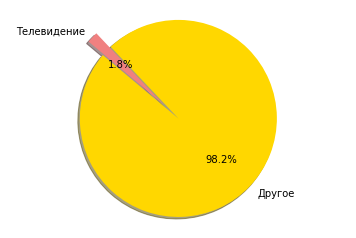

In [426]:
import matplotlib.pyplot as plt
 
# Data to plot
labels = 'Другое', 'Телевидение'
sizes = [len(requests), len(all_tv_requests)]
colors = ['gold', 'lightcoral']
explode = (0, 0.2)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.savefig("out_of_all.png")
plt.axis('equal')
plt.show()


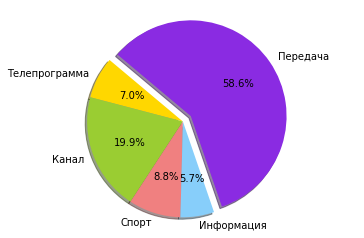

In [427]:
import matplotlib.pyplot as plt
 
# Data to plot
labels = 'Телепрограмма', 'Канал', 'Спорт', 'Информация', 'Передача'
sizes = [c_url_program, all_channel_counts, len(set(inds)), c_info, remaining]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'blueviolet']
explode = (0, 0, 0, 0, 0.1)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.savefig("classification.png")
plt.axis('equal')
plt.show()
